# Coronavirus 2019 (COVID-19)

## Introduction:

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered corona virus. This virus has now spread throughout the world.   
In this project I will analyze the pandemic spread by using data from all around the world including several demographic data for each country and some various risk factors related to COVID-19.
The dataset used for this analysis was taken from different Kaggle datasets on date 05.05.2020, namely:
[Coronavirus COVID-19 Epidemic Datasets](https://www.kaggle.com/eguidotti/coronavirus-covid19-2019ncov-epidemic-datasets),
[COVID-19 Predictors](https://www.kaggle.com/nightranger77/covid19-demographic-predictors#covid19_by_country.csv),
[World Population Data](https://www.kaggle.com/anjum48/covid19-population-data).

The focus of this project is to analyze COVID-19 and significant risk factors associated with this virus. It is also to find rates for confirmed cases or deaths and make predictions by different machine learning methods.
 
First, I will do data cleanning and visualization and then donduct some feature engineering. I will also apply different machine learning methods including supervised and unsupervised learning with python and pyspark. Due to system limitations only a fraction (10%) of the datasets will be used.



In [44]:
# Import liberies and packages:

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import time
from timeit import Timer
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import scale,StandardScaler,normalize,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, log_loss, f1_score, confusion_matrix
from sklearn import metrics
from sklearn.cluster import KMeans,MiniBatchKMeans,DBSCAN,AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.manifold import TSNE
import umap

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load datasets:
df1 = pd.read_csv(r'C:\Users\mebra.DESKTOP-L12LJA6\Thinkful Works\PythonThinkful\epidemic05052020.csv', parse_dates=['date'])
df2 = pd.read_csv(r'C:\Users\mebra.DESKTOP-L12LJA6\Thinkful Works\PythonThinkful\covid19_by_country05052020.csv')
df3 = pd.read_csv(r'C:\Users\mebra.DESKTOP-L12LJA6\Thinkful Works\PythonThinkful\population_data.csv')



In [3]:
# Look at the shape of dataset:
df1.shape

(421991, 42)

In [4]:
# Look at the sample of dataset:
df1.sample(frac=0.00001)

id       date  deaths  confirmed  tests  \
218205  USA, Maryland, Anne Arundel 2020-03-13       0          1      0   
246289      USA, Mississippi, Scott 2020-02-07       0          0      0   
57203         RUS, Volgograd oblast 2020-02-29       0          0      0   
273994          USA, Nebraska, Rock 2020-02-05       0          0      0   

        recovered  hosp  icu  vent  school_closing  ...  pop_65  pop_age  \
218205          0     0    0     0               3  ...     NaN      NaN   
246289          0     0    0     0               0  ...     NaN      NaN   
57203           0     0    0     0               0  ...     NaN      NaN   
273994          0     0    0     0               0  ...     NaN      NaN   

        pop_density  pop_death_rate  hosp_beds  smoking_male  smoking_female  \
218205          NaN             NaN        NaN           NaN             NaN   
246289          NaN             NaN        NaN           NaN             NaN   
57203           NaN             NaN        NaN           NaN             NaN   
273994          NaN             NaN        NaN           NaN             NaN   

        gdp  health_exp  health_exp_oop  
218205  NaN         NaN             NaN  
246289  NaN         NaN             NaN  
57203   NaN         NaN             NaN  
273994  NaN         NaN             NaN  

[4 rows x 42 columns]

In [5]:
# Look at the shape of dataset:
df2.shape

(96, 28)

In [6]:
# Look at the dataset:
df2.head()

Country    Tests     Test Pop  Density  Urban Pop Quarantine Schools  \
0    Albania      NaN          NaN      105         63        NaN     NaN   
1    Algeria      NaN          NaN       18         73        NaN     NaN   
2  Argentina      NaN          NaN       17         93  3/20/2020     NaN   
3    Armenia    694.0  4269.802594      104         63        NaN     NaN   
4  Australia  31635.0   806.065560        3         86        NaN     NaN   

  Restrictions  Hospital Bed  sex0  ...  Male Lung  Median Age      GDP 2018  \
0          NaN           2.9  1.08  ...      17.04        32.9  1.510250e+10   
1          NaN           1.9  1.05  ...      12.81        28.1  1.737580e+11   
2          NaN           5.0  1.05  ...      42.59        31.7  5.198720e+11   
3          NaN           4.2  1.13  ...      35.99        35.1  1.243309e+10   
4    3/23/2020           3.8  1.06  ...      22.16        38.7  1.433900e+12   

   Crime Index  Population 2020  Smoking 2016  Females 2018  Total Infected  \
0        40.02         2877.797          28.7     49.063095             803   
1        54.41        43851.044          15.6     49.484268            4648   
2        62.96        45195.774          21.8     51.237348            4887   
3        20.78         2963.243          24.1     52.956577            2507   
4        42.70        25499.884          14.7     50.199623            6847   

   Total Deaths  Total Recovered  
0            31              543  
1           465             1998  
2           260             1442  
3            39             1071  
4            96             5887  

[5 rows x 28 columns]

In [7]:
# Convert columns name to lower and space to underline:
df2.columns = df2.columns.str.replace(' ','_')
df2.columns = map(str.lower, df2.columns)

In [8]:
# Look at the df1 columns:
df1.columns

Index(['id', 'date', 'deaths', 'confirmed', 'tests', 'recovered', 'hosp',
       'icu', 'vent', 'school_closing', 'workplace_closing', 'cancel_events',
       'gatherings_restrictions', 'transport_closing',
       'stay_home_restrictions', 'internal_movement_restrictions',
       'international_movement_restrictions', 'information_campaigns',
       'testing_policy', 'contact_tracing', 'stringency_index', 'mkt_close',
       'mkt_volume', 'country', 'state', 'city', 'lat', 'lng', 'pop',
       'pop_female', 'pop_14', 'pop_15_64', 'pop_65', 'pop_age', 'pop_density',
       'pop_death_rate', 'hosp_beds', 'smoking_male', 'smoking_female', 'gdp',
       'health_exp', 'health_exp_oop'],
      dtype='object')

In [9]:
# Look at the df2 columns:
df2.columns

Index(['country', 'tests', 'test_pop', 'density', 'urban_pop', 'quarantine',
       'schools', 'restrictions', 'hospital_bed', 'sex0', 'sex14', 'sex25',
       'sex54', 'sex64', 'sex65plus', 'sex_ratio', 'lung', 'female_lung',
       'male_lung', 'median_age', 'gdp_2018', 'crime_index', 'population_2020',
       'smoking_2016', 'females_2018', 'total_infected', 'total_deaths',
       'total_recovered'],
      dtype='object')

In [10]:
# Rename columns:
df1 = df1.rename(columns={'hosp': 'hospitalized', 'pop_age':'median_age', 'pop_density': 'density', 'deaths': 'death','hosp_beds':'hospital_bed'})

In [11]:
# Rename columns:
df2 = df2.rename(columns = {'total_infected': 'confirmed','total_deaths': 'death', 'total_recovered':'recovered','females_2018':'pop_female','gdp_2018':'gdp' })

In [12]:
# Drop pop column:
df1 = df1.drop(['pop'], axis=1)

In [13]:
# Look at the shape of dataset:
df3.shape

(336, 3)

In [14]:
# Look at the dataset:
df3.head()

Name  Population            Type
0  Alabama   4888000.0  Province/State
1   Alaska    737438.0  Province/State
2  Alberta   4371000.0  Province/State
3    Anhui  62000000.0  Province/State
4  Arizona   7172000.0  Province/State

In [15]:
# Look at the unique value of type column:
df3.Type.unique()

array(['Province/State', 'Country/Region'], dtype=object)

In [16]:
# Extract country population:
df3_countrypop = df3[df3.Type=='Country/Region'][['Name','Population']]
df3_countrypop.columns=['country','population']
df3_countrypop.head()

country  population
128          Afghanistan  38928346.0
129              Albania   2877797.0
130              Algeria  43851044.0
131              Andorra     77265.0
132  Antigua and Barbuda     97929.0

In [17]:
# Merge df2 with population dataset:
df2=df2.merge(df3_countrypop, on='country',how='left')

In [18]:
# Merge df1 with df2 dataset:
df=df1.merge(df2[['country', 'urban_pop', 'sex_ratio', 'lung',
       'female_lung', 'male_lung', 'crime_index','population']], on='country', how='left')

In [19]:
# Look at the dataset:;
df.head()

id       date  death  confirmed  tests  recovered  hospitalized  icu  \
0  AFG 2020-01-22      0          0      0          0             0    0   
1  AFG 2020-01-23      0          0      0          0             0    0   
2  AFG 2020-01-24      0          0      0          0             0    0   
3  AFG 2020-01-25      0          0      0          0             0    0   
4  AFG 2020-01-26      0          0      0          0             0    0   

   vent  school_closing  ...           gdp  health_exp  health_exp_oop  \
0     0               0  ...  1.936297e+10   11.777194       75.482577   
1     0               0  ...  1.936297e+10   11.777194       75.482577   
2     0               0  ...  1.936297e+10   11.777194       75.482577   
3     0               0  ...  1.936297e+10   11.777194       75.482577   
4     0               0  ...  1.936297e+10   11.777194       75.482577   

   urban_pop  sex_ratio  lung  female_lung  male_lung  crime_index  population  
0        NaN        NaN   NaN          NaN        NaN          NaN         NaN  
1        NaN        NaN   NaN          NaN        NaN          NaN         NaN  
2        NaN        NaN   NaN          NaN        NaN          NaN         NaN  
3        NaN        NaN   NaN          NaN        NaN          NaN         NaN  
4        NaN        NaN   NaN          NaN        NaN          NaN         NaN  

[5 rows x 48 columns]

In [20]:
# look at the percent of missing values:
percent_null_counts = round(df.isnull().sum()*100/df.isnull().count(),2).sort_values(ascending=False)
percent_null_counts[percent_null_counts>0]


smoking_male      96.70
smoking_female    96.66
hospital_bed      96.12
health_exp        95.83
health_exp_oop    95.83
pop_female        95.73
gdp               95.70
median_age        92.63
density           92.63
pop_death_rate    92.63
pop_15_64         92.63
pop_14            92.63
pop_65            92.63
city              15.60
state              8.40
lng                8.25
lat                8.25
population         4.49
sex_ratio          4.49
lung               4.47
female_lung        4.47
male_lung          4.47
crime_index        4.47
urban_pop          4.47
dtype: float64

In [21]:
# Drop null columns with high percentage of null values:
df_cols = df.columns[df.isnull().sum()*100/df.isnull().count()>50.00]
df = df.drop(df_cols, axis=1)

In [22]:
# Look at the number of unique value of each column:
for col in df:
    print('Number of unique values in column {} are {} : {}'.format(col, df[col].nunique(),df[col].unique()))

Number of unique values in column id are 4097 : ['AFG' 'AGO' 'ALB' ... 'USA, Wyoming, Uinta' 'USA, Wyoming, Washakie'
 'USA, Wyoming, Weston']
Number of unique values in column date are 103 : ['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000

Number of unique values in column gatherings_restrictions are 5 : [0 4 2 3 1]
Number of unique values in column transport_closing are 3 : [0 2 1]
Number of unique values in column stay_home_restrictions are 4 : [0 2 1 3]
Number of unique values in column internal_movement_restrictions are 3 : [0 1 2]
Number of unique values in column international_movement_restrictions are 5 : [0 1 2 3 4]
Number of unique values in column information_campaigns are 3 : [0 2 1]
Number of unique values in column testing_policy are 4 : [0 1 2 3]
Number of unique values in column contact_tracing are 3 : [0 1 2]
Number of unique values in column stringency_index are 556 : [  0.    19.05  21.83  32.94  36.11  45.37  53.31  61.25  72.36  76.33
   5.56   8.33  11.11  42.32  35.18  82.27  75.13  93.38  86.77   2.78
  36.64  47.75  80.82  84.39  88.36  12.96  24.07  53.43  61.77  59.12
  50.79  16.27  22.09  33.2   40.34  44.31  63.89  72.48  76.45  87.57
  91.54  90.74  24.61  41.27  77.78  88.89 100.    16.93  

 47.21 41.29 40.64 39.86 59.83 49.04 52.33 46.73 48.22 77.02 42.7  36.7 ]
Number of unique values in column population are 94 : [           nan 2.87779700e+06 9.89040200e+06 4.51957740e+07
 2.96324300e+06 9.00639800e+06 1.01391770e+07 1.15896230e+07
 1.64689383e+08 6.94844500e+06 1.70157500e+06 3.28081900e+06
 9.44932300e+06 2.12559417e+08 3.77421540e+07 8.65462200e+06
 1.91162010e+07 5.08828910e+07 5.09411800e+06 1.13266160e+07
 1.20735900e+06 8.37839420e+07 5.79220200e+06 1.08479100e+07
 4.38510440e+07 1.76430540e+07 4.67547780e+07 1.32653500e+06
 1.14963588e+08 5.54072000e+06 6.52735110e+07 6.78860110e+07
 3.98916700e+06 3.10729400e+07 1.04230540e+07 9.90460700e+06
 4.10526700e+06 9.66035100e+06 2.73523615e+08 1.38000438e+09
 4.93778600e+06 3.41243000e+05 8.65553500e+06 6.04618260e+07
 2.96116700e+06 1.26476461e+08 1.87767070e+07 5.37712960e+07
 1.67189650e+07 4.27057100e+06 6.82544500e+06 2.14132490e+07
 2.72228900e+06 6.25978000e+05 1.88619800e+06 3.69105600e+07
 4.03396300e+06 5.

In [23]:
# Filling state variables:
for i in range(1, len(df.state)):
    if pd.isnull(df.state[i]):
        df.state[i] = df.state[i-1]

In [24]:
# Filling categorical columns:
df['state'].fillna('Unassigned', inplace=True)
df['city'].fillna('Unassigned', inplace=True)

In [25]:
# Look at the missing values:
sum_null_columns= df.isnull().sum().sort_values(ascending=False)
percent_null_counts = round(df.isnull().sum()*100/df.isnull().count(),3).sort_values(ascending=False)
missing_data_columns = pd.concat([sum_null_columns, percent_null_counts], axis=1, keys=['sum_null_columns','percent_null_columns'])
missing_data_columns.sort_values(by='percent_null_columns', ascending=False)


sum_null_columns  percent_null_columns
lng                                             34814                 8.250
lat                                             34814                 8.250
population                                      18952                 4.491
sex_ratio                                       18952                 4.491
male_lung                                       18849                 4.467
female_lung                                     18849                 4.467
lung                                            18849                 4.467
urban_pop                                       18849                 4.467
crime_index                                     18849                 4.467
stringency_index                                    0                 0.000
internal_movement_restrictions                      0                 0.000
international_movement_restrictions                 0                 0.000
testing_policy                                      0                 0.000
contact_tracing                                     0                 0.000
state                                               0                 0.000
mkt_close                                           0                 0.000
mkt_volume                                          0                 0.000
country                                             0                 0.000
transport_closing                                   0                 0.000
city                                                0                 0.000
stay_home_restrictions                              0                 0.000
confirmed                                           0                 0.000
information_campaigns                               0                 0.000
cancel_events                                       0                 0.000
date                                                0                 0.000
gatherings_restrictions                             0                 0.000
tests                                               0                 0.000
recovered                                           0                 0.000
death                                               0                 0.000
icu                                                 0                 0.000
vent                                                0                 0.000
school_closing                                      0                 0.000
workplace_closing                                   0                 0.000
hospitalized                                        0                 0.000
id                                                  0                 0.000

In [26]:
# Filling missing values:
filling_list = missing_data_columns[missing_data_columns.percent_null_columns>0].index      
countries = df.country.unique()
for col in filling_list:
    for country in countries:
        df.loc[df['country'] == country, col] = df.loc[df['country'] == country, col].fillna(df.loc[df['country'] == country,col].mean())
        df.fillna(df[col].mean(),inplace=True)

In [27]:
# Look at the null values:
percent_null_counts = df.isnull().sum()*100/df.isnull().count()
percent_null_counts[percent_null_counts>0]

Series([], dtype: float64)

In [28]:
# Clean dataset by dropping duplicates: 
df.drop_duplicates(keep='first', inplace=True)
df= df.dropna()

In [29]:
# look at the final dataset's shape:
df.shape

(421991, 35)

In [30]:
# Look at the dataset:
df.head()

id       date  death  confirmed  tests  recovered  hospitalized  icu  \
0  AFG 2020-01-22      0          0      0          0             0    0   
1  AFG 2020-01-23      0          0      0          0             0    0   
2  AFG 2020-01-24      0          0      0          0             0    0   
3  AFG 2020-01-25      0          0      0          0             0    0   
4  AFG 2020-01-26      0          0      0          0             0    0   

   vent  school_closing  ...        city   lat   lng  urban_pop  sex_ratio  \
0     0               0  ...  Unassigned  33.0  65.0 -74.086892 -74.086892   
1     0               0  ...  Unassigned  33.0  65.0 -74.086892 -74.086892   
2     0               0  ...  Unassigned  33.0  65.0 -74.086892 -74.086892   
3     0               0  ...  Unassigned  33.0  65.0 -74.086892 -74.086892   
4     0               0  ...  Unassigned  33.0  65.0 -74.086892 -74.086892   

        lung  female_lung  male_lung  crime_index  population  
0 -74.086892   -74.086892 -74.086892   -74.086892  -74.086892  
1 -74.086892   -74.086892 -74.086892   -74.086892  -74.086892  
2 -74.086892   -74.086892 -74.086892   -74.086892  -74.086892  
3 -74.086892   -74.086892 -74.086892   -74.086892  -74.086892  
4 -74.086892   -74.086892 -74.086892   -74.086892  -74.086892  

[5 rows x 35 columns]

In [31]:
# Look at the final dataset's columns:
df.columns

Index(['id', 'date', 'death', 'confirmed', 'tests', 'recovered',
       'hospitalized', 'icu', 'vent', 'school_closing', 'workplace_closing',
       'cancel_events', 'gatherings_restrictions', 'transport_closing',
       'stay_home_restrictions', 'internal_movement_restrictions',
       'international_movement_restrictions', 'information_campaigns',
       'testing_policy', 'contact_tracing', 'stringency_index', 'mkt_close',
       'mkt_volume', 'country', 'state', 'city', 'lat', 'lng', 'urban_pop',
       'sex_ratio', 'lung', 'female_lung', 'male_lung', 'crime_index',
       'population'],
      dtype='object')

In [32]:
# Look at the columns type:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421991 entries, 0 to 421990
Data columns (total 35 columns):
id                                     421991 non-null object
date                                   421991 non-null datetime64[ns]
death                                  421991 non-null int64
confirmed                              421991 non-null int64
tests                                  421991 non-null int64
recovered                              421991 non-null int64
hospitalized                           421991 non-null int64
icu                                    421991 non-null int64
vent                                   421991 non-null int64
school_closing                         421991 non-null int64
workplace_closing                      421991 non-null int64
cancel_events                          421991 non-null int64
gatherings_restrictions                421991 non-null int64
transport_closing                      421991 non-null int64
stay_home_restrictions   

In [33]:
# Get statistical information summary for numerical columns:
df.describe()

death     confirmed         tests      recovered  \
count  421991.000000  4.219910e+05  4.219910e+05  421991.000000   
mean       21.213178  3.743561e+02  1.959972e+03      64.443017   
std       561.543806  8.008397e+03  5.041711e+04    1737.048152   
min         0.000000  0.000000e+00  0.000000e+00       0.000000   
25%         0.000000  0.000000e+00  0.000000e+00       0.000000   
50%         0.000000  0.000000e+00  0.000000e+00       0.000000   
75%         0.000000  7.000000e+00  0.000000e+00       0.000000   
max     67682.000000  1.158040e+06  7.053366e+06  180152.000000   

        hospitalized            icu           vent  school_closing  \
count  421991.000000  421991.000000  421991.000000   421991.000000   
mean       11.753244       2.080779       0.549085        1.638852   
std       370.103903      64.028621      20.068646        1.489691   
min         0.000000       0.000000       0.000000        0.000000   
25%         0.000000       0.000000       0.000000        0.000000   
50%         0.000000       0.000000       0.000000        3.000000   
75%         0.000000       0.000000       0.000000        3.000000   
max     33004.000000    5225.000000    1705.000000        3.000000   

       workplace_closing  cancel_events  ...    mkt_volume            lat  \
count      421991.000000  421991.000000  ...  4.219910e+05  421991.000000   
mean            1.289461       1.076942  ...  2.209232e+06      27.920955   
std             1.474256       0.952009  ...  9.646080e+07      32.328890   
min             0.000000       0.000000  ...  0.000000e+00     -74.086892   
25%             0.000000       0.000000  ...  0.000000e+00      32.557925   
50%             0.000000       1.000000  ...  0.000000e+00      37.753330   
75%             3.000000       2.000000  ...  0.000000e+00      41.914418   
max             3.000000       2.000000  ...  9.044690e+09      71.706900   

                 lng      urban_pop      sex_ratio           lung  \
count  421991.000000  421991.000000  421991.000000  421991.000000   
mean      -74.086892      74.149158      -2.401376      26.155997   
std        47.128497      32.794686      15.544909      23.547777   
min      -170.132000     -74.086892     -74.086892     -74.086892   
25%       -96.203505      83.000000       0.970000      32.010000   
50%       -85.884611      83.000000       0.970000      32.010000   
75%       -75.366523      83.000000       0.970000      32.010000   
max       178.065000      99.000000       3.410000     114.280000   

         female_lung      male_lung    crime_index    population  
count  421991.000000  421991.000000  421991.000000  4.219910e+05  
mean       23.850773      29.223429      40.448977  2.929110e+08  
std        23.002070      24.324475      25.087181  1.894061e+08  
min       -74.086892     -74.086892     -74.086892 -7.408689e+01  
25%        30.040000      34.550000      46.730000  3.310027e+08  
50%        30.040000      34.550000      46.730000  3.310027e+08  
75%        30.040000      34.550000      46.730000  3.310027e+08  
max        94.590000     174.880000      77.020000  1.439324e+09  

[8 rows x 30 columns]

In [34]:
# Get statistical information summary for nonnumerical columns:
df.describe(include='O')

id        country   state        city
count                   421991         421991  421991      421991
unique                    4097            193     454        2137
top     USA, Kentucky, Garrard  United States   Texas  Unassigned
freq                       103         334750   26368       65817

In [35]:
# Look at the correlation between confirmed and all columns:
np.abs(df.corr()["confirmed"]).sort_values(ascending=False)

confirmed                              1.000000
death                                  0.912444
tests                                  0.860756
recovered                              0.724341
mkt_volume                             0.449618
icu                                    0.322646
hospitalized                           0.296959
vent                                   0.110644
mkt_close                              0.058208
stringency_index                       0.055976
transport_closing                      0.052152
workplace_closing                      0.047057
internal_movement_restrictions         0.046238
stay_home_restrictions                 0.046103
gatherings_restrictions                0.045862
information_campaigns                  0.045432
cancel_events                          0.043788
school_closing                         0.040621
lng                                    0.038006
lat                                    0.030658
international_movement_restrictions    0

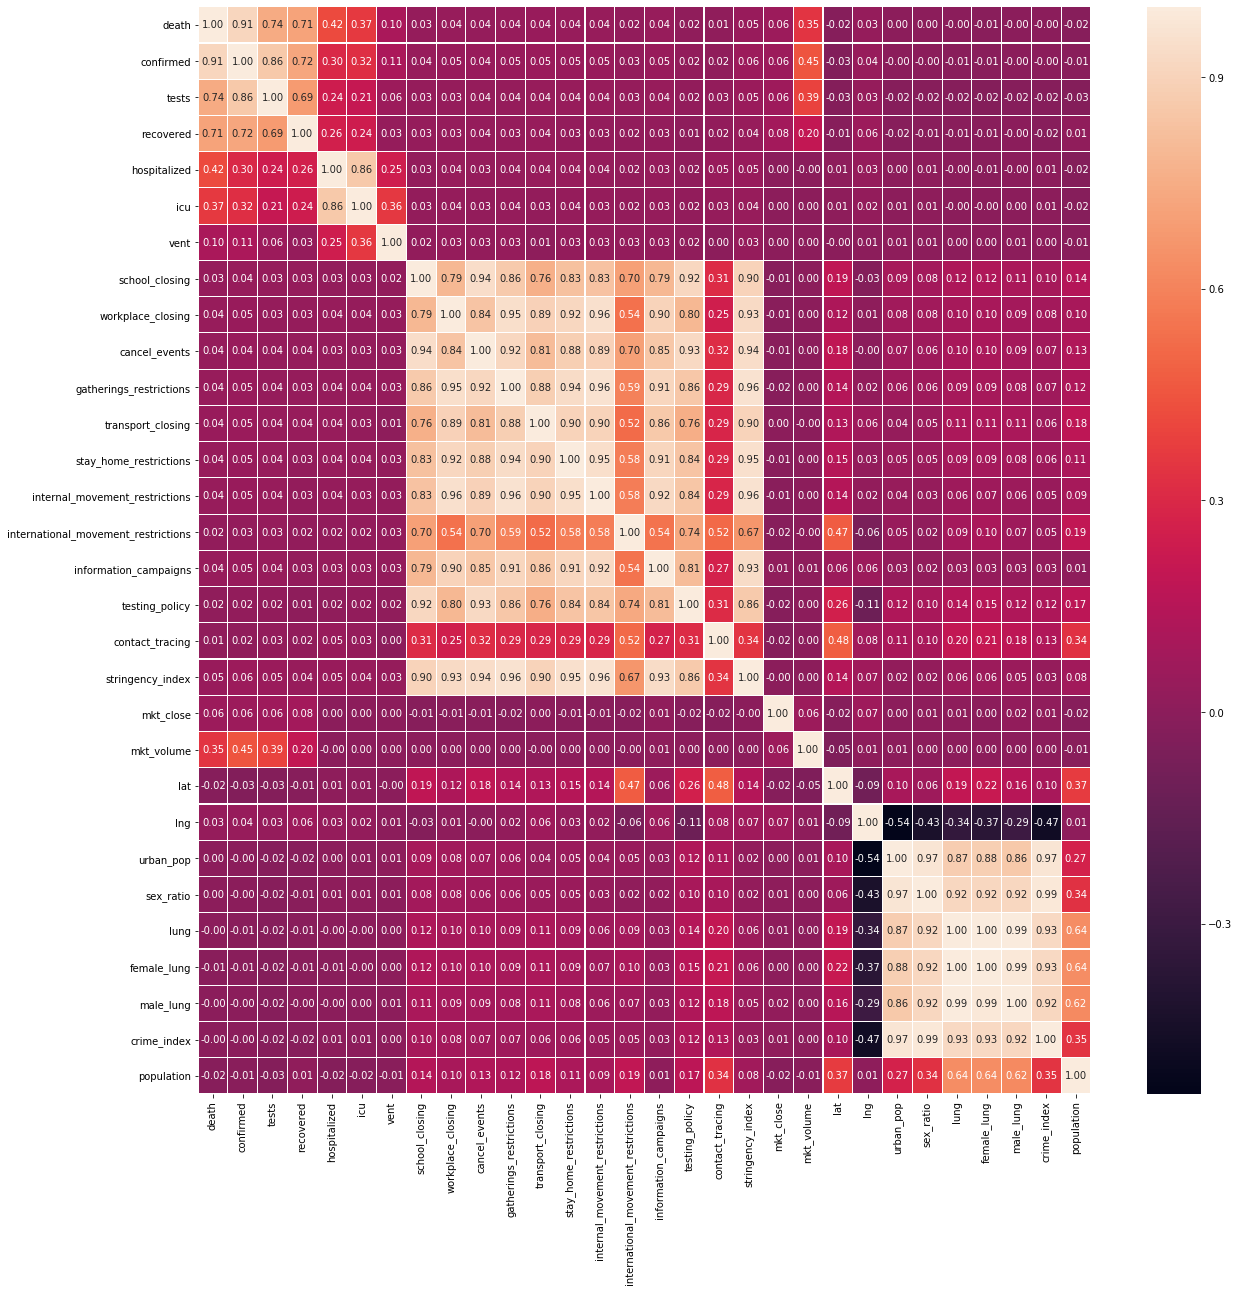

In [36]:
# Look at the columns correlation by using heatmap:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True, linewidths=0.1, fmt='.2f' )

According to the heatmap, "confirmed" has strong correlation with "death", "tests" and "recovered".

In [37]:
# Extract object columns:
nonnumeric_columns = df.select_dtypes('object')
nonnumeric_columns.columns

Index(['id', 'country', 'state', 'city'], dtype='object')

In [38]:
# Extract numeric columns:
numeric_columns = df.select_dtypes(exclude=['object','datetime64[ns]'])
numeric_columns.columns

Index(['death', 'confirmed', 'tests', 'recovered', 'hospitalized', 'icu',
       'vent', 'school_closing', 'workplace_closing', 'cancel_events',
       'gatherings_restrictions', 'transport_closing',
       'stay_home_restrictions', 'internal_movement_restrictions',
       'international_movement_restrictions', 'information_campaigns',
       'testing_policy', 'contact_tracing', 'stringency_index', 'mkt_close',
       'mkt_volume', 'lat', 'lng', 'urban_pop', 'sex_ratio', 'lung',
       'female_lung', 'male_lung', 'crime_index', 'population'],
      dtype='object')

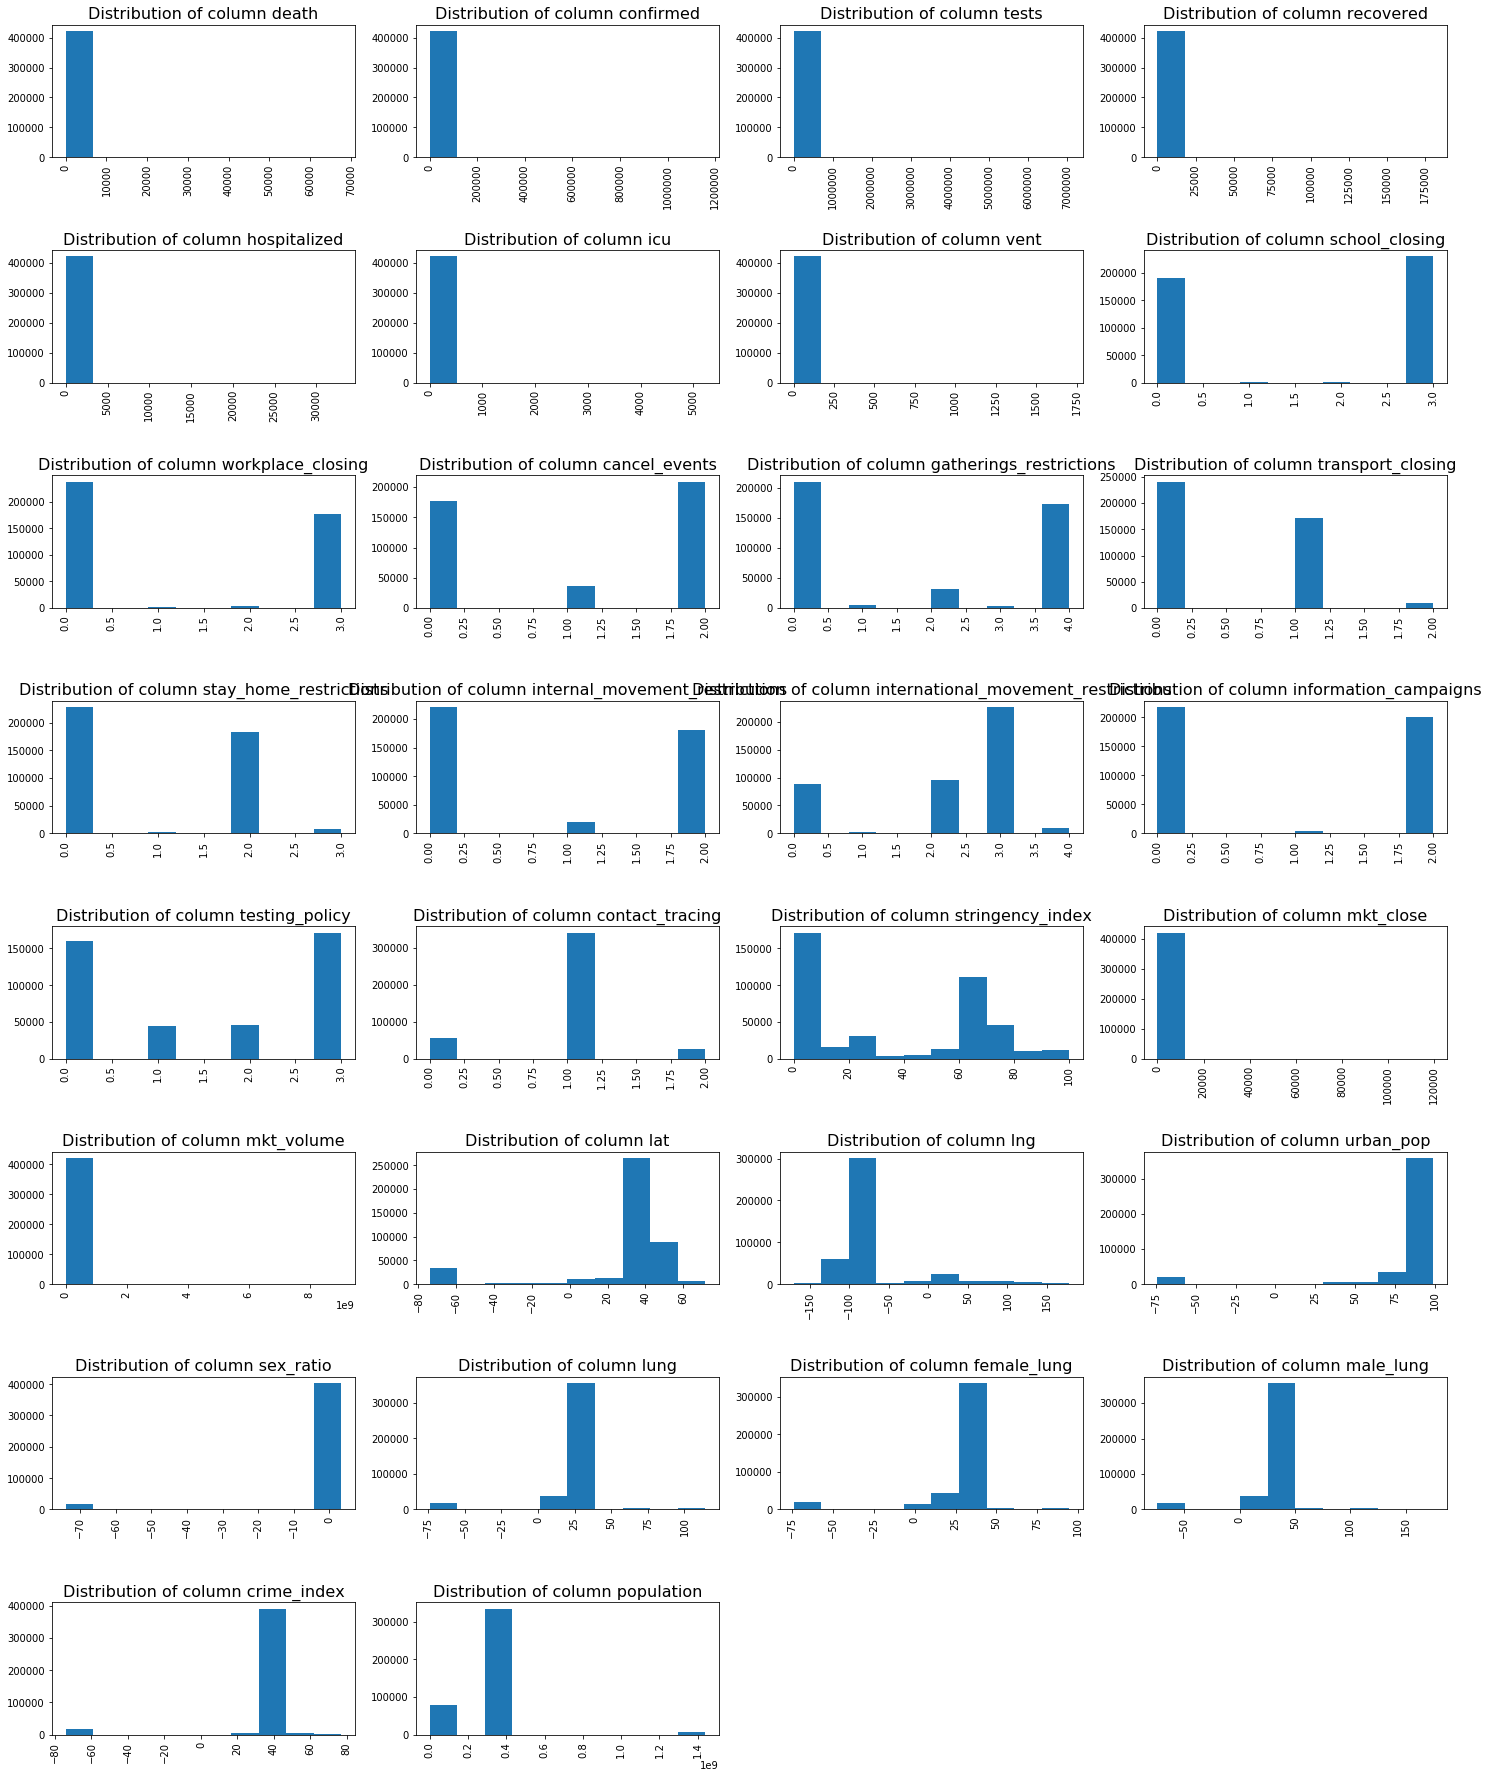

In [39]:
# look at the distribution of numeric columns by using hist plot:
plt.figure(figsize=(25,50))
for i,col in enumerate(numeric_columns.columns):
    plt.subplot(8,4,i+1)
    plt.hist(df[col])
    plt.title(f'Distribution of column {col}',fontsize=16)
    plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.7, top=0.6)
plt.show()

According to hist plot, columns have non_normal distribution.

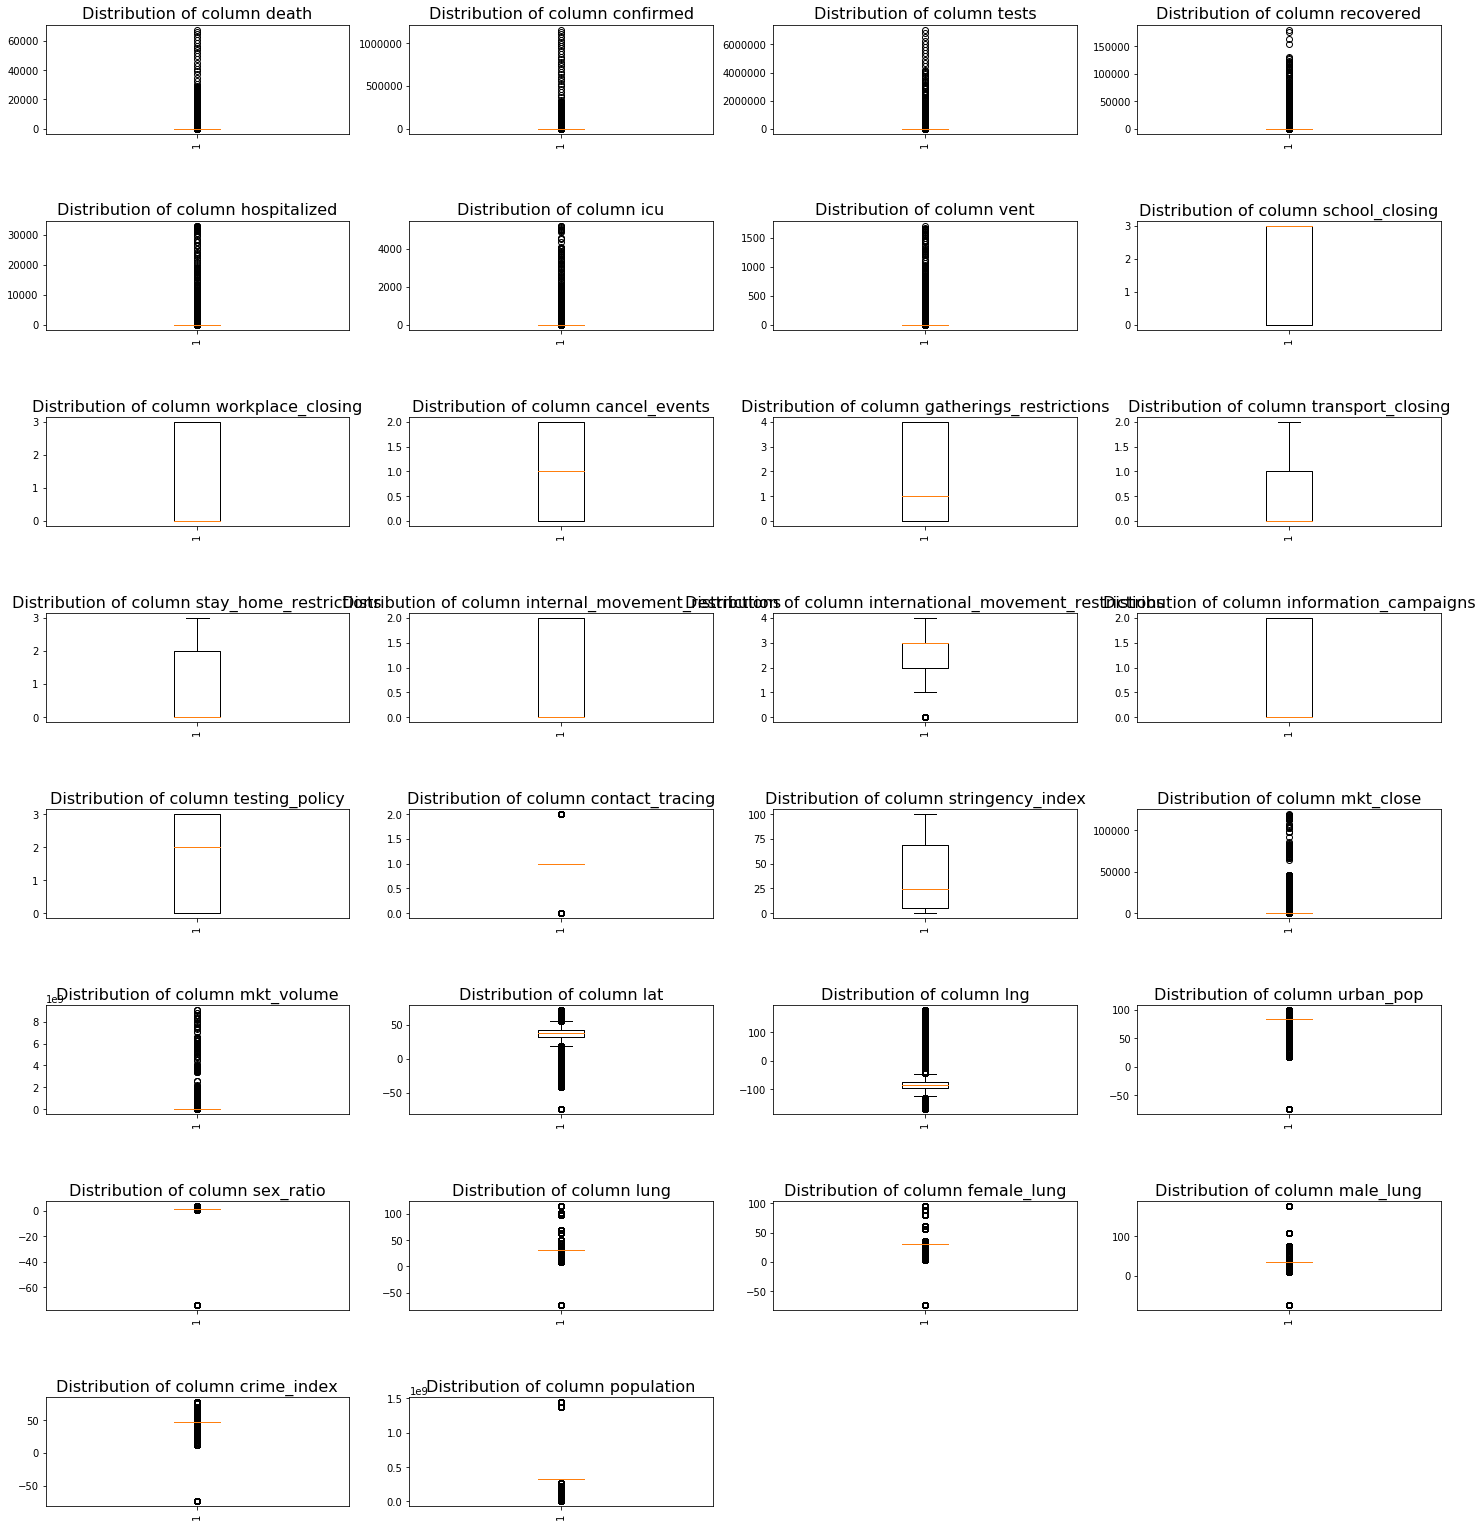

In [40]:
# Look at the outliers by using boxplot:
plt.figure(figsize=(25,50))
for i,col in enumerate(numeric_columns.columns):
    plt.subplot(11, 4, i+1)
    plt.boxplot(df[col])
    plt.title(f'Distribution of column {col}',fontsize=16)
    plt.xticks(rotation=90)
plt.subplots_adjust(hspace = 0.8, top = 0.7)
plt.show()

As you can see, some columns have one side outliers. Also, most of the columns have the average value of zero.

In [41]:
# Applying statistical zscore method to find outliers:
z = np.abs(stats.zscore(numeric_columns))
threshold=3
print(np.where(z > 3))


(array([     0,      0,      0, ..., 290972, 290973, 290974], dtype=int64), array([23, 24, 25, ...,  1,  1,  1], dtype=int64))


Text(0.5, 1.0, 'Distribution of Columns')

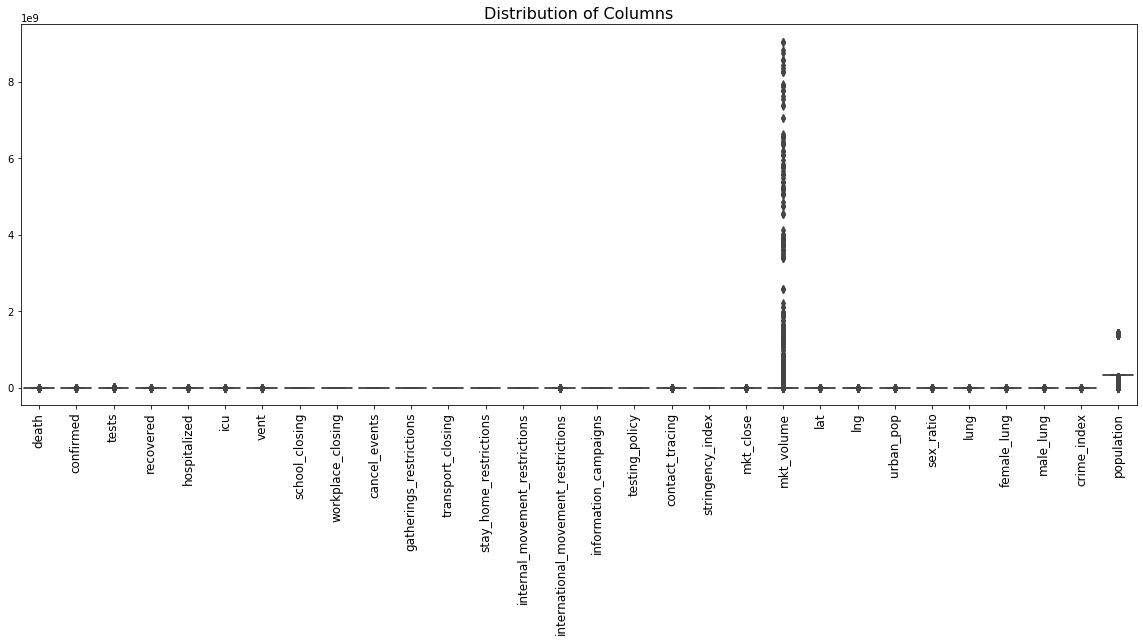

In [42]:
# Look at the distribution of columns:
plt.figure(figsize=(20,7))
sns.boxplot(data=numeric_columns)
plt.xticks(rotation=90, fontsize=12)
plt.title('Distribution of Columns',fontsize=16)

Stock market volume has the widest distribution and the average values of most columns are zero. 

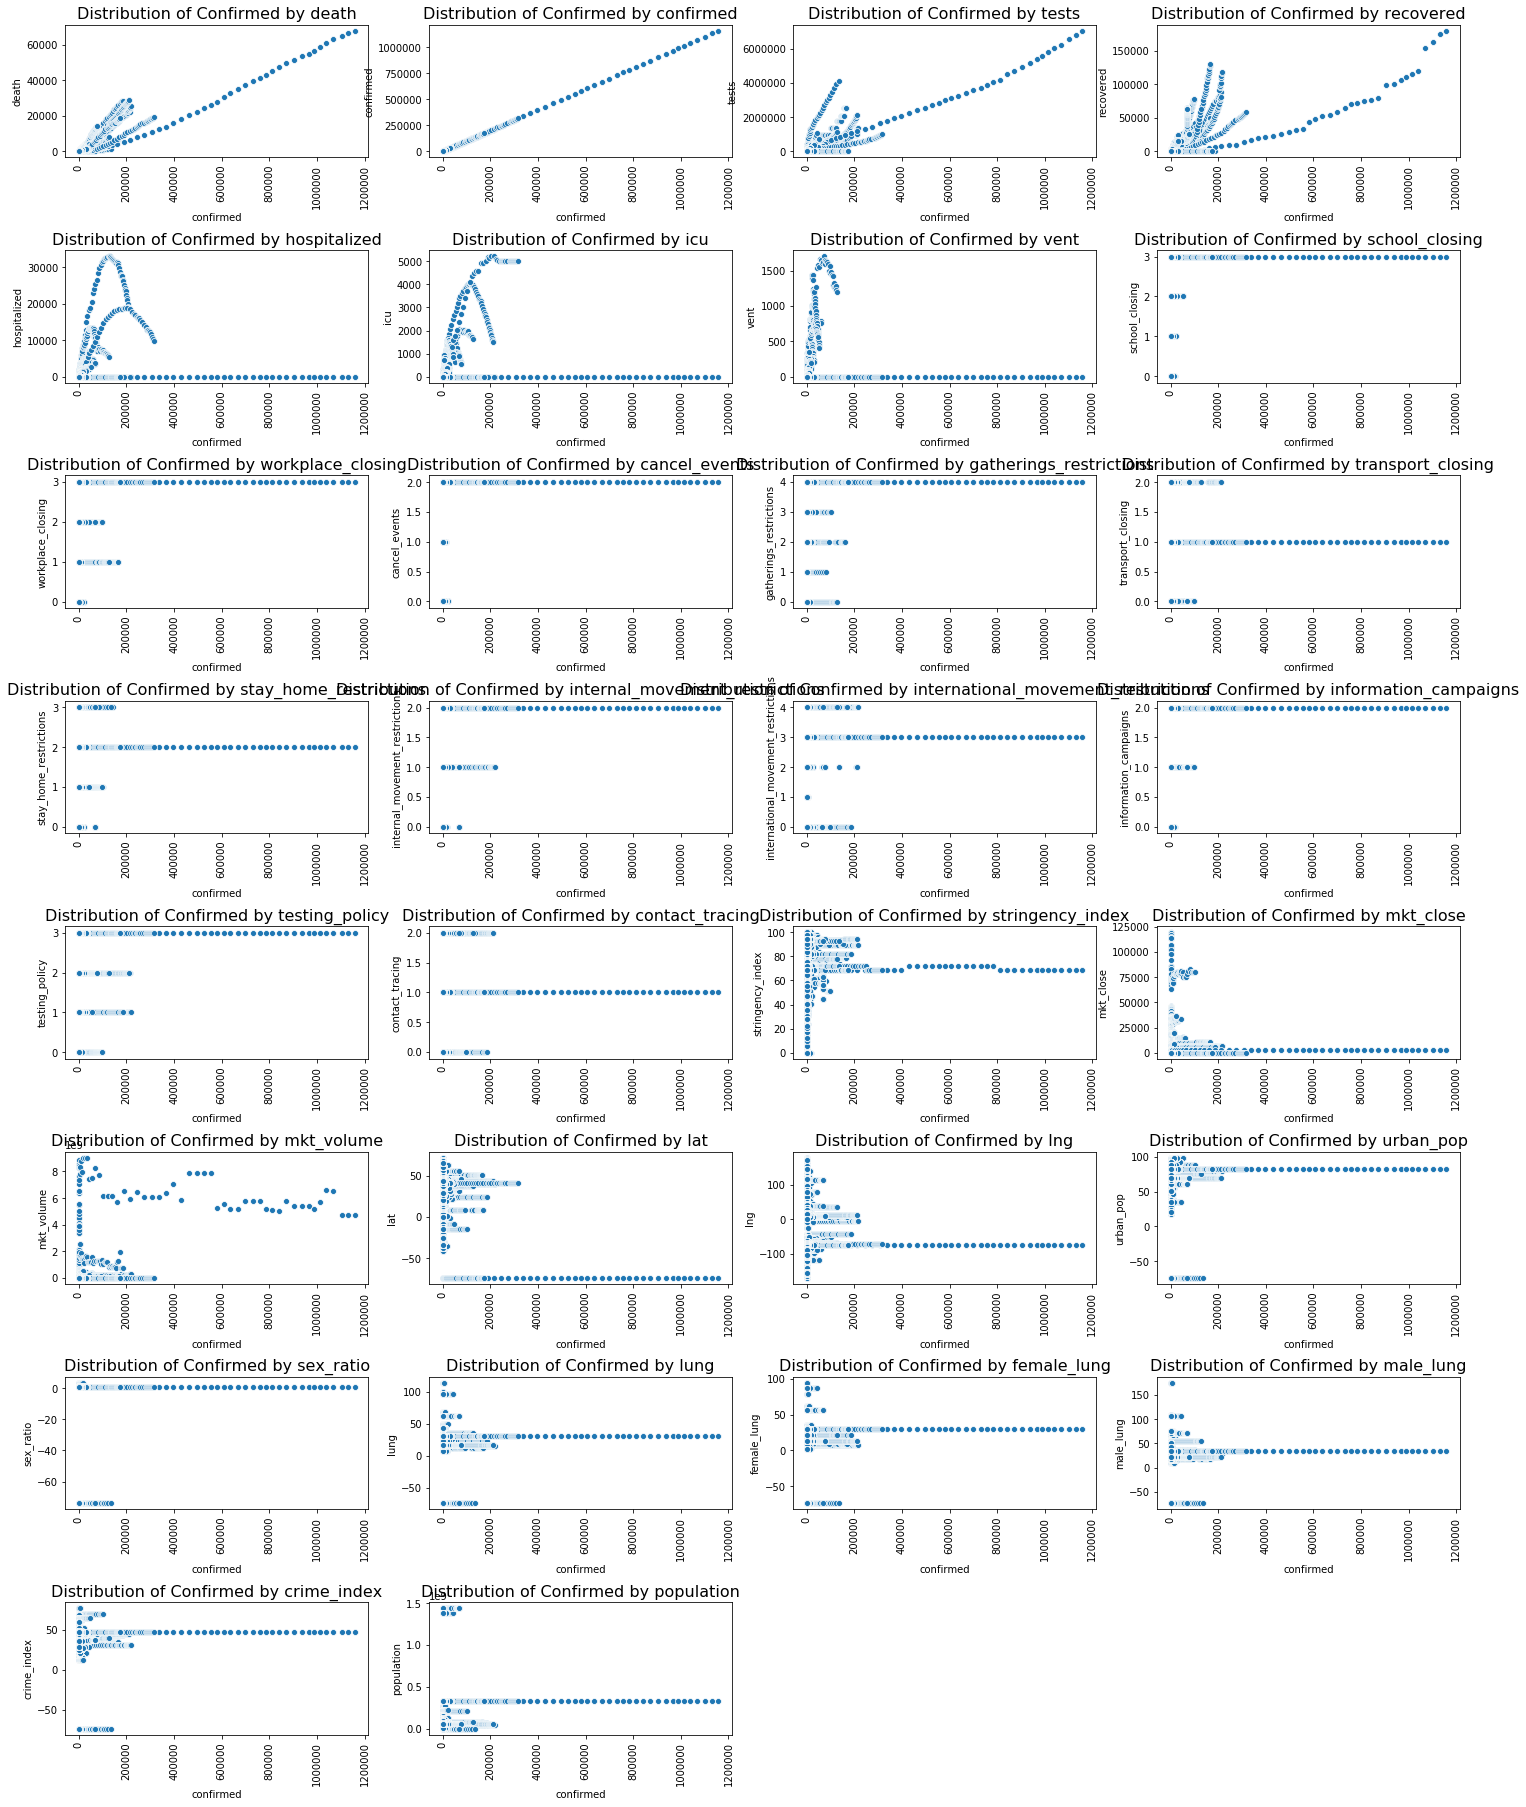

In [43]:
# Bivariate visualization of Confirmed variable by features:
plt.figure(figsize=(25,50))
for i,col in enumerate(numeric_columns.columns):
    plt.subplot(8,4,i+1)
    sns.scatterplot(x=df['confirmed'], y=df[col])
    plt.title(f'Distribution of Confirmed by {col}',fontsize=16)
    plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.7, top=0.6)
plt.show()

According to the scatter plot, "confirmed" has direct relation with "death", "tests" and "recovered".

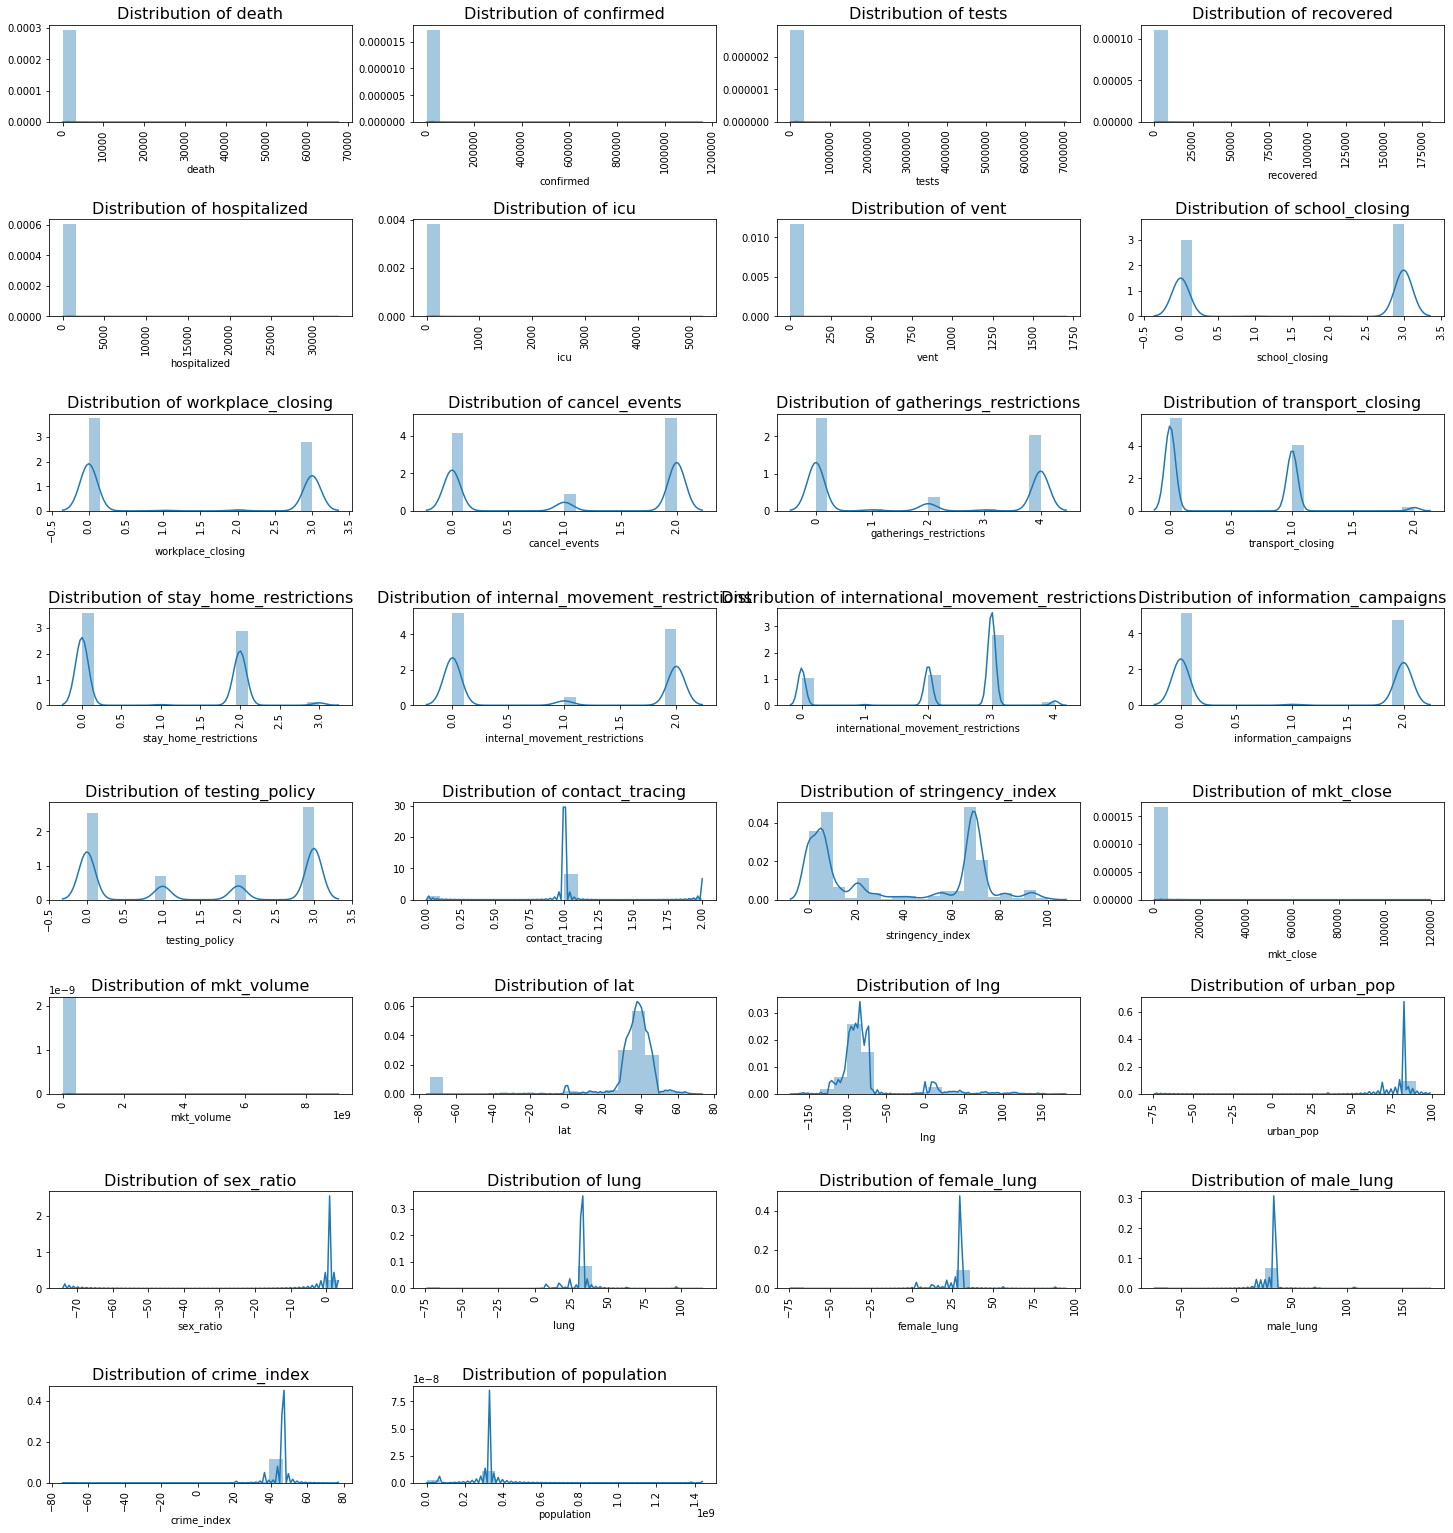

In [44]:
# Distribution of features by displot:
plt.figure(figsize=(25,30))
for i,col in enumerate(numeric_columns.columns):
    plt.subplot(8,4,i+1)
    sns.distplot(df[col],bins=20)
    plt.title(f'Distribution of {col}',fontsize=16)
    plt.xticks(rotation=90)
plt.subplots_adjust(hspace=1.0, top=0.8)
plt.show()

Accoring to the distplot:
- The most number of values in death, confirmed, tests, recovered, hospitalized, icu and vent columns are zero.
- The total number of "Required" school closing in all level is higher than the "Recommend" closing.
- The  total number of values in workplace_closing, gathering_restrictions, transport_closing, stay_home_restrictions, internal_movement_restriction, information_campaigns are zero which means there is not any restrictions.
- The highest testing_policy is for "open public testing".
- The highest contact_tracing is for "Limited contact tracing".
- The highest international_movement_restrictions is for "Ban on high-risk regions".
- The highest cancel_events is for "Require cancelling".


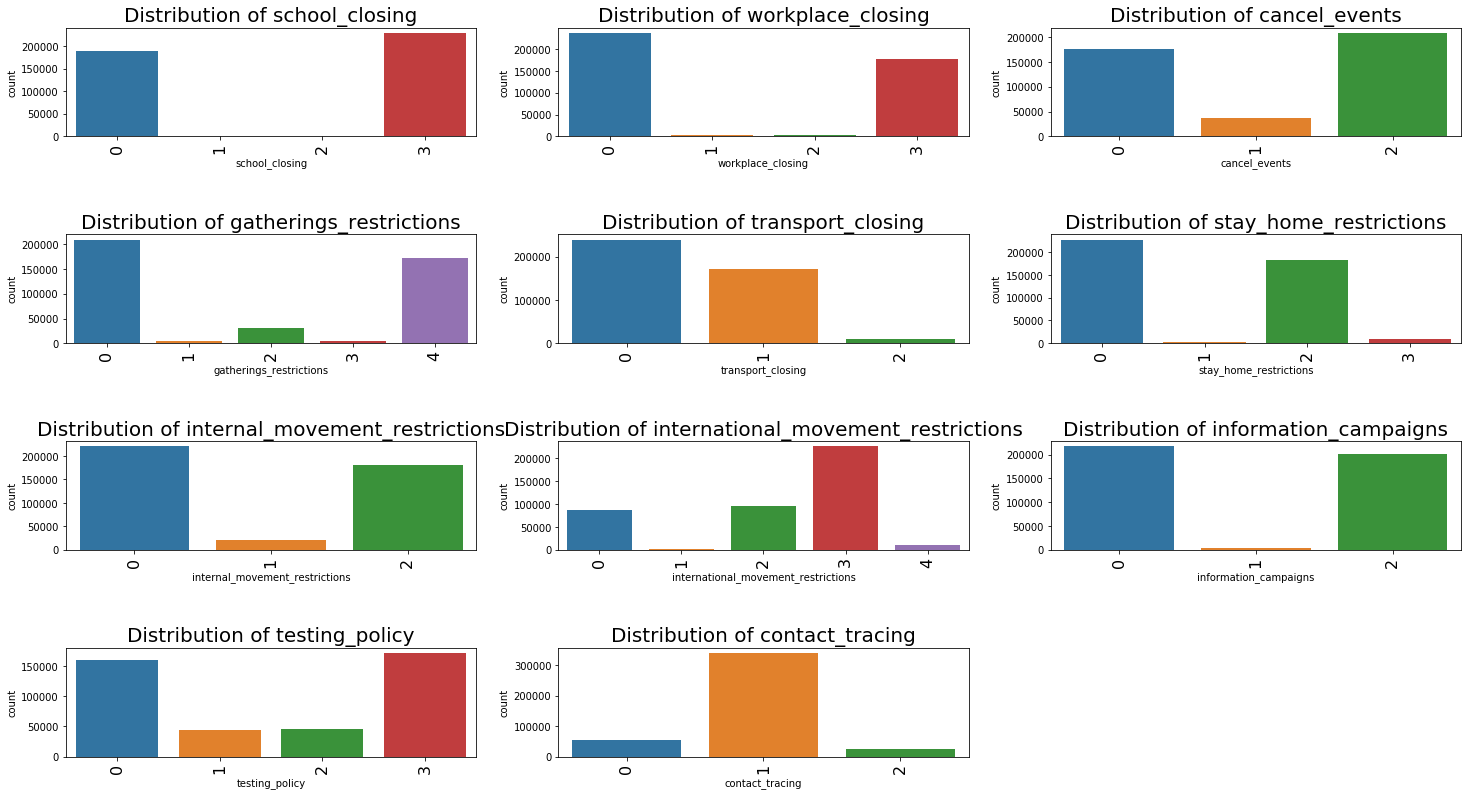

In [45]:
# Distribution of each column:

cols= ['school_closing','workplace_closing','cancel_events','gatherings_restrictions','transport_closing',
       'stay_home_restrictions','internal_movement_restrictions','international_movement_restrictions',
       'information_campaigns','testing_policy','contact_tracing']

plt.figure(figsize=(25,15))
for i,col in enumerate(cols):
    plt.subplot(4,3,i+1)
    sns.countplot(df[col])
    plt.title(f'Distribution of {col}', fontsize=20)
    plt.xticks(rotation=90, fontsize=16)
plt.subplots_adjust(hspace=0.9, top=0.8)
plt.show()

- The total number of "Required" school closing in all levels is higher than the "Recommend" closing.
- The total number of values in workplace_closing, gathering_restrictions, transport_closing, stay_home_restrictions, internal_movement_restriction, information_campaigns are zero which means there is not any restrictions.
- The highest cancel_events is for "Require cancelling".
- The highest testing_policy is for "open public testing".
- The highest contact_tracing is for "Limited contact tracing".
- The highest international_movement_restrictions is for "Ban on high-risk regions".

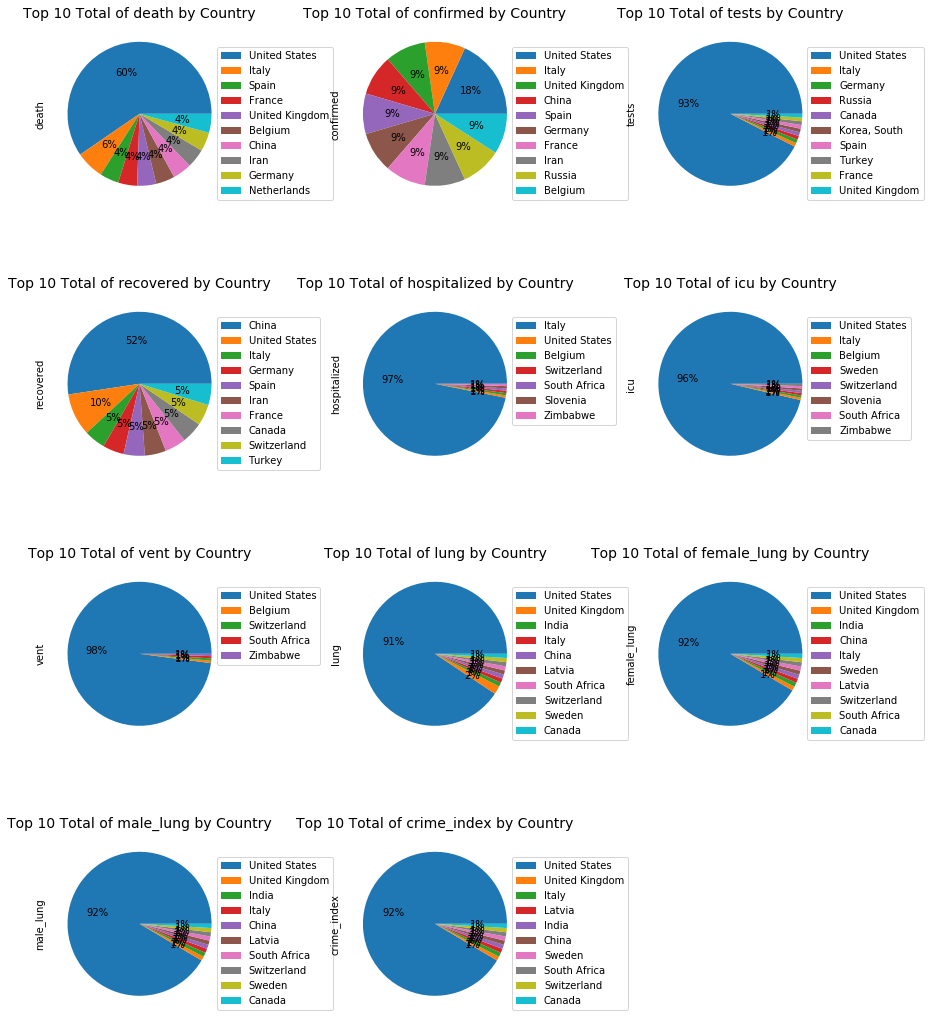

In [46]:
# Distribution of total values of each column by country:

plt.figure(figsize=(15,50))
cols=['death','confirmed','tests','recovered','hospitalized','icu','vent','lung','female_lung','male_lung','crime_index']
for i,col in enumerate(cols):
    plt.subplot(4,3,i+1)
    df.groupby('country')[col].sum().value_counts(ascending=False).head(10).plot(kind='pie', autopct='%1.0f%%', labels=None)
    plt.title(f'Top 10 Total of {col} by Country',fontsize=14)
    labels = df.groupby('country')[col].sum().sort_values(ascending=False).head(10).index
    plt.legend(labels=labels, loc='upper left', bbox_to_anchor=(0.9,0.9), fontsize=10)
plt.subplots_adjust(hspace=0.5, top=0.4)
plt.show()

According to the pie charts:
- United States has the highest number of deaths, confirmed, tests, icu, vent (ventilator), crime index, lung, female and male lung.
- China has the highest number of recovered.
- Italy has the highest number of hospitalized.

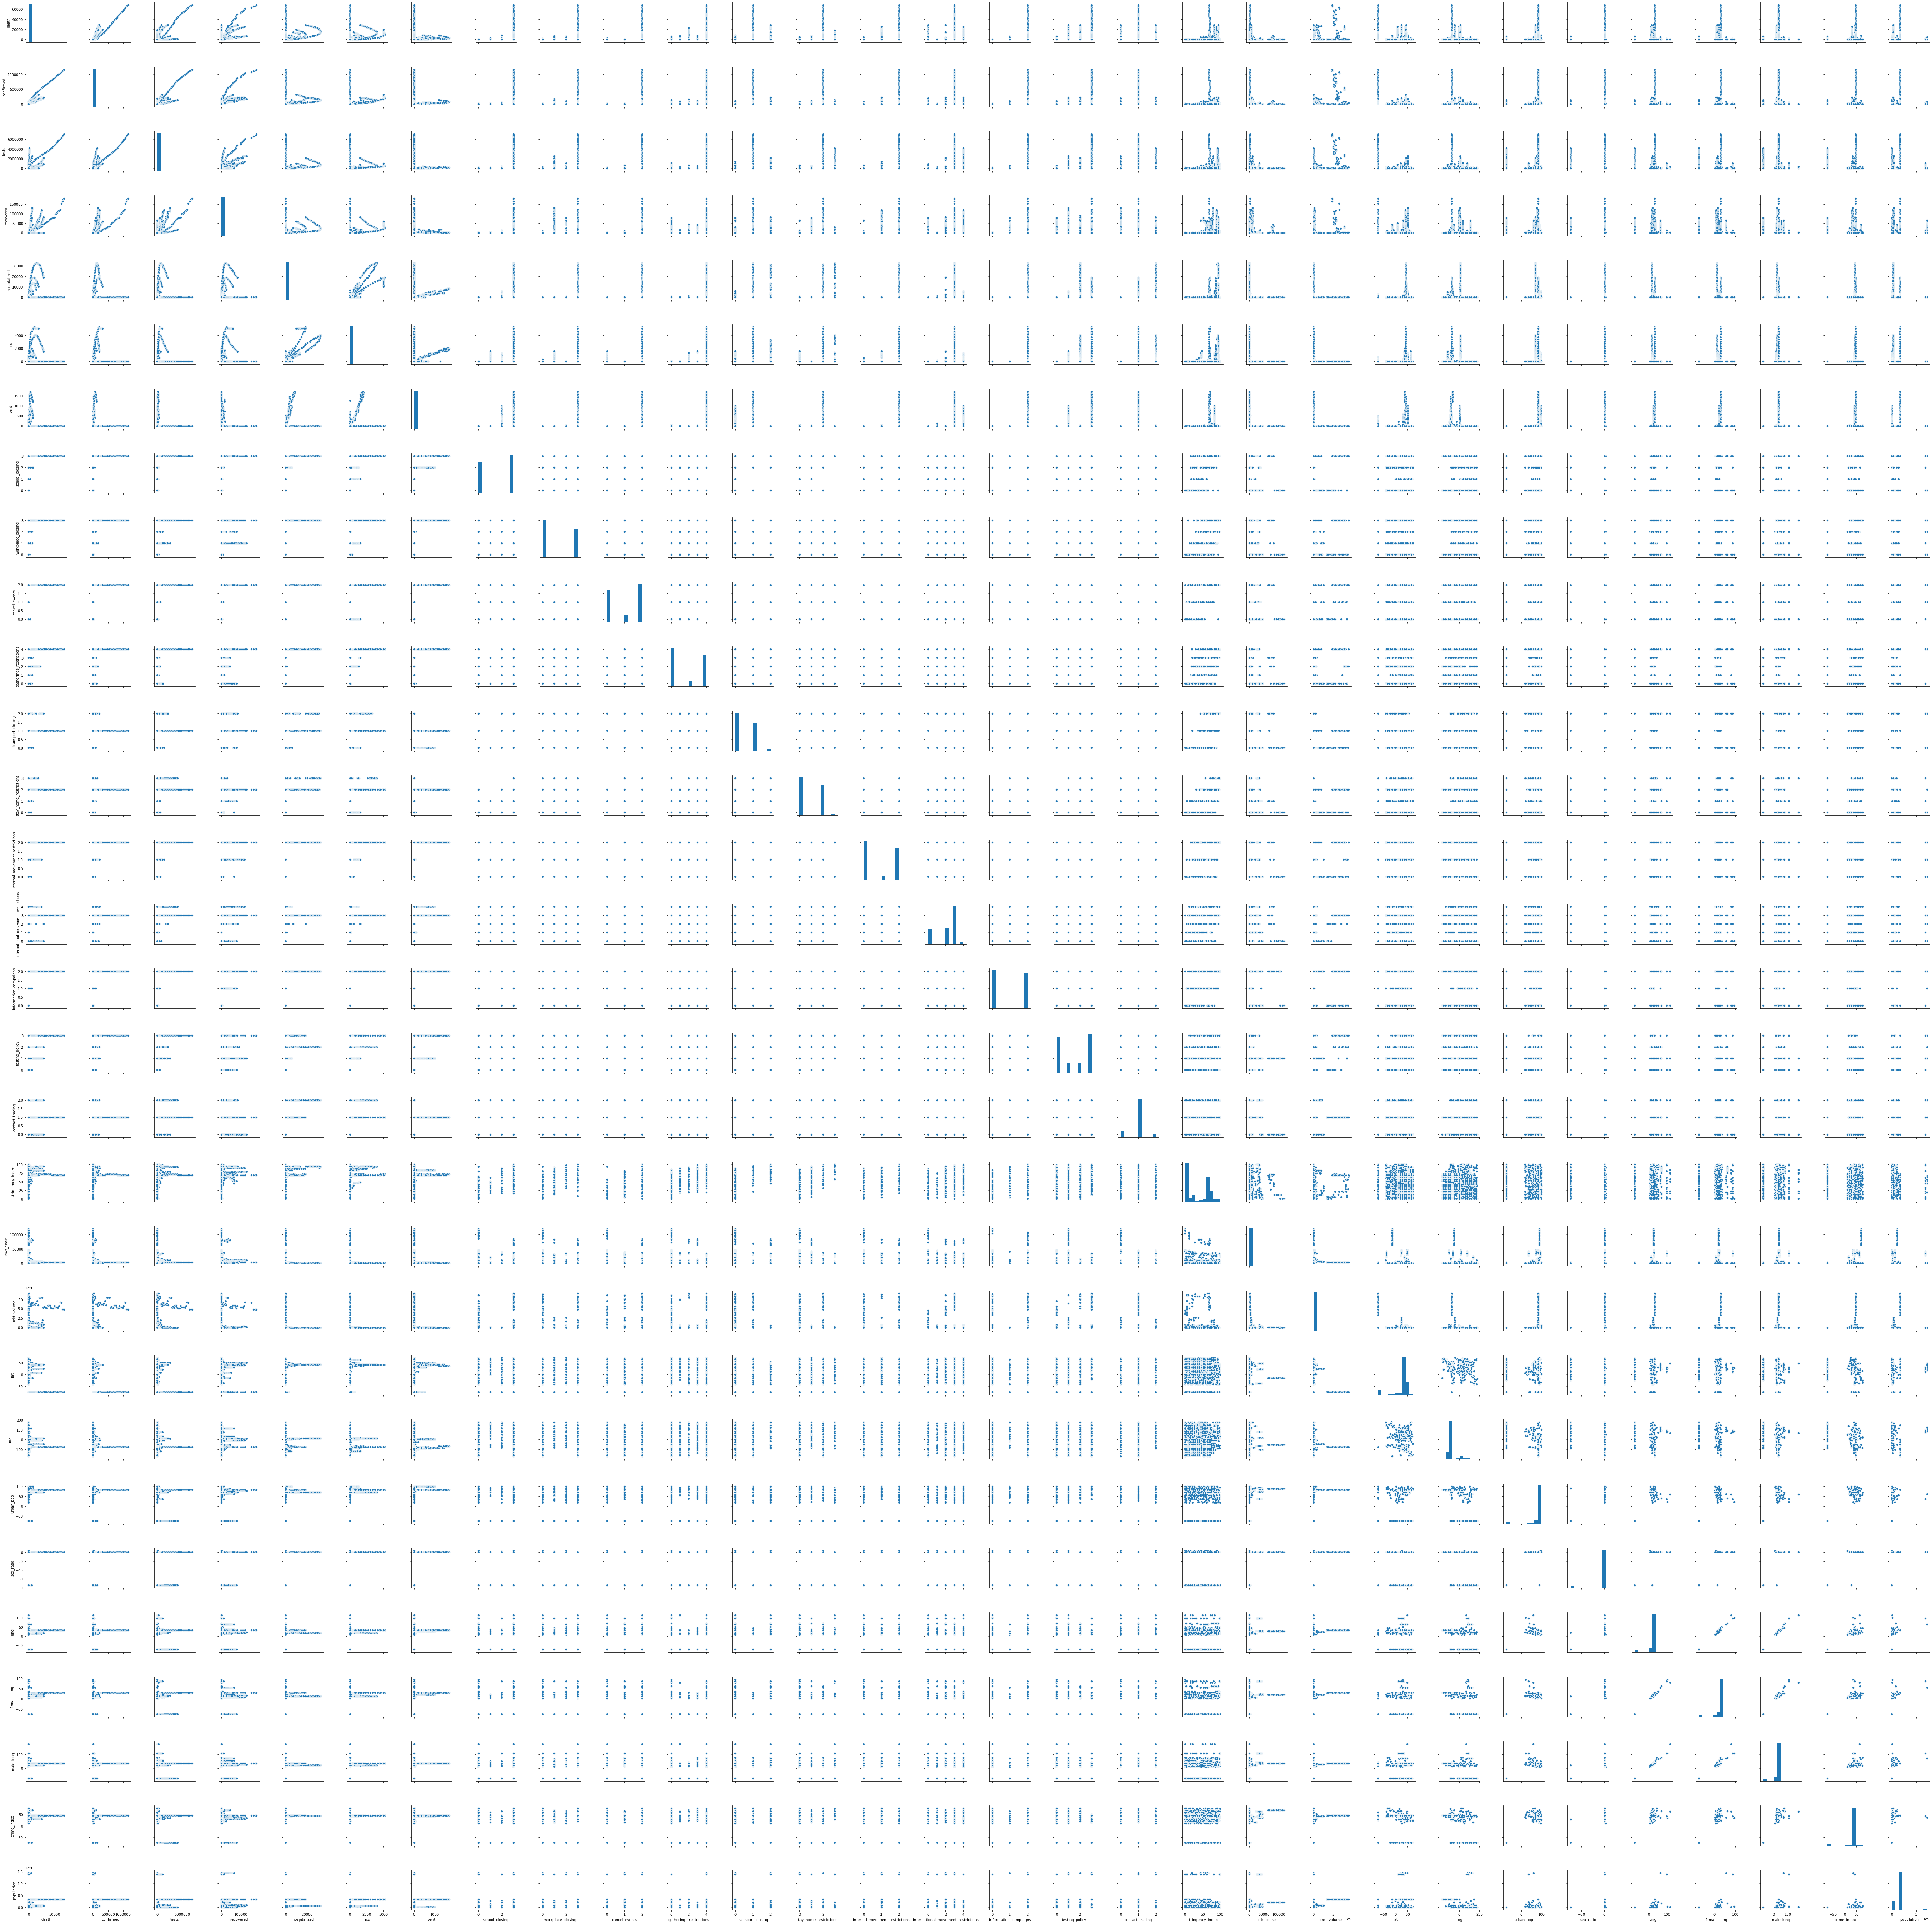

In [47]:
# Look at the dataset pairplot:
sns.pairplot(data=df)

<Figure size 1440x504 with 0 Axes>

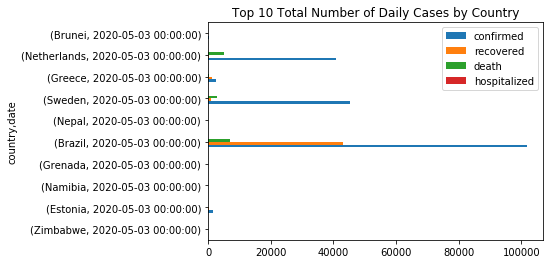

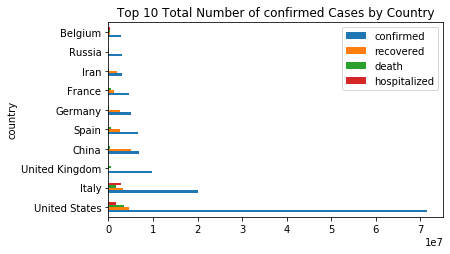

In [48]:
# Distribution of total number of cases by date and country:

plt.figure(figsize=(20,7))

df.groupby(['country','date'])[['confirmed','recovered','death','hospitalized']].sum().sort_values(by='date', ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Total Number of Daily Cases by Country')

df.groupby(['country'])[['confirmed','recovered','death','hospitalized']].sum().sort_values(by='confirmed', ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Total Number of confirmed Cases by Country')

plt.subplots_adjust(hspace=0.9, top=0.8)
plt.show()

- Brazil has the highest number of confirmed, recovered and death in date 2020-05-03.
- United States has the highest number of confirmed then Italy.

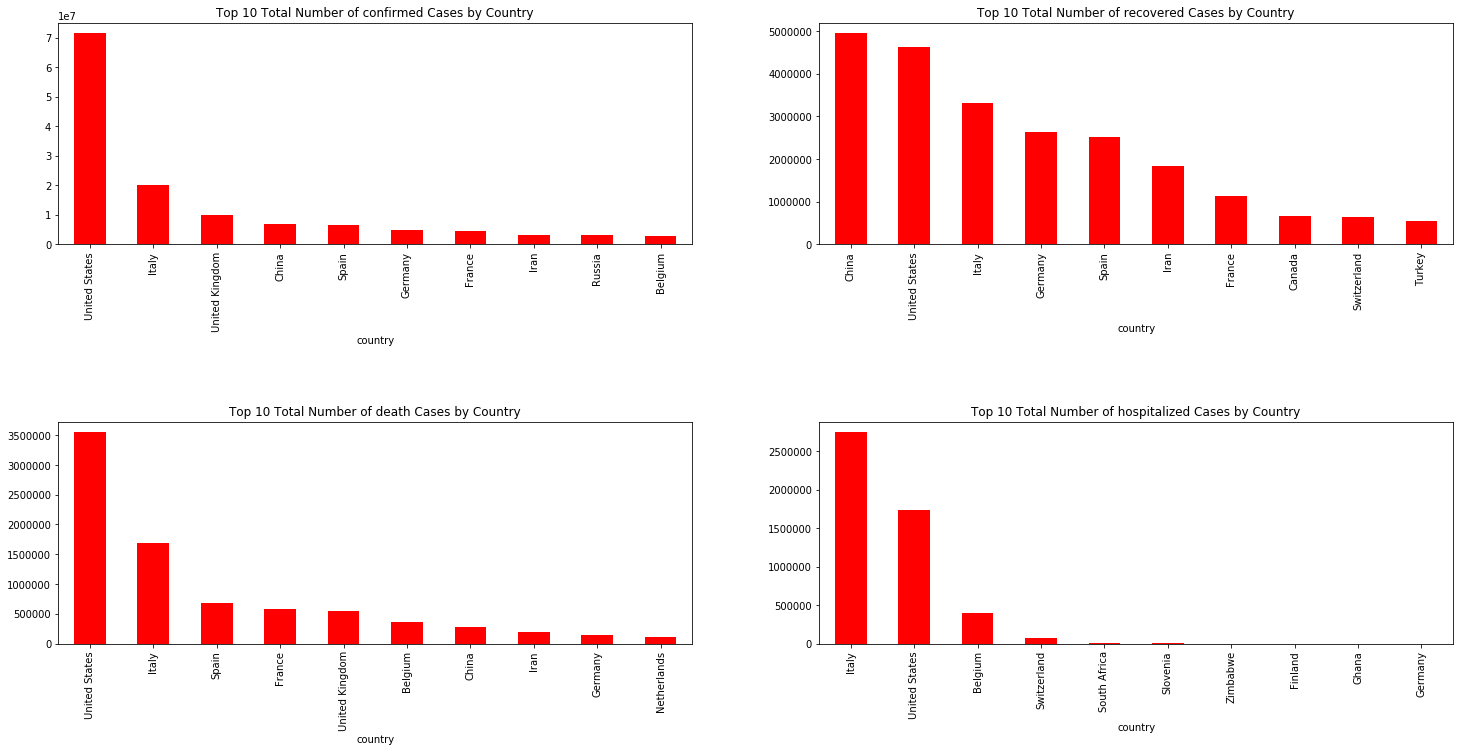

In [40]:
# Distribution of total number of cases by country:

df_col=['confirmed', 'recovered', 'death', 'hospitalized']
fig=plt.figure(figsize=(25,15))
for i,col in enumerate(df_col):
    axes = fig.add_subplot(2, 2, i+1)
    df.groupby(['country'])[col].sum().sort_values(ascending=False).head(10).plot(kind='bar', ax=axes, color='red')
    plt.title(f'Top 10 Total Number of {col} Cases by Country')
    plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.8, top=0.7)
plt.show()

- United States has the highest number of confirmed and death, then Italy.
- China has the highest number of recovered and then United States.
- Italy has the highest number of hospitalized and then United States.


<Figure size 1440x504 with 0 Axes>

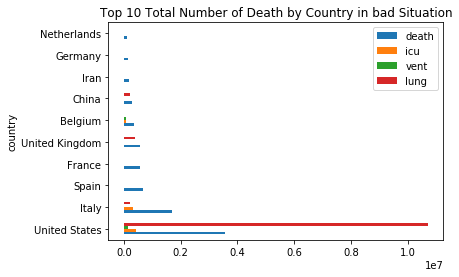

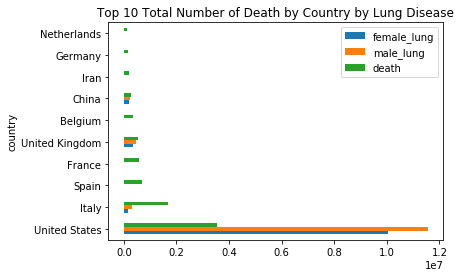

In [50]:
# Distribution of total number of death:

plt.figure(figsize=(20,7))

df.groupby(['country'])['death','icu','vent','lung'].sum().sort_values(by='death',ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Total Number of Death by Country in bad Situation')

df.groupby(['country'])['female_lung','male_lung','death'].sum().sort_values(by='death',ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Total Number of Death by Country by Lung Disease')

plt.show()

- United States has the highest number of lung diseases (for female and male) and deaths.
- The total number of male lung is higher than female.

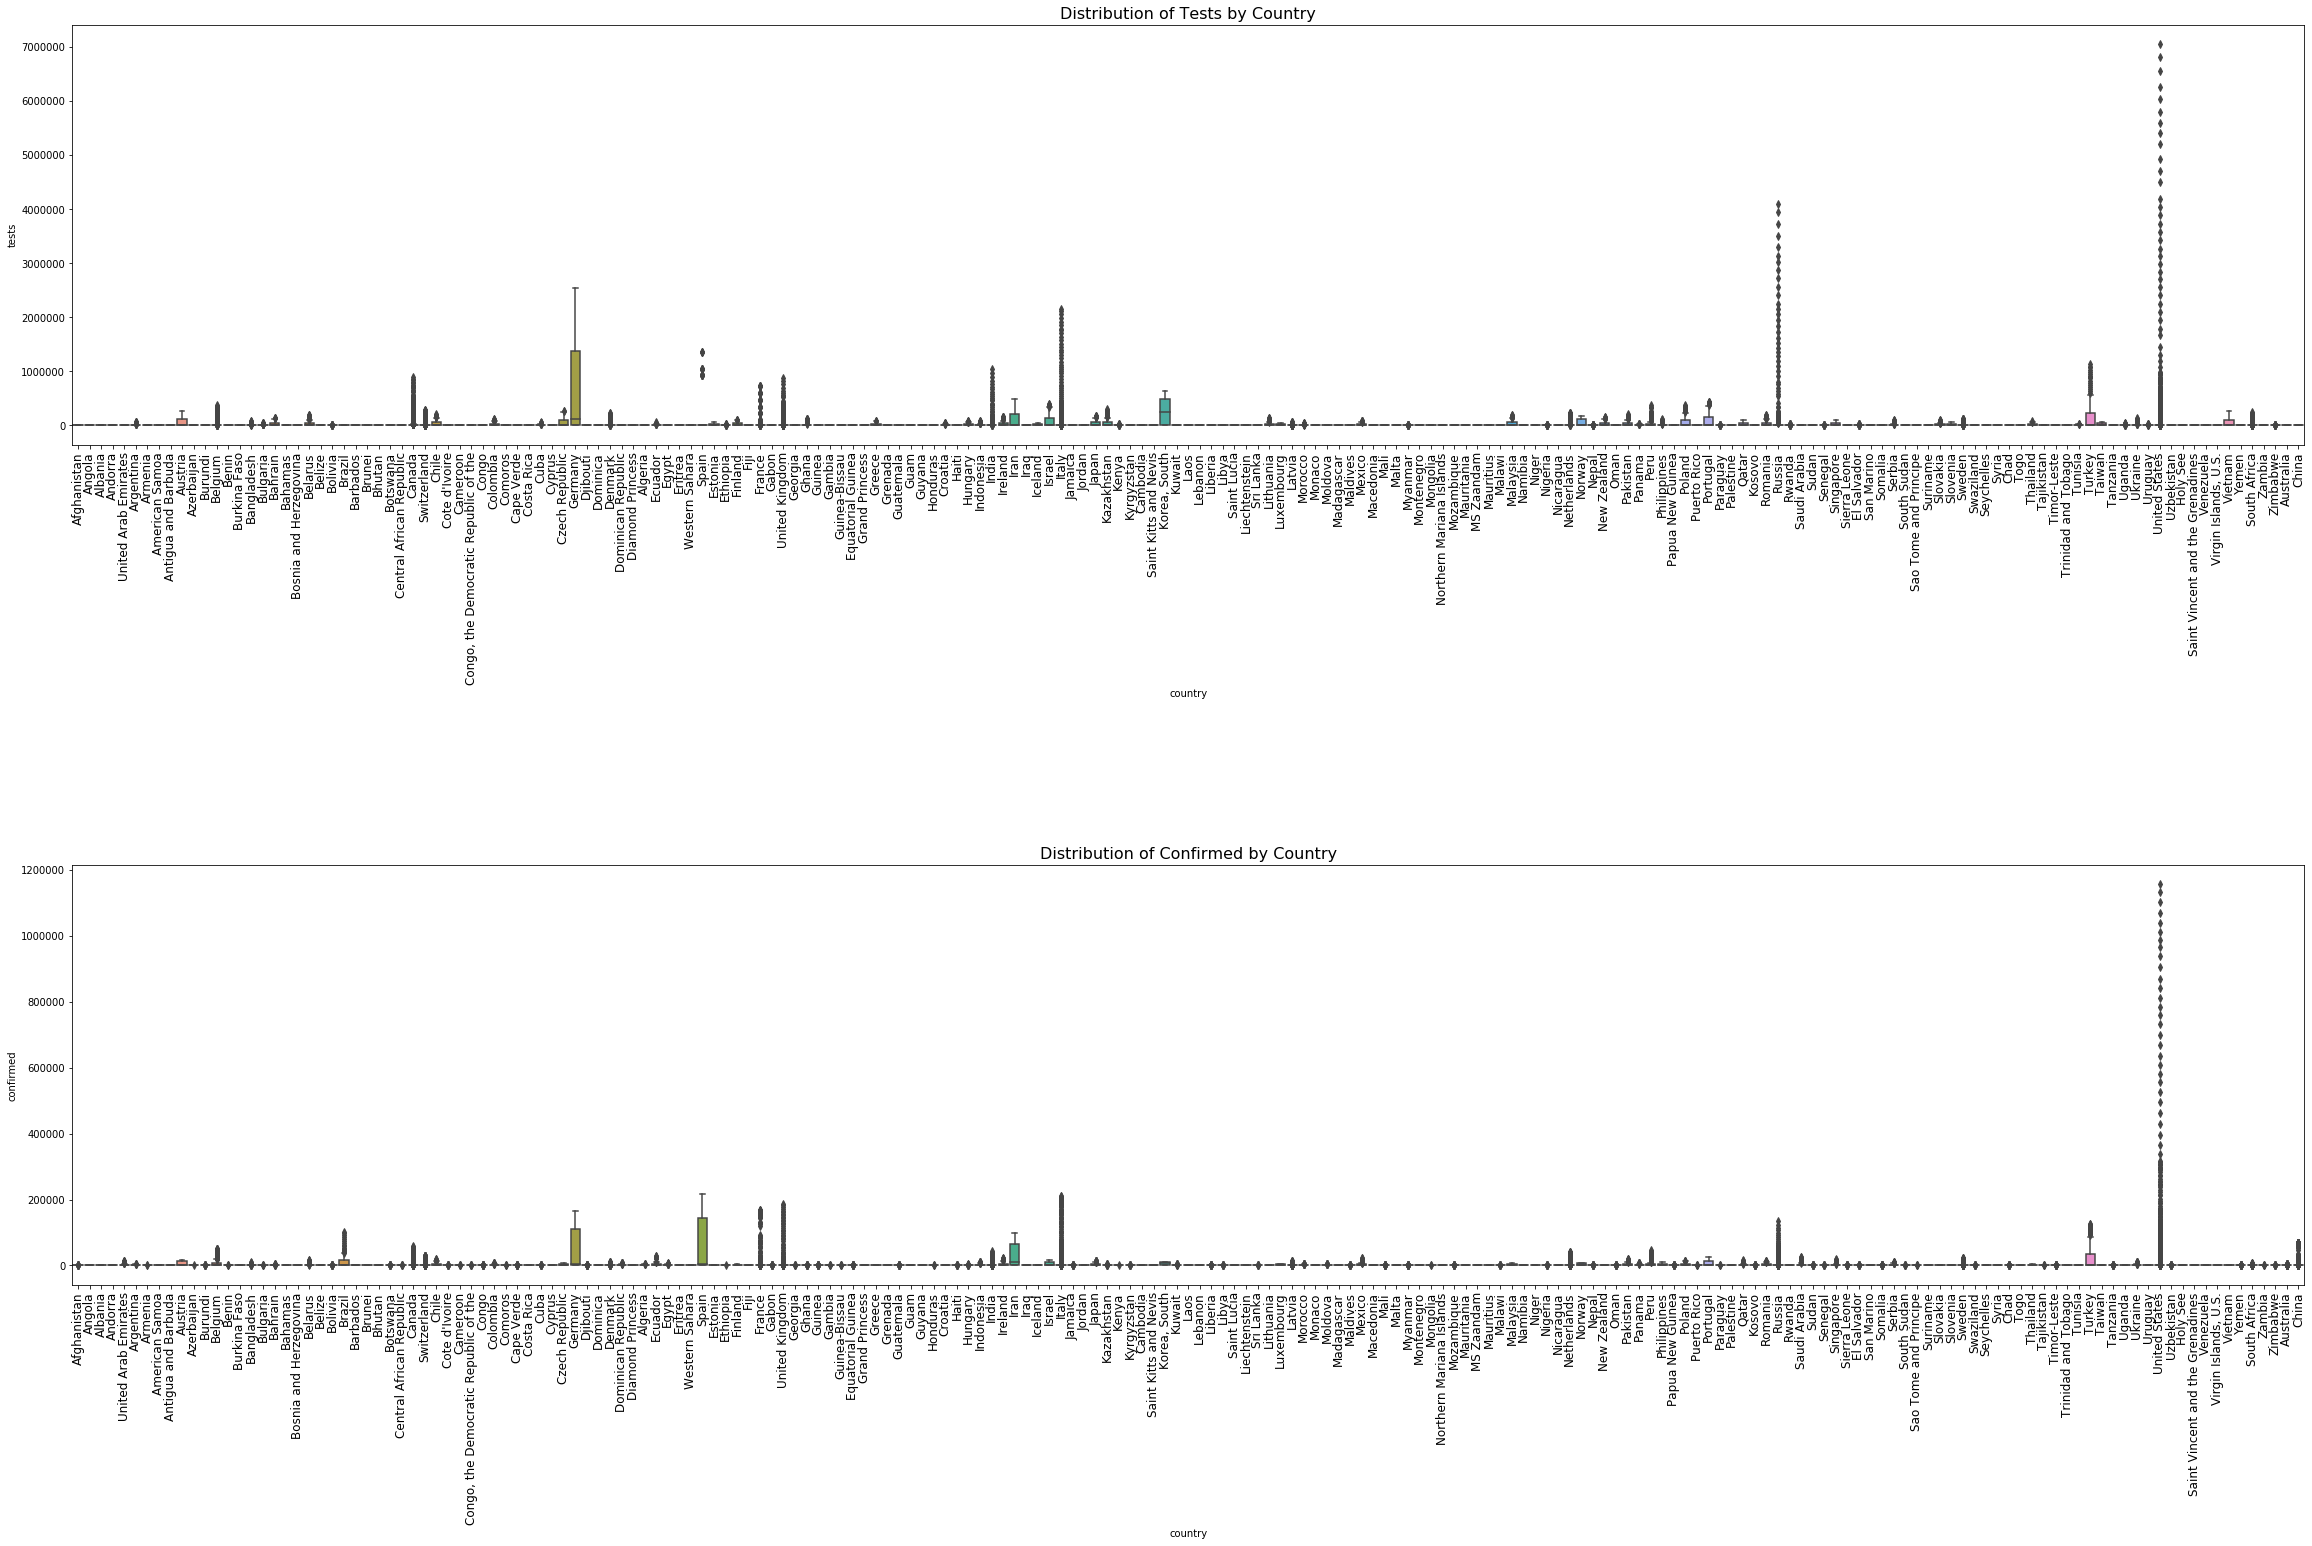

In [51]:
# Distribution of tests and confirmed by country:

plt.figure(figsize=(40,20))
plt.subplot(2,1,1)
sns.boxplot(x='country', y='tests', data=df)
plt.xticks(rotation=90,fontsize=12)
plt.title("Distribution of Tests by Country", fontsize=16)

plt.subplot(2,1,2)
sns.boxplot(x='country', y='confirmed', data=df)
plt.xticks(rotation=90,fontsize=12)
plt.title("Distribution of Confirmed by Country", fontsize=16)

plt.subplots_adjust(hspace=1, top=1)
plt.show()


- United States has the highest number of tests and confirmed.

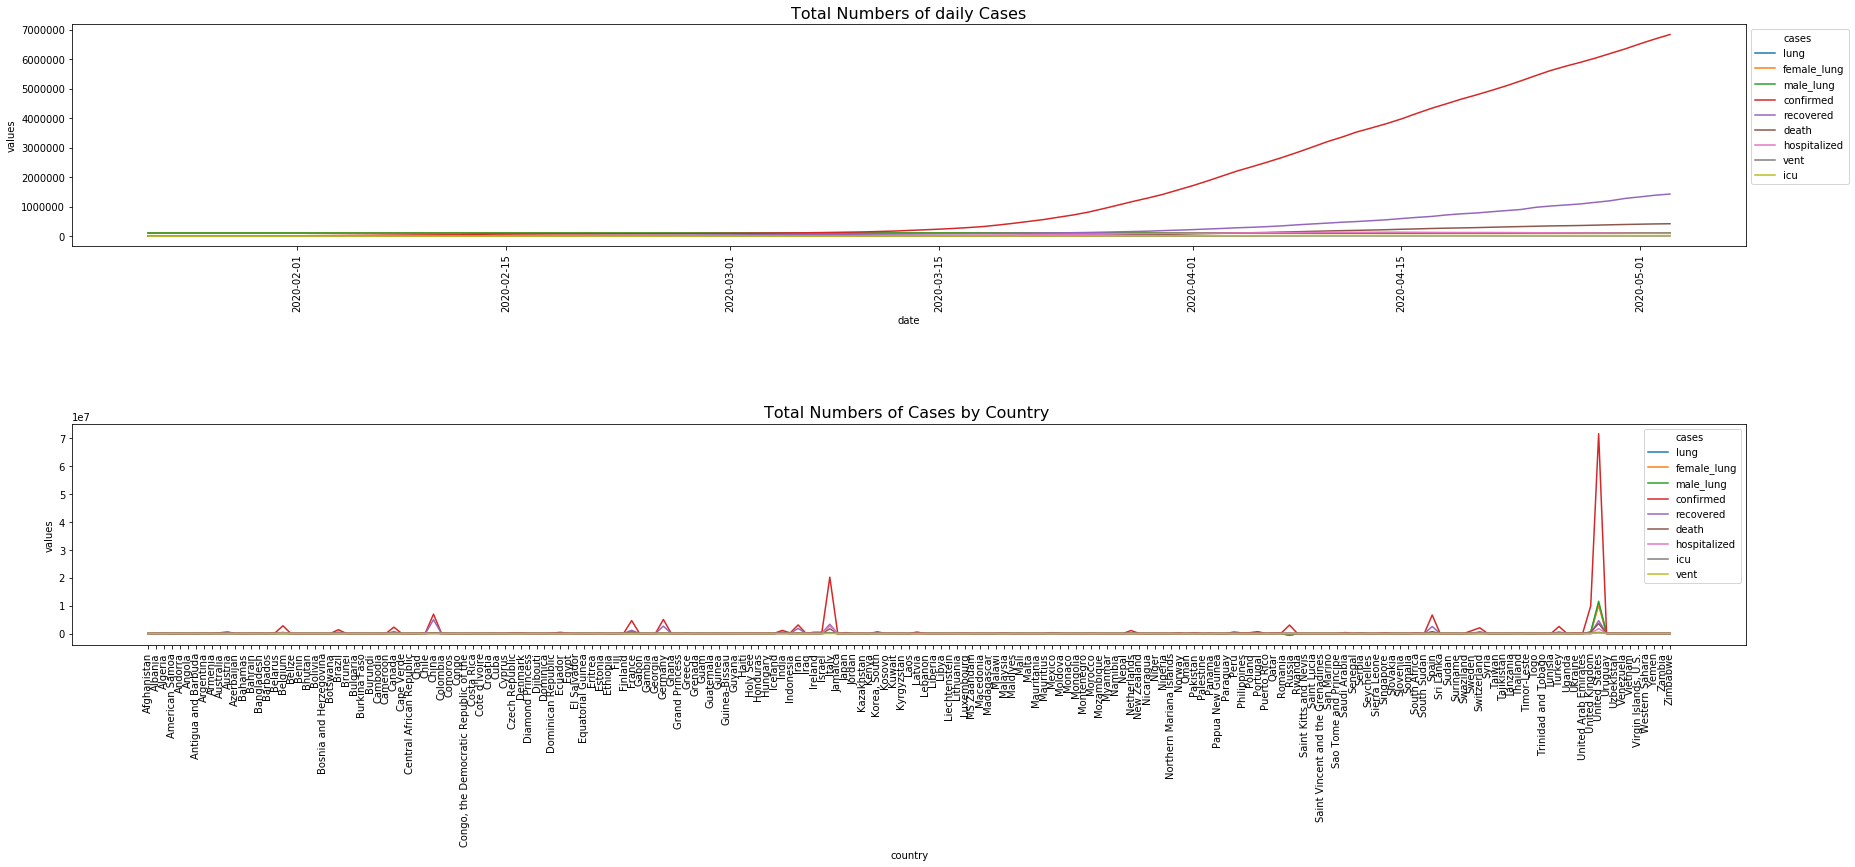

In [52]:
# Distribution of different cases by date and country:
plt.figure(figsize=(30,15))
plt.subplot(2,1,1)
daily_cases = df.groupby('date')[['lung', 'female_lung', 'male_lung','confirmed','recovered','death', 'hospitalized','vent','icu']].sum().reset_index()
daily_cases=pd.melt(daily_cases,  id_vars=['date'], value_vars=['lung', 'female_lung', 'male_lung','confirmed', 'recovered', 'death', 'hospitalized','vent','icu'])
dily_cases = daily_cases.rename(columns={"value": "values", "variable": "cases"})
sns.lineplot(data=dily_cases, x="date", y="values", hue="cases")
plt.title("Total Numbers of daily Cases",fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.legend(loc='best', fontsize=10, bbox_to_anchor=(1,1))
           
plt.subplot(2,1,2)
daily_mobility = df.groupby('country')['lung', 'female_lung', 'male_lung', 'confirmed', 'recovered', 'death', 'hospitalized','icu', 'vent'].sum().reset_index()
daily_mobility=pd.melt(daily_mobility,  id_vars=['country'], value_vars=['lung', 'female_lung', 'male_lung', 'confirmed', 'recovered', 'death', 'hospitalized','icu', 'vent'])
daily_mobility = daily_mobility.rename(columns={"value": "values", "variable": "cases"})
sns.lineplot(data=daily_mobility, x="country", y="values", hue="cases")
plt.title("Total Numbers of Cases by Country ",fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.legend(loc='best', fontsize=10, bbox_to_anchor=(1,1))
           
plt.subplots_adjust(hspace = 0.8, top = 0.7)
plt.show()

- According to daily cases: 
    - The trend of confirmed increased rapidly.
    - The trend of recovered increased slowly.
    - The trend of lung disease, death, icu, vent and hospitalized stayed almost constant.
- According to cases in different countries:
    - United State has the highest number of cofirmed and then Italy. 

In [53]:
# Using T_test of nonnormal distribution to determine if there is a significant difference between the confirmed and death of tested by country:
A= df[df['tests']>0].groupby('country')['confirmed'].mean()
B= df[df['tests']>0].groupby('country')['death'].mean()
stats.mannwhitneyu(A,B)

MannwhitneyuResult(statistic=772.0, pvalue=8.232802861295585e-18)

Pvalue is zero. So it is less than 0.05 which means that the difference between Confirmed and Death for who are tested are significant in each country.

**Preparing data for modeling:**

For modelling, need all columns to be numeric. To convert non-numeric to numeric values, I can either use dummy variables or encode them. I decided to apply encoding.

In [35]:
# Copy of dataset:
df_main=df.copy()

In [36]:
# Extract month and day from date:
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [37]:
# Finding duration time:
start_confirmed_covid = df[df['confirmed']>0].date.min()
latest_confirmed_covid = df[df['confirmed']>0].date.max()
df['duration']=(df['date']-start_confirmed_covid).astype('timedelta64[D]')


In [38]:
# Encoding Categorical variables:
object_columns=df.select_dtypes('object')
for col in object_columns.columns:
    df[f'encode{col}']=pd.factorize(df[col])[0]

In [39]:
# Droping not required columns:
df = df.drop(['date','country','state','city'],axis=1)

In [40]:
# Extract 10% sample of dataset:
df_sample=df.sample(frac=0.1)

In [41]:
# Look at the shape of the sample:
df_sample.shape

(42199, 38)

In [42]:
# Save the data and data sample as csv file:
df.to_csv(r'C:\Users\mebra.DESKTOP-L12LJA6\Thinkful Works\PythonThinkful\covid.csv', index = False) 
df_sample.to_csv(r'C:\Users\mebra.DESKTOP-L12LJA6\Thinkful Works\PythonThinkful\covid_sample.csv', index = False)

In [43]:
# Describe features and target variable:
x = df_sample.drop(['id', 'death', 'confirmed','recovered','encodestate','encodecity'],axis=1)
y_confirmed = df_sample['confirmed']

# Scaled features:
x = StandardScaler().fit_transform(x)


In [44]:
# Spilit dataset:
x_train, x_test, y_train, y_test = train_test_split(x, y_confirmed, test_size=0.3, random_state=0)
print("The number of observations in training set is {}".format(x_train.shape[0]))
print("The number of observations in test set is {}".format(x_test.shape[0]))

The number of observations in training set is 29539
The number of observations in test set is 12660


## Applying Models:

### 1. Supervized Learning Models**

- Logistic Regression
- Random Forest
- Support Vector Classification


#### 1.1. Logistic Regression:

In [64]:
# Applying logistic regression:
lr = LogisticRegression()

# Fit the model:
lr.fit(x_train,y_train)

# Predict train set:
lr_train_preds = lr.predict(x_train)

# Predict the model:
lr_test_preds = lr.predict(x_test)


In [65]:
# Evaluating fitting model with cross validation:

lr_cross_score_train = cross_val_score(lr, x_train, y_train, cv=5).mean()
lr_cross_score_test = cross_val_score(lr, x_test, y_test, cv=5).mean()

In [66]:
# Evaluating model performance with accuracy and f1 score:

lr_accuracy_train = accuracy_score(y_train, lr_train_preds)
lr_accuracy_test = accuracy_score(y_test, lr_test_preds)

lr_f1_test = f1_score(y_test, lr_test_preds, average='weighted')

#### 1.2. Random Forest:

In [67]:
# Applying random forest:

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

rfc_train_preds = rfc.predict(x_train)

rfc_test_preds = rfc.predict(x_test)


In [68]:
# Evaluating fitting model with cross validation:

rfc_cross_score_train=cross_val_score(rfc,x_train,y_train,cv=5).mean()
rfc_cross_score_test=cross_val_score(rfc,x_test,y_test,cv=5).mean()

In [69]:
# Evaluating model performance with accuracy and f1 score:

rfc_accuracy_train = accuracy_score(y_train, rfc_train_preds)
rfc_accuracy_test = accuracy_score(y_test, rfc_test_preds)

rfc_f1_test = f1_score(y_test, rfc_test_preds, average='weighted')

#### 1.3. Support Vector Classification:

In [70]:
# Applying svc:

svc = SVC()
svc.fit(x_train,y_train)

svc_train_preds = svc.predict(x_train)
svc_test_preds = svc.predict(x_test)

In [71]:
# Evaluating fitting model with cross validation:

svc_cross_score_train = cross_val_score(svc,x_train,y_train,cv=5).mean()
svc_cross_score_test = cross_val_score(svc,x_test,y_test,cv=5).mean()

In [72]:
# Evaluating model performance with accuracy and f1 score:

svc_accuracy_train = accuracy_score(y_train, svc_train_preds)
svc_accuracy_test = accuracy_score(y_test, svc_test_preds)

svc_f1_test = f1_score(y_test, svc_test_preds, average='weighted')

### - Comparing primary models accuracy:

In [172]:
# Primary accuracy models results:
Primary_accuracy_models = pd.DataFrame({'models':['Logistic Regression', 'Random Forest Classifier', 'SVC'], 
                                       'Cross Validation Score_train':[lr_cross_score_train,rfc_cross_score_train,svc_cross_score_train],
                                       'Cross Validation Score_test':[lr_cross_score_test,rfc_cross_score_test,svc_cross_score_test],
                                       'Accuracy Score_train':[lr_accuracy_train, rfc_accuracy_train, svc_accuracy_train],
                                       'Accuracy Score_test':[lr_accuracy_test, rfc_accuracy_test, svc_accuracy_test],
                                       'f1 Score_test':[lr_f1_test, rfc_f1_test, svc_f1_test]})
Primary_accuracy_models

models  Cross Validation Score_train  \
0       Logistic Regression                      0.624902   
1  Random Forest Classifier                      0.620496   
2                       SVC                      0.627386   

   Cross Validation Score_test  Accuracy Score_train  Accuracy Score_test  \
0                     0.630273              0.625478             0.622038   
1                     0.620421              0.987068             0.617457   
2                     0.633986              0.627239             0.624329   

   f1 Score_test  
0       0.504961  
1       0.595172  
2       0.492639

- According to the summary result:
    - The SVC model is the best fit model in train and test set.
    - Random Forest has the highest number of accuracy (number of correct predictions/total number of predictions) in train set, but the value of test is much lower. So in general, the Random Forest is the most overfitting model.  
    - Logistic Regression and SVC have almost the same accuracy and f1 score (weighted average of Precision and Recall,takes both false positives and false negative) for the test set. So they are both good to utilise, but SVC is a little better.
    - It should be noted that these initial models are not optimized; I only use the default hyperparameters.

### Improving Scores:

- Feature Engineering:

    - I have already done some feature engineering by converting nonnumeric columns to numeric.    

    - Using PCA for dimentional reduction.

- Adding External Data Source:
    - I have already added external sources.

- Optimizing model by using Random or Grid Search CV to find best parameters.

**Applying PCA:**

In [75]:
# Define features and target variable:

x = df_sample.drop(['id','death', 'confirmed','recovered'],axis=1)
y_confirmed = df_sample['confirmed']

# Scaled features
x = StandardScaler().fit_transform(x)

# Applying PCA for features reduction with 90% explained variance:

pca = PCA(0.90)
principal_components = pca.fit_transform(x)


In [76]:
# Look at the PCA components:
print(abs(pca.components_))

[[1.04327658e-02 1.20187588e-02 1.26810980e-02 1.06326353e-02
  2.72119498e-01 2.73759263e-01 2.81824475e-01 2.83637536e-01
  2.63530044e-01 2.77957593e-01 2.80960335e-01 2.15911710e-01
  2.67977746e-01 2.75709111e-01 1.15768628e-01 2.86807354e-01
  2.93387342e-03 1.72227589e-04 7.22176638e-02 2.33837509e-02
  6.07419739e-02 5.88912100e-02 7.24428526e-02 7.43448709e-02
  6.84460555e-02 6.39259604e-02 6.49571314e-02 2.45632781e-01
  5.06811257e-03 2.57482130e-01 5.50059813e-02 6.03448019e-02
  5.08163360e-02 4.74205820e-02]
 [2.44378227e-02 1.49565759e-02 1.43844914e-02 8.83039574e-03
  3.91812531e-02 5.98517994e-02 5.24431076e-02 6.27894623e-02
  5.86225484e-02 6.32374303e-02 7.16525048e-02 1.47108423e-03
  8.78619282e-02 1.77808734e-02 6.10867078e-02 8.20126504e-02
  1.52356924e-02 7.63741982e-03 1.07321440e-01 2.07917757e-01
  3.31930137e-01 3.27831774e-01 3.37999285e-01 3.43143433e-01
  3.29673558e-01 3.36620789e-01 1.95209873e-01 8.78507822e-02
  1.61676308e-03 9.21017940e-02 2.166

In [77]:
# Find out the number of components that explain 90% of variance in the dataset:
pca_numbers=pca.n_components_

In [78]:
# The percentage of total variance explained by each components:

var_exp = pca.explained_variance_ratio_
print('The percentage of total variance in the dataset explained by each, component from Sklearn PCA.\n', pca.explained_variance_ratio_)

The percentage of total variance in the dataset explained by each, component from Sklearn PCA.
 [0.33066682 0.20607415 0.07950866 0.06429967 0.05077761 0.03978467
 0.03652233 0.02887432 0.02217901 0.02151869 0.01920783 0.01734645]


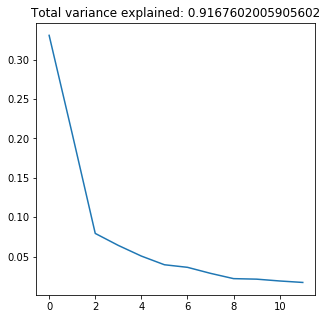

In [79]:
# Plot the variance exolained with PCA:

plt.figure(figsize = (5,5))
plt.plot(var_exp)
plt.title('Total variance explained: {}'.format(var_exp.sum()))
plt.show()

In [80]:
# Convert PCA to dataframe:
pca_df = pd.DataFrame(data=principal_components,columns = ['pca'+str(i) for i in range(1,pca_numbers+1)])

In [81]:
# Add target variable to PCA dataset:

pca_df['confirmed'] = df['confirmed']
pca_df['death'] = df['death']

pca_df.dropna(inplace=True)
pca_df.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0 -3.669501  0.327974  0.512383 -0.291202  0.010080  0.021841 -0.670501   
1  3.142347 -1.384919 -0.180743  0.208726 -0.579925  0.181617 -0.989528   
2 -0.235439 -0.842875 -0.538632  0.156468 -0.227537  0.262734 -0.976678   
3  1.161471 -0.802580 -0.060420  0.109089 -0.484090  0.437937 -1.995443   
4 -3.664802 -0.094650 -0.141481 -0.160060  0.320275  0.262536 -1.232758   

       pca8      pca9     pca10     pca11     pca12  confirmed  death  
0 -0.286298 -0.072061 -0.395422  0.820604 -0.069455          0      0  
1 -0.209218  0.089025 -0.666990  0.517025 -0.060375          0      0  
2 -0.115475  0.006820 -0.653820  0.711228  0.097057          0      0  
3 -0.333306  0.042013 -0.934232  1.044501  0.035710          0      0  
4 -0.152325 -0.054123  0.177163  0.172763 -0.110122          0      0

In [82]:
# Split the PCA dataset:

x_pca = pca_df.drop(['confirmed', 'death'],axis=1)
y_pca_confirmed = pca_df['confirmed']

x_train, x_test, y_train, y_test = train_test_split(x_pca, y_pca_confirmed, test_size=0.3, random_state=0)


**Applying model after PCA:**

#### 1.1.1. Logistic Regression PCA:  

In [83]:
# Applying logistic Regression model After applying PCA:

lr=LogisticRegression()
lr.fit(x_train,y_train)

lr_pca_train_preds=lr.predict(x_train)
lr_pca_test_preds=lr.predict(x_test)

In [84]:
# Evaluating fitting model with cross validation:

lr_pca_cross_score_train = cross_val_score(lr,x_train,y_train,cv=5).mean()

lr_pca_cross_score_test = cross_val_score(lr,x_test,y_test,cv=5).mean()

In [86]:
# Evaluating model performance with accuracy and f1 score:

lr_pca_accuracy_train = accuracy_score(y_train, lr_pca_train_preds)
lr_pca_accuracy_test = accuracy_score(y_test, lr_pca_test_preds )

lr_pca_f1_test = f1_score(y_test, lr_pca_test_preds, average='weighted')

#### 1.2.1. Random Forest PCA:

In [87]:
# Applying Random Forest model after applying PCA:

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

pca_rfc_train_preds = rfc.predict(x_train)
pca_rfc_test_preds = rfc.predict(x_test)

In [88]:
# Evaluating fitting model with cross validation:

rfc_pca_cross_score_train = cross_val_score(rfc, x_train,y_train,cv=5).mean()
rfc_pca_cross_score_test = cross_val_score(rfc, x_test,y_test,cv=5).mean()

In [89]:
# Evaluating model performance with accuracy and f1 score:

rfc_pca_accuracy_train = accuracy_score(y_train,pca_rfc_train_preds)
rfc_pca_accuracy_test = accuracy_score(y_test,pca_rfc_test_preds)

rfc_pca_f1_test = f1_score(y_test, pca_rfc_test_preds, average = 'weighted')

#### 1.3.1. SVC PCA:

In [90]:
# Applying SVC model after applying PCA:

svc = SVC()
svc.fit(x_train, y_train)

svc_pca_train_preds = svc.predict(x_train)
svc_pca_test_preds = svc.predict(x_test)

In [91]:
# Evaluating fitting model with cross validation:

svc_pca_cross_score_train = cross_val_score(svc, x_train, y_train, cv=5).mean()
svc_pca_cross_score_test = cross_val_score(svc, x_test, y_test, cv=5).mean()

In [92]:
# Evaluating model performance with accuracy and f1 score:

svc_pca_accuracy_train = accuracy_score(y_train, svc_pca_train_preds)
svc_pca_accuracy_test = accuracy_score(y_test, svc_pca_test_preds)

svc_pca_f1_test = f1_score(y_test, svc_pca_test_preds, average='weighted')


### - Comparing  models  accuracy after applying PCA:

In [173]:
# Accuracy models results after applying PCA:

pca_accuracy_models = pd.DataFrame({'models':['PCA Logistic Regression', 'PCA Random Forest Classifier', 'PCA SVC'], 
                                       'Cross Validation Score_pca_train':[lr_pca_cross_score_train,rfc_pca_cross_score_train,svc_pca_cross_score_train],
                                       'Cross Validation Score_pca_test':[lr_pca_cross_score_test,rfc_pca_cross_score_test,svc_pca_cross_score_test],
                                       'Accuracy Score_pca_train':[lr_pca_accuracy_train, rfc_pca_accuracy_train, svc_pca_accuracy_train],
                                       'Accuracy Score_pca_test':[lr_pca_accuracy_test, rfc_pca_accuracy_test, svc_pca_accuracy_test],
                                       'f1 Score_pca_test':[lr_pca_f1_test, rfc_pca_f1_test, svc_pca_f1_test]})

pca_accuracy_models

models  Cross Validation Score_pca_train  \
0       PCA Logistic Regression                          0.472808   
1  PCA Random Forest Classifier                          0.368330   
2                       PCA SVC                          0.473035   

   Cross Validation Score_pca_test  Accuracy Score_pca_train  \
0                         0.491868                  0.452927   
1                         0.388085                  0.966350   
2                         0.492151                  0.453705   

   Accuracy Score_pca_test  f1 Score_pca_test  
0                 0.458689           0.288522  
1                 0.361690           0.267289  
2                 0.458768           0.288556

- According to the summary result:
    - The PCA SVC model is best fit model in train and test set.
    - PCA Random forest has the highest number of accuracy score in train set, but the value of test is much lower. So,the PCA Random Forest has the most overfitting model.
    - PCA Logistic Regression and PCA SVC have almost same accuracy and f1 score for test set. So both of them are good to use, but PCA SVC abit better.
    - The accuracy and f1 score of models after applying PCA is less than primary model. So, PCA does not seem to improve the models.
    - Should be noted that these initial models are not optimized; I only use the default hyperparameters.

### Optimizing Models by Hyperparameter Optimization:

- GridSearchCV
- RandomizedSearchCV 
    Due to RandomizedSearchCV is faster than GridSearchCV, I will use RandomizedSearchCV to optimize hyperparameters and find a starting set of hyperparameters. 

In [124]:
# Define features and target variable:

x = df_sample.drop(['id', 'death', 'confirmed','recovered'],axis=1)
y_confirmed = df_sample['confirmed']

# Scaled features:
x = StandardScaler().fit_transform(x)

In [125]:
# Split dataset:
x_train, x_test, y_train, y_test = train_test_split(x, y_confirmed, test_size=0.3, random_state=0)
print("The number of observations in training set is {}".format(x_train.shape[0]))
print("The number of observations in test set is {}".format(x_test.shape[0]))

The number of observations in training set is 29539
The number of observations in test set is 12660


#### 1.1.2. Logistic Regression Optimized:

In [97]:
# Describe RandomizedSearch parameters:

lr_randomized_params={'penalty':['l2'],
                     'C': np.arange(0.1, 1.0, 0.3),
                     'solver': ['lbfgs', 'sag'], 
                     'multi_class': ['auto', 'multinomial']}

In [98]:
# Applying RandomizedSearchCV:
lr = LogisticRegression()
lr_randomized = RandomizedSearchCV(estimator=lr, param_distributions=lr_randomized_params)
lr_randomized.fit(x_train, y_train)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': array([0.1, 0.4, 0.7]),
                                        'multi_class': ['auto', 'multinomial'],
                                        'penalty': ['l2'],
                                        'solver': ['lbfgs',

In [99]:
# Finding best parameters:
lr_randomized.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 0.4}

In [138]:
# Applying Logistic Regression with best parameters:

lr_optimize = LogisticRegression(penalty='l2', C = 0.4 ,class_weight=None, solver='lbfgs' , multi_class='multinomial')
lr_optimize.fit(x_train,y_train)

lr_optimize_preds_train = lr_optimize.predict(x_train)
lr_optimize_preds_test = lr_optimize.predict(x_test)

In [139]:
# Evaluating fitting model with cross validation:

lr_optimize_cross_score_train = cross_val_score(lr_optimize,x_train, y_train, cv=5).mean()
lr_optimize_cross_score_test = cross_val_score(lr_optimize,x_test, y_test, cv=5).mean()

In [140]:
# Evaluating model performance with accuracy and f1 score:

lr_optimize_accuracy_train = accuracy_score(y_train,lr_optimize_preds_train)
lr_optimize_accuracy_test = accuracy_score(y_test,lr_optimize_preds_test)

lr_optimize_f1_test = f1_score(y_test,lr_optimize_preds_test, average='weighted')


#### 1.2.2. Random Forest Optimized:

In [103]:
# Describ RandomizedSearch parameters:
rfc_randomized_params = {
    'n_estimators': [200, 300],
    'max_depth' : [3,5,7],
    'criterion' :['gini', 'entropy']
}

In [104]:
# Applying RandomizedSearchCV:

rfc = RandomForestClassifier()
rfc_randomized = RandomizedSearchCV(estimator=rfc,param_distributions=rfc_randomized_params,n_iter=5)
rfc_randomized.fit(x_train,y_train)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs

In [105]:
# Finding best parameters:
rfc_randomized.best_params_

{'n_estimators': 200, 'max_depth': 7, 'criterion': 'gini'}

In [106]:
# Applying Random Forest with best parameters:

rfc_optimize = RandomForestClassifier(n_estimators=200, max_depth=7 , criterion='gini')
rfc_optimize.fit(x_train,y_train)

rfc_optimize_preds_train = rfc_optimize.predict(x_train)
rfc_optimize_preds_test = rfc_optimize.predict(x_test)

In [107]:
# Evaluating fitting model with cross validation:
rfc_optimize_cross_score_train = cross_val_score(rfc_optimize, x_train, y_train, cv=5).mean()
rfc_optimize_cross_score_test =  cross_val_score(rfc_optimize, x_test, y_test, cv=5).mean()

In [108]:
# Evaluating model performance with accuracy and f1 score:

rfc_optimize_accuracy_train = accuracy_score(y_train,rfc_optimize_preds_train)
rfc_optimize_accuracy_test = accuracy_score(y_test,rfc_optimize_preds_test)

rfc_optimize_f1_test = f1_score(y_test,rfc_optimize_preds_test, average='weighted')

#### 1.3.2. SVC Optimized:

In [109]:
# Describ RandomizedSearch parameters:
svc_randomized_params={'kernel':['linear', 'poly', 'sigmoid'],
                       'gamma':['scale','auto']
                      }

In [110]:
# Applying RandomizedSearchCV:

svc=SVC()
svc_randomized = RandomizedSearchCV(estimator=svc,param_distributions=svc_randomized_params)
svc_randomized.fit(x_train,y_train)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=False,
                                 random_state=None, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly',
                                                   'sigmoid']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [111]:
# Finding best parameters:
svc_randomized.best_params_

{'kernel': 'poly', 'gamma': 'auto'}

In [141]:
# Applying SVC with best parameters:

svc_optimize = SVC(kernel='poly' , gamma='auto')
svc_optimize.fit(x_train, y_train)

svc_optimize_preds_train = svc_optimize.predict(x_train)
svc_optimize_preds_test = svc_optimize.predict(x_test)

In [142]:
# Evaluating fitting model with cross validation:
svc_optimize_cross_score_train = cross_val_score(svc_optimize, x_train, y_train, cv=5).mean()
svc_optimize_cross_score_test = cross_val_score(svc_optimize, x_test, y_test, cv=5).mean()

In [143]:
# Evaluating model performance with accuracy and f1 score:

svc_optimize_accuracy_train = accuracy_score(y_train, svc_optimize_preds_train) 
svc_optimize_accuracy_test = accuracy_score(y_test, svc_optimize_preds_test) 

svc_optimize_f1_test = f1_score(y_test, svc_optimize_preds_test, average='weighted')


 ### - Comparing all optimized models accuracy:

In [174]:
# Optimized accuracy models results:

optimized_accuracy_models = pd.DataFrame({'models':['Optimized Logistic Regression', 'Optimized Random Forest Classifier', 'Optimized SVC'], 
                                       'Cross Validation Score_Optimized_train':[lr_optimize_cross_score_train,rfc_optimize_cross_score_train,svc_optimize_cross_score_train],
                                       'Cross Validation Score_Optimized_test':[lr_optimize_cross_score_test,rfc_optimize_cross_score_test,svc_optimize_cross_score_test],
                                       'Accuracy Score_Optimized_train':[lr_optimize_accuracy_train, rfc_optimize_accuracy_train, svc_optimize_accuracy_train],
                                       'Accuracy Score_Optimized_test':[lr_optimize_accuracy_test, rfc_optimize_accuracy_test, svc_optimize_accuracy_test],
                                       'f1 Score_Optimized_test':[lr_optimize_f1_test, rfc_optimize_f1_test, svc_optimize_f1_test]})
optimized_accuracy_models

models  Cross Validation Score_Optimized_train  \
0       Optimized Logistic Regression                                0.625068   
1  Optimized Random Forest Classifier                                0.629243   
2                       Optimized SVC                                0.628021   

   Cross Validation Score_Optimized_test  Accuracy Score_Optimized_train  \
0                               0.630801                        0.627983   
1                               0.634534                        0.634889   
2                               0.632975                        0.643759   

   Accuracy Score_Optimized_test  f1 Score_Optimized_test  
0                       0.621959                 0.504249  
1                       0.625908                 0.496866  
2                       0.624803                 0.505302

- According to the summary result:
    - All results have almost same cross validation score in train and test set, which means fitting models are the same.
    - All results have almost the same accuracy for train and test set. So all models don't have overfitting.
    - The accuracy score of Optimized Random Forest model in test set is the highest.
    - The f1 score of Optimized SVC model in test set is the highest, So I chose this model as the best one.
    - The accuracy and f1 score of models after optimization are a little better than primary model. So, optimization does  improve the models.

**Feature Importance:**

- Logistic Regression does not have built in feature importance functions, but a simple way to find feature importance for logistic regression is to multiply the standard deviation by the coefficients of each feature.
- Random forest has built in feature importance function.
- Unfortunately SVC has only feature important for linear kernel. So, I could not find any way to find feature importance for SVC, at least not without long runtimes. 

#### 1.1.3. Logistic Regression Feature Importance:

In [132]:
# Define Coef and mean:

lr_coef = []
lr_mean = []
for i in range(34):
    lr_coef.append(lr_optimize.coef_[:,i])
    lr_mean.append(lr_coef[i].mean())


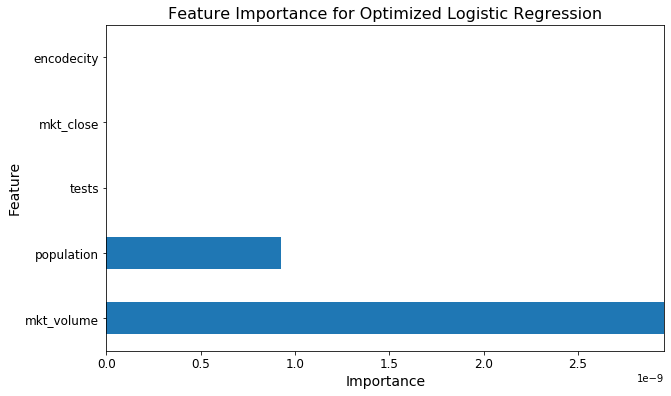

In [134]:
# Finding Logistic Regression Feature Importance:

lr_optimized_featureimportant = pd.DataFrame({'Feature name':abs(np.std(x_train, 0) * lr_mean).index, 'Importance': abs(np.std(x_train, 0) * lr_mean).values})
lr_optimized_featureimportant.sort_values(['Importance'], ascending = False, inplace = True)


# Plot Logistic Regression Feature Importance:

lr_optimized_featureimportant.head(5).plot('Feature name', 'Importance', kind = 'barh',legend=False, figsize=(10,6))
plt.title('Feature Importance for Optimized Logistic Regression', fontsize = 16)
plt.xlabel('Importance', fontsize = 14)
plt.ylabel('Feature', fontsize = 14)
plt.tick_params(axis='both', which='major', labelsize=12)

- As shown, Feature Importance in Logistic Regression is stock market volume.

#### 1.2.3. Random Forest Feature Importance:

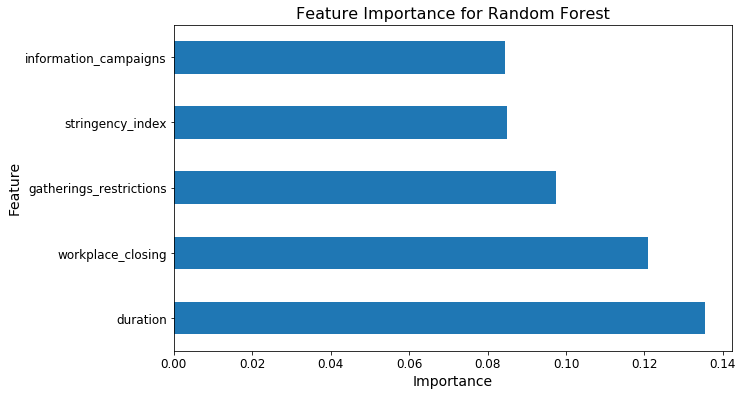

In [135]:
# Finding Random Forest Feature Importance:

rfc_optimized_featureimportant = pd.DataFrame({'Feature name': x_train.columns, 'Importance': rfc_optimize.feature_importances_})
rfc_optimized_featureimportant.sort_values(['Importance'], ascending=False, inplace=True)

# Plot Random Forest Feature Importance:

rfc_optimized_featureimportant.head(5).plot('Feature name', 'Importance', kind = 'barh',legend=False, figsize=(10,6))
plt.title('Feature Importance for Random Forest', fontsize = 16)
plt.xlabel('Importance', fontsize = 14)
plt.ylabel('Feature', fontsize = 14)
plt.tick_params(axis='both', which='major', labelsize=12)

- As shown, Feature Importance in Optimized Random Forest is duration.

## 2. Unsupervized Learning Models(Clustering):


### Clustering Methods:

- Kmeans
- Hierarchical clustering
- Density-Based Spatial Clustering of Applications with Noise (DBSCAN)DBSCAN
- Clustering with Gaussian Mixture Models (GMM)

**Preparing dataset:**

In [126]:
df_sample = pd.read_csv(r'C:\Users\mebra.DESKTOP-L12LJA6\Thinkful Works\PythonThinkful\covid_sample.csv')

In [127]:
# Drop all Labels Columns:
x = df_sample.drop(['id', 'death', 'confirmed','recovered','encodestate', 'encodecity'],axis=1)
df_cluster =x.copy()


In [128]:
# Scaled dataset:
scaler = StandardScaler() 
x = scaler.fit_transform(x)

**Illustrate dataset by using Dimensional Reduction:**

- PCA
- TSNE
- UMAP

In [147]:
# Applying PCA:
pca_start=time.time()
pca = PCA(n_components=2).fit_transform(x)
print('PCA time elapsed: {} seconds'.format(time.time()-pca_start))

# Applying TSNE:
tsne_start=time.time()
tsne = TSNE(n_components=2, perplexity=100, n_iter=300).fit_transform(x)
print('t-SNE time elapsed: {} seconds'.format(time.time()-tsne_start))

# Applying UMAP:
umap_start=time.time()
umap = umap.UMAP(n_neighbors=5,min_dist=0.3,metric='correlation').fit_transform(x)
print('UMAP time elapsed: {} seconds'.format(time.time()-umap_start))


PCA time elapsed: 0.32383251190185547 seconds
t-SNE time elapsed: 374.10238432884216 seconds
UMAP time elapsed: 42.899760246276855 seconds


- According to the time elapsed, In PCA, time elapsed is much less than TSNE and UMAP. Also UMAP time elapsed is much less than TSNE.


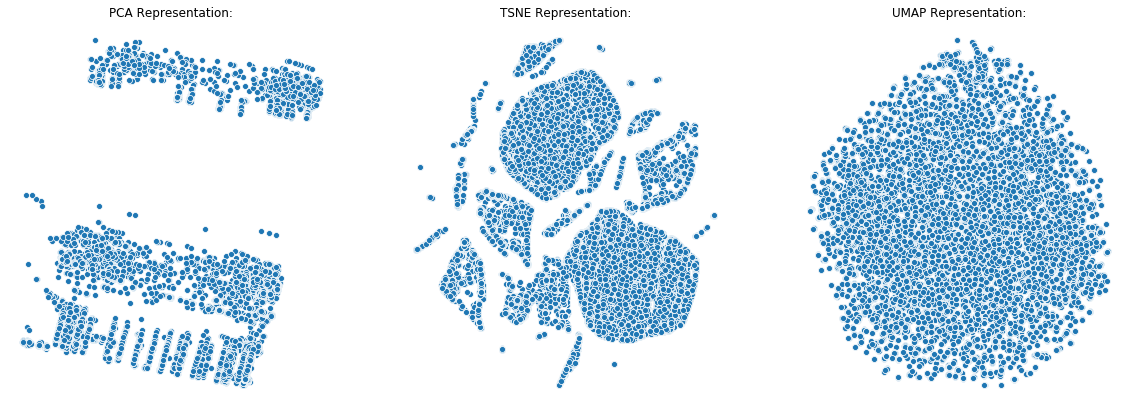

In [148]:
# Applying Scatter plot:

plt.figure(figsize=(20,7))

# Applying Scatter plot with PCA:
plt.subplot(1,3,1)
sns.scatterplot(pca[:, 0], pca[:, 1])
plt.title('PCA Representation:')
plt.axis('off')
    
# Applying Scatter plot with TSNE:
plt.subplot(1,3,2)
sns.scatterplot(tsne[:,0], tsne[:,1])
plt.title('TSNE Representation:')
plt.axis('off')

# Applying Scatter plot with UMAP:
plt.subplot(1,3,3)
sns.scatterplot(umap[:,0],umap[:,1])
plt.title('UMAP Representation:')
plt.axis('off')
plt.show()

As shown, TSNE and PCA represent the dataset better than UMAP.

#### 2.1. KMeans Clustering:

In [129]:
# Normalized dataset:
x = normalize(x)
df_kmean = pd.DataFrame(df_cluster)

In [150]:
# Defining the k-means and fit the model:
kmeans_clusters = KMeans(n_clusters=43, random_state=0)
kmeans_pred = kmeans_clusters.fit_predict(x)

# Adding prediction of the clustering to the Kmeans dataframe:
df_kmean['cluster'] = kmeans_pred

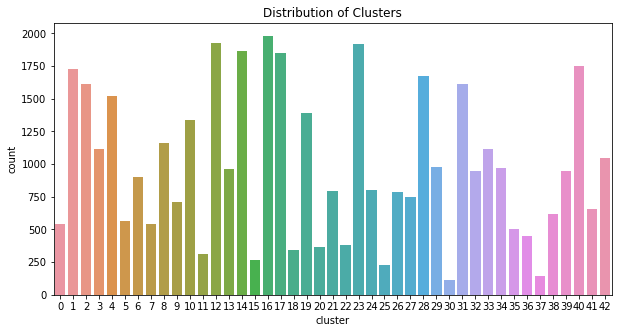

In [151]:
# Plot distribution of clusters:
plt.figure(figsize=(10,5))
sns.countplot(data=df_kmean, x='cluster')
plt.title('Distribution of Clusters')
plt.show()

- Number of values per cluster is different in each cluster. It Is highest in the cluster 16.

**- Finding the Best Number of Clusters with Elbow method for KMeans:**

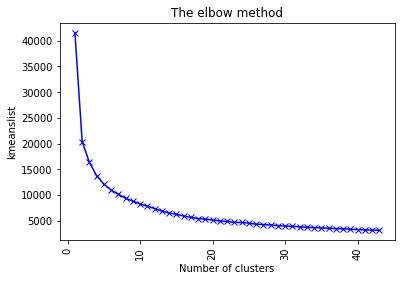

In [152]:
# Finding the optimum number of clusters for k-means classification:

kmeanslist = []
for i in range (1,44):
    kmeans = KMeans(n_clusters=i, init ='k-means++',random_state = 0)
    kmeans.fit(x)
    kmeanslist.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, allowing us to observe 'The elbow':    
plt.plot(range(1,44),kmeanslist,'bx-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('kmeanslist')
plt.xticks(rotation=90)
plt.show()

Based on the Elbow plot, the best number of clusters is 2.

In [130]:
# Define Kmeans clustering with the best number of elbow's method clusters:
kmeans_elbow= KMeans(n_clusters=2,random_state=0)

%timeit kmeans_elbow.fit(x)
kmeans_elbow_preds = kmeans_elbow.fit_predict(x)
df_kmean['cluster'] = kmeans_elbow_preds

1.19 s ± 53.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


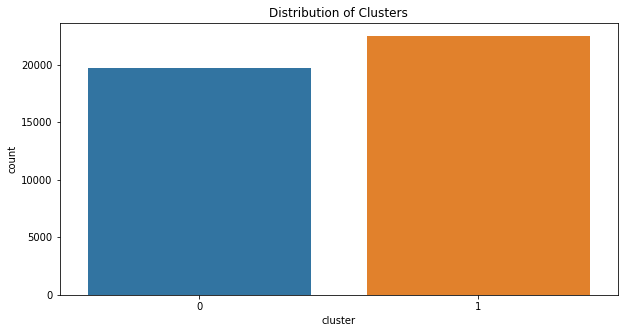

In [131]:
# Plotting a count graph:
plt.figure(figsize=(10,5))
sns.countplot(df_kmean['cluster'])
plt.title('Distribution of Clusters')
plt.show()

- Number of values per cluster is highest in the cluster 1.

In [136]:
# Calculate Silhouette score for different number of clusters:
silhouette_kmeans_scores = []
num_clusters_list = []

for cluster in range(2,20):
    kmeans = KMeans(n_clusters=cluster, random_state=0)
    preds = kmeans.fit_predict(x)
    silhouette_score = metrics.silhouette_score(x,preds, metric='euclidean')
    print("Silhouette score for {} cluster k-means: {}".format(cluster,metrics.silhouette_score(x, preds, metric='euclidean')))
    silhouette_kmeans_scores.append((silhouette_score,cluster))
    num_clusters_list.append(cluster)
         
df_kmeans_score=pd.DataFrame(silhouette_kmeans_scores,columns=['Silhouette_Score', 'Number_clusters'])
df_kmeans_score.sort_values(by='Silhouette_Score',ascending=False).head(5)                                   

Silhouette score for 2 cluster k-means: 0.49665186181849347
Silhouette score for 3 cluster k-means: 0.461515960927464
Silhouette score for 4 cluster k-means: 0.46156085464365965
Silhouette score for 5 cluster k-means: 0.4379537416998131
Silhouette score for 6 cluster k-means: 0.45398990749446483
Silhouette score for 7 cluster k-means: 0.361788112701785
Silhouette score for 8 cluster k-means: 0.3114529470748089
Silhouette score for 9 cluster k-means: 0.3237595948301489
Silhouette score for 10 cluster k-means: 0.3389547180150941
Silhouette score for 11 cluster k-means: 0.34002300372247857
Silhouette score for 12 cluster k-means: 0.3390951765619195
Silhouette score for 13 cluster k-means: 0.3590511524301397
Silhouette score for 14 cluster k-means: 0.34644358694195954
Silhouette score for 15 cluster k-means: 0.32905874329171275
Silhouette score for 16 cluster k-means: 0.36120255710670757
Silhouette score for 17 cluster k-means: 0.3515130067272576
Silhouette score for 18 cluster k-means: 0.

Silhouette_Score  Number_clusters
0          0.496652                2
2          0.461561                4
1          0.461516                3
4          0.453990                6
3          0.437954                5

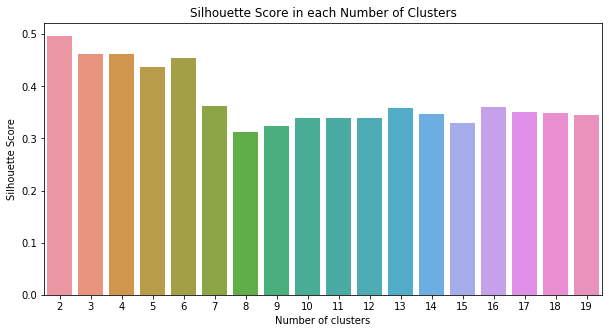

In [137]:
# Plotting a bar graph to compare the results: 

plt.figure(figsize=(10,5))
sns.barplot(x=df_kmeans_score['Number_clusters'], y=df_kmeans_score['Silhouette_Score'])
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.title('Silhouette Score in each Number of Clusters')
plt.show()

- According to the results, the best solution is for the 2 clusters as its silhouette score is the highest.

In [132]:
# Define the Kmeans with the highest number of silhouette scores clusters:
kmeans_optimized=KMeans(n_clusters=2, random_state=0)
kmeans_optimized_time = %timeit -o kmeans_optimized.fit(x)
kmeans_optimized_preds = kmeans_optimized.fit_predict(x)
df_kmean['cluster'] = kmeans_optimized_preds
kmeans_optimized_score=metrics.silhouette_score (x, kmeans_optimized_preds, metric='euclidean')


1.16 s ± 93.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


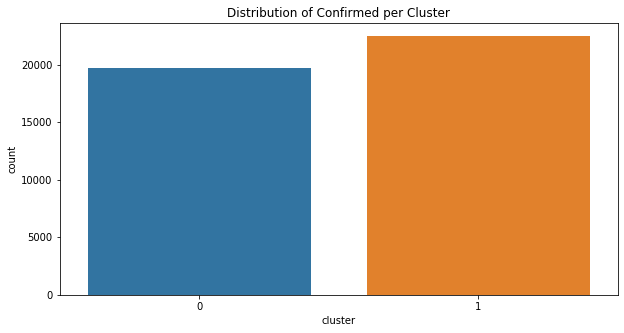

In [133]:
# Plotting a count graph:
plt.figure(figsize=(10,5))
sns.countplot(data=df_kmean, x='cluster')
plt.title("Distribution of Confirmed per Cluster")
plt.show()

- Number of values per cluster is highest in the cluster 1.

In [134]:
# Calculate the average value of each column in each cluster:
df_kmean.groupby('cluster').mean()

tests  hospitalized       icu      vent  school_closing  \
cluster                                                                  
0        3367.318759     15.819368  2.652295  1.016149        2.993703   
1         768.751011      6.774781  1.846759  0.182610        0.449949   

         workplace_closing  cancel_events  gatherings_restrictions  \
cluster                                                              
0                 2.759902       1.998020                 3.762086   
1                 0.016573       0.272271                 0.131248   

         transport_closing  stay_home_restrictions  ...       lung  \
cluster                                             ...              
0                 0.972476                2.003250  ...  28.530548   
1                 0.001333                0.003688  ...  24.043642   

         female_lung  male_lung  crime_index    population     month  \
cluster                                                                
0          26.240920  31.478997    42.409217  3.169806e+08  3.705007   
1          21.749682  27.180111    38.702889  2.720234e+08  2.150353   

               day   duration     encodeid  encodecountry  
cluster                                                    
0        17.157627  76.975879  2122.381627     166.004977  
1        15.367663  28.426045  1977.723686     160.230595  

[2 rows x 32 columns]

**- Apllying another option of kmeans called MiniBatchkmeans:**

In [135]:
# Defining the mini-batch k-means:

minibatch_kmean = MiniBatchKMeans(n_clusters=2, random_state=0)

# Fit model
%timeit minibatch_kmean.fit(x)

minibatch_kmean_preds = minibatch_kmean.fit_predict(x)

metrics.silhouette_score (x, minibatch_kmean_preds, metric='euclidean')

299 ms ± 42 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


0.49664525445097096

MiniBatchkmeans time elapsed is much less than Kmeans, but their silhouette scores are the same.

#### 2.2. Hierarchical Clustering:

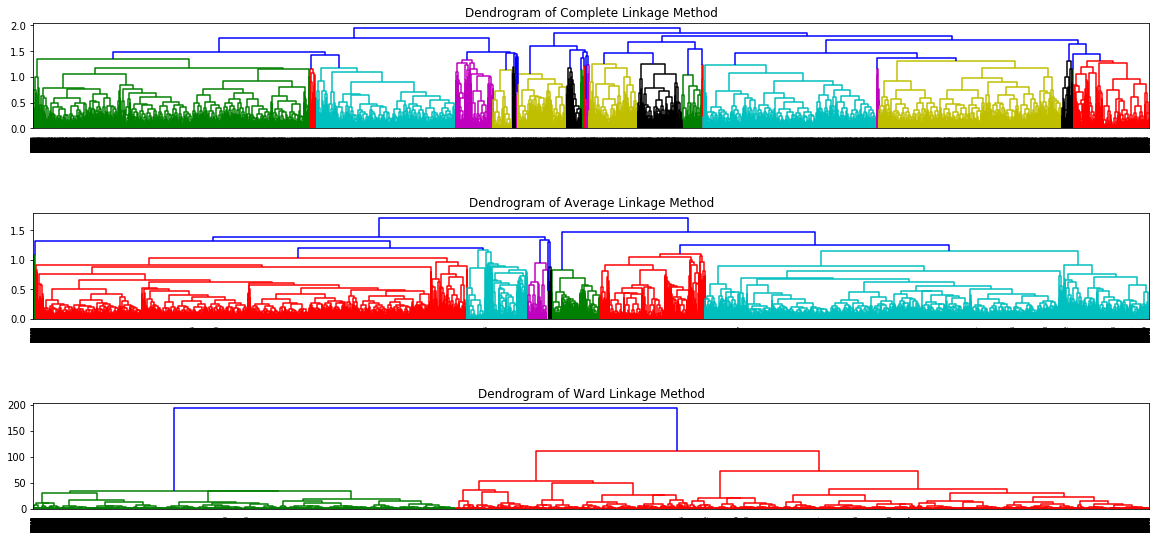

In [161]:
# Sketch the dendrogram using the different linkage method.

plt.figure(figsize=(20,10))

plt.subplot(3,1,1)
dendrogram(linkage(x, method='complete'))
plt.title('Dendrogram of Complete Linkage Method')

plt.subplot(3,1,2)
dendrogram(linkage(x, method='average'))
plt.title('Dendrogram of Average Linkage Method')

plt.subplot(3,1,3)
dendrogram(linkage(x, method='ward'))
plt.title('Dendrogram of Ward Linkage Method')

plt.subplots_adjust(hspace = 0.8, top = 0.8)
plt.show()

The ward linkage method produces more reasonable result, because the number of observations for each cluster is almost the same, but two other linkage methods have too few observationss for one of the clusters.

In [72]:
# Finding best number of clusters by calculating Silhouette score for different number of clusters:


silhouette_hierarchy_scores = [] 

for cluster in range(2,5):
    for linkage_method in ['ward', 'average', 'complete']:
        agg_clustering = AgglomerativeClustering(linkage= linkage_method, affinity='euclidean',n_clusters=cluster).fit_predict(x)
        silhouette_score = metrics.silhouette_score(x, agg_clustering, metric='euclidean')
        silhouette_hierarchy_scores.append((silhouette_score,linkage_method, len(set(agg_clustering))))

        
df_hierarchical = pd.DataFrame(silhouette_hierarchy_scores, columns=['silhouette_score_agglomerative','linkage method','number_of_clusters_agglomerative'])
df_hierarchical.sort_values(by='silhouette_score_agglomerative', ascending=False).head(5)

silhouette_score_agglomerative linkage method  \
0                        0.488969           ward   
2                        0.485772       complete   
1                        0.479196        average   
4                        0.458119        average   
3                        0.454663           ward   

   number_of_clusters_agglomerative  
0                                 2  
2                                 2  
1                                 2  
4                                 3  
3                                 3

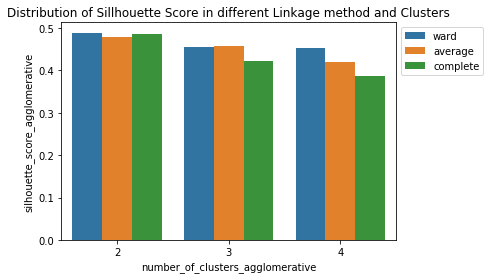

In [73]:
# PLot the result:
sns.barplot(x=df_hierarchical['number_of_clusters_agglomerative'] ,y=df_hierarchical['silhouette_score_agglomerative'],  hue =df_hierarchical['linkage method'])
plt.title('Distribution of Sillhouette Score in different Linkage method and Clusters')
plt.legend(loc="upper left", prop={'size': 10}, bbox_to_anchor=(1,1))
plt.show()

According to the plot, The highest number of silhouette score is for number of clusters 2 with ward linkage method. 

43.3 s ± 1.25 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


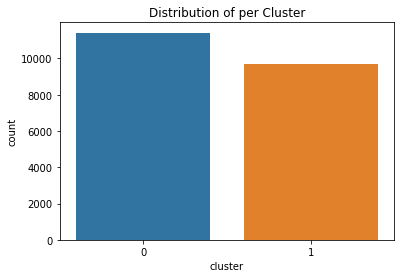

In [74]:
# Defining the agglomerative clustering:
df_agg = pd.DataFrame(df_cluster)
agg_cluster_optimized = AgglomerativeClustering(linkage='ward',affinity='euclidean',n_clusters=2)

agg_optimized_time = %timeit -o agg_cluster_optimized.fit(x)

agg_optimized_preds = agg_cluster_optimized.fit_predict(x)
df_agg["cluster"] = agg_optimized_preds

agg_optimized_score = metrics.silhouette_score (x, agg_optimized_preds, metric='euclidean')

# Plot the result:
sns.countplot(x='cluster', data=df_agg)
plt.title("Distribution per Cluster")
plt.show()

According to the plot, distribution of values per cluster is higher in cluster 0, so density is much in the cluster 0.

In [75]:
# Calculate the Average values of columns in each cluster:
df_agg.groupby('cluster').mean()

tests  hospitalized      icu      vent  school_closing  \
cluster                                                                 
0         400.217414       0.00219  0.00473  0.000000        0.511212   
1        4252.472325      24.94589  4.87309  1.423069        2.960553   

         workplace_closing  cancel_events  gatherings_restrictions  \
cluster                                                              
0                 0.077260       0.315960                 0.219429   
1                 2.743494       1.976249                 3.727902   

         transport_closing  stay_home_restrictions  ...       lung  \
cluster                                             ...              
0                 0.026629                0.057814  ...  20.760865   
1                 0.961793                1.977076  ...  32.451554   

         female_lung  male_lung  crime_index    population     month  \
cluster                                                                
0          18.594251  23.750748    35.665808  2.543272e+08  2.197004   
1          30.005757  35.576642    45.963928  3.391002e+08  3.687939   

               day   duration     encodeid  encodecountry  
cluster                                                    
0        15.463122  29.929222  1955.271023     160.155133  
1        17.173895  76.478831  2157.130112     166.267348  

[2 rows x 32 columns]

#### 2.3. DBSCAN Clustering:

In [88]:
# Finding best params by calculating Silhouette score for different eps and min_sample parameters:

silhouette_dbscan_scores = []

for eps in np.arange(5,16,5):
    for min_sample in range(7,25,7):
        
        dbscan = DBSCAN(eps=eps, min_samples=min_sample).fit_predict(x)
        silhouette_score = metrics.silhouette_score(x, dbscan , metric='euclidean')
        silhouette_dbscan_scores.append((eps, min_sample, silhouette_score, len(set(dbscan))))
        
df_dbscan = pd.DataFrame(silhouette_dbscan_scores, columns=['eps_dbscan', 'min_samples_dbscan', 'silhouette_score_dbscan', 'number_of_clusters_dbscan'])
df_dbscan.sort_values(by='silhouette_score_dbscan', ascending=False).head(5)

eps_dbscan  min_samples_dbscan  silhouette_score_dbscan  \
6          15                   7                 0.873952   
7          15                  14                 0.869639   
8          15                  21                 0.869639   
3          10                   7                 0.840686   
4          10                  14                 0.835859   

   number_of_clusters_dbscan  
6                          2  
7                          2  
8                          2  
3                          2  
4                          2

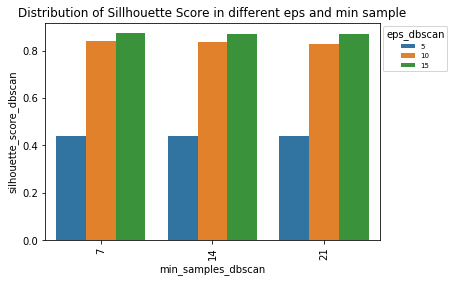

In [89]:
# Plot the result:
sns.barplot(x=df_dbscan['min_samples_dbscan'], y=df_dbscan['silhouette_score_dbscan'], hue =df_dbscan['eps_dbscan'], data=df_dbscan)
plt.title('Distribution of Sillhouette Score in different eps and min sample')
plt.xticks(rotation=90)
plt.legend(title='eps_dbscan',loc="upper left", prop={'size': 7}, bbox_to_anchor=(1,1))

plt.show()

According to the plot, The highest number of silhouette score is for number of clusters 2 with eps=15, min_samples=7. 

In [90]:
# Defining the DBSCAN clustering method with Highest silhouette score params:
df_dbscan= pd.DataFrame(df_cluster)

dbscan_optimized = DBSCAN(eps=15, min_samples=7)

# Fit model
dbscan_optimized_time = %timeit -o dbscan_optimized.fit(x)

dbscan_optimized_preds = dbscan_optimized.fit_predict(x)
df_dbscan["cluster"] = dbscan_optimized_preds
dbscan_optimized_score = metrics.silhouette_score(x, dbscan_optimized_preds, metric='euclidean')

43 s ± 246 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


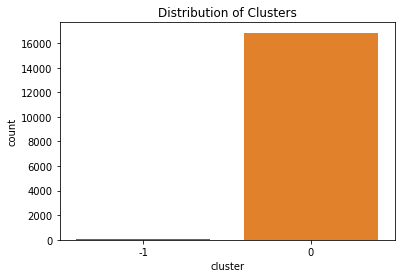

In [110]:
# Plot the result:

sns.countplot(x='cluster', data=df_dbscan)
plt.title("Distribution of Clusters")
plt.show()

According to the DBSCAN result, density is very much in the one cluster, most of the values are clusterd in the one cluster and lower number of variables are as an outlier.

In [92]:
# Calculate the Average values of columns in each cluster:
df_dbscan.groupby('cluster').mean()

tests  hospitalized         icu        vent  school_closing  \
cluster                                                                        
-1       414797.250000   4218.214286  801.285714  226.250000        2.071429   
 0         1185.537503      4.030560    0.719321    0.117078        1.614408   

         workplace_closing  cancel_events  gatherings_restrictions  \
cluster                                                              
-1                2.107143       1.464286                 2.785714   
 0                1.270710       1.062070                 1.790114   

         transport_closing  stay_home_restrictions  ...       lung  \
cluster                                             ...              
-1                0.678571                1.535714  ...  22.759151   
 0                0.449917                0.920662  ...  26.271189   

         female_lung  male_lung  crime_index    population     month  \
cluster                                                                
-1         18.767008  27.997722    40.912008  2.279866e+08  3.321429   
 0         23.983922  29.312285    40.572527  2.942041e+08  2.861856   

               day   duration     encodeid  encodecountry  
cluster                                                    
-1       16.821429  65.107143   172.321429     102.428571  
 0       16.246914  50.705851  2058.909150     163.222763  

[2 rows x 32 columns]

#### 2.4. Gaussian Mixture Models (GMM) Clustering:

In [138]:
# Finding best params by calculating Silhouette score for different number of clusters and covariance type:

silhouette_gmm_score = []

for cluster in range(2,15,2):
    for cov_type in ['full', 'tied', 'diag', 'spherical']:
        gmm  = GaussianMixture(n_components=cluster,covariance_type=cov_type, random_state=0).fit_predict(x)
        silhouette_score = metrics.silhouette_score(x, gmm, metric='euclidean')
        silhouette_gmm_score.append((silhouette_score, cov_type, len(set(gmm)) ) )
        
df_gmm = pd.DataFrame(silhouette_gmm_score, columns=['silhouette_score_GMM','covariance_type_GMM', 'number_of_clusters_GMM'])
df_gmm.sort_values(by='silhouette_score_GMM', ascending=False).head(5)

silhouette_score_GMM covariance_type_GMM  number_of_clusters_GMM
1              0.495499                tied                       2
0              0.492841                full                       2
5              0.456275                tied                       4
4              0.443366                full                       4
3              0.439658           spherical                       2

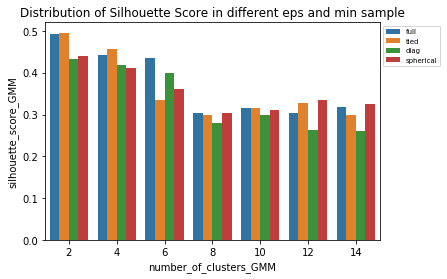

In [139]:
# PLot the result:

sns.barplot(x=df_gmm['number_of_clusters_GMM'], y=df_gmm['silhouette_score_GMM'], hue =df_gmm['covariance_type_GMM'], data=df_gmm)
plt.title('Distribution of Silhouette Score in different eps and min sample')
plt.legend(loc="upper left", prop={'size': 7}, bbox_to_anchor=(1,1))
plt.show()

The highest Silhouette Score is for number of 2 clusters and covariance_type of tied.


In [140]:
# Define the gmm clustering with highest Silhouette score params:

df_gmm= pd.DataFrame(df_cluster)
gmm_optimized = GaussianMixture(n_components=2 , covariance_type= 'tied', random_state=0)

gmm_optimized_time = %timeit -o gmm_optimized.fit(x)

gmm_optimized_preds = gmm_optimized.fit_predict(x)
df_gmm["cluster"] = gmm_optimized_preds

gmm_optimized_score = metrics.silhouette_score(x, gmm_optimized_preds, metric='euclidean')

766 ms ± 34.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


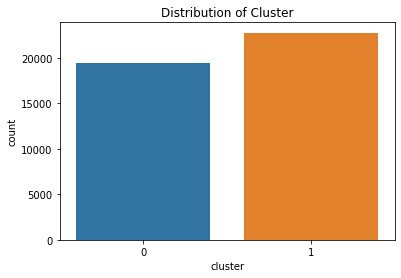

In [141]:
# Plot the result:
sns.countplot(x='cluster', data=df_gmm)
plt.title("Distribution of Cluster")
plt.show()

Number of values per cluster is highest in the cluster 1.


In [142]:
# Calculate the average value of each column in each cluster:
df_gmm.groupby('cluster').mean()

tests  hospitalized       icu     vent  school_closing  \
cluster                                                                 
0        3678.133385     20.192804  3.341866  1.23706        2.993986   
1         529.961089      3.128034  1.265301  0.00233        0.476214   

         workplace_closing  cancel_events  gatherings_restrictions  \
cluster                                                              
0                 2.777744       1.998509                 3.774557   
1                 0.029898       0.289835                 0.158415   

         transport_closing  stay_home_restrictions  ...       lung  \
cluster                                             ...              
0                 0.974505                2.023182  ...  29.423416   
1                 0.009717                0.007474  ...  23.326646   

         female_lung  male_lung  crime_index    population     month  \
cluster                                                                
0          27.129948  32.369851    43.335728  3.213230e+08  3.707376   
1          21.036016  26.462879    37.948981  2.687775e+08  2.164527   

               day   duration     encodeid  encodecountry  
cluster                                                    
0        17.135492  77.027448  2145.405860     166.686199  
1        15.405250  28.887839  1959.536361     159.708055  

[2 rows x 32 columns]

### Comparing all models result:

In [143]:
# Comparing results of methods to find the optimal number of cluster model:
silhouette_scores_methods = [['KMeans', kmeans_optimized_score, kmeans_optimized_time],
                                ['Agglomerative',agg_optimized_score, agg_optimized_time],
                                ['DBSCAN', dbscan_optimized_score, dbscan_optimized_time],
                                ['GMM', gmm_optimized_score, gmm_optimized_time]]

silhouette_scores_methods  = pd.DataFrame(silhouette_scores_methods, columns=['Clustering Method', 'Silhouette Score', 'Time Elapsed']) 
silhouette_scores_methods.sort_values(by='Silhouette Score', ascending= False)

Clustering Method  Silhouette Score  \
2            DBSCAN          0.873952   
0            KMeans          0.496652   
3               GMM          0.495499   
1     Agglomerative          0.488969   

                                        Time Elapsed  
2  43 s ± 246 ms per loop (mean ± std. dev. of 7 ...  
0  1.16 s ± 93.8 ms per loop (mean ± std. dev. of...  
3  766 ms ± 34.4 ms per loop (mean ± std. dev. of...  
1  43.3 s ± 1.25 s per loop (mean ± std. dev. of ...

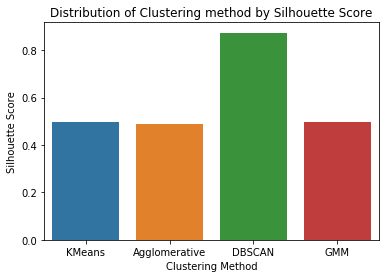

In [144]:
# PLot the Result:
sns.barplot(x='Clustering Method', y='Silhouette Score', data=silhouette_scores_methods)
plt.title("Distribution of Clustering method by Silhouette Score")
plt.show()

Based on the results, DBSCAN with highest Silhouette Score is the the best clustering method, but based on DBSCAN result, most of the values clusterd in the one cluster and the lower number of variables are as an outlier, so density is very much in the first cluster. Hence, evaluating model with the silhouette score metric to choose the best method does not seem a suitable one for DBSCAN model even with a high silhouette score.

The Second Highest Silhouette Score is for Kmeans and GMM. So, I compared the distribution of variables and time elapsed in both clustering methods to find the best one.

According to the result, Time Elapsed in GMM method is much less than kmeans method. So, I compared the distribution of variables in both clustering method to find best one.

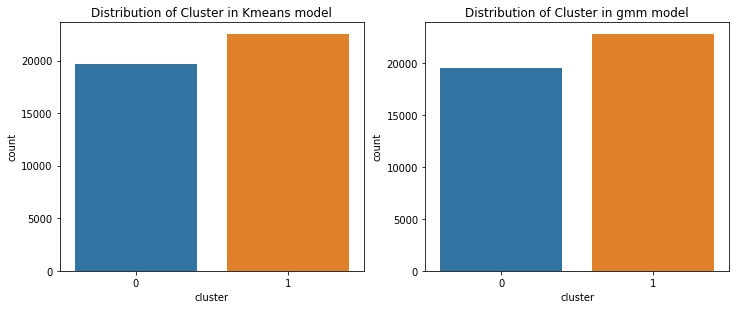

In [148]:
# Plot the results:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x='cluster', data=df_kmean)
plt.title("Distribution of Cluster in Kmeans model")

plt.subplot(1,2,2)
sns.countplot(x='cluster', data=df_gmm)
plt.title("Distribution of Cluster in gmm model")
plt.subplots_adjust(hspace = 0.8, top = 0.7)
plt.show()

According to the plot, in both models, the number of values per cluster distribured almost the same without any density in any cluster.

<Figure size 3600x1800 with 0 Axes>

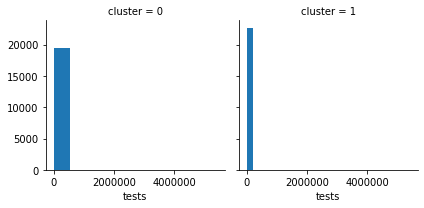

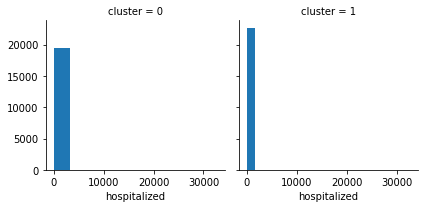

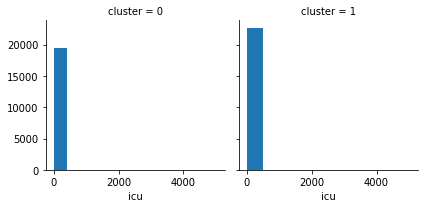

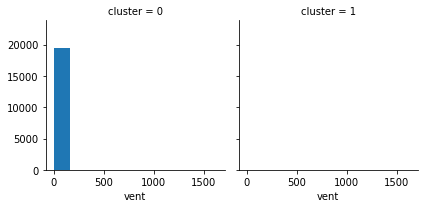

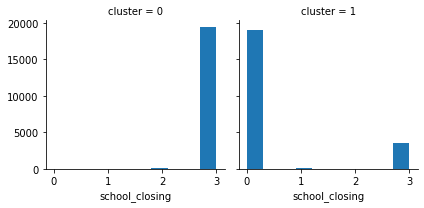

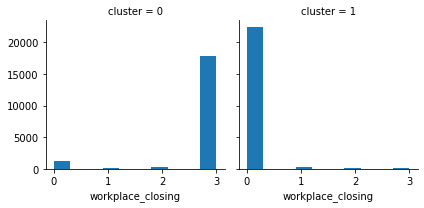

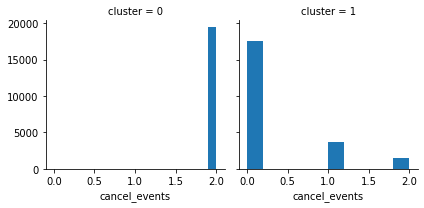

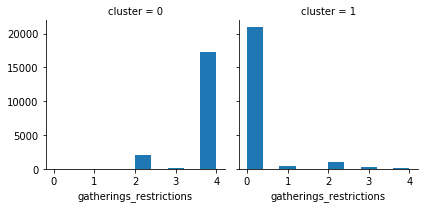

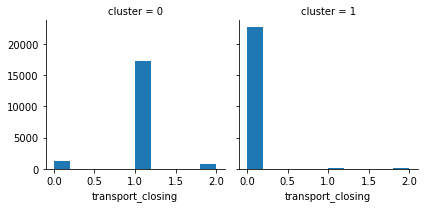

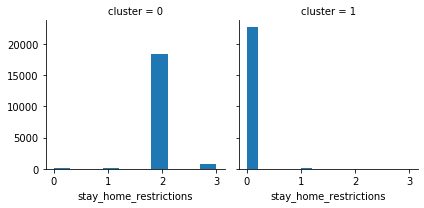

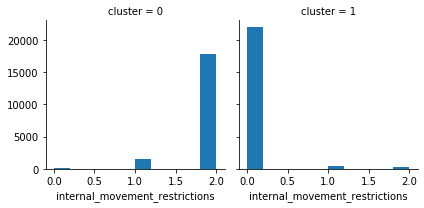

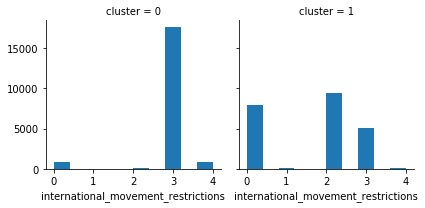

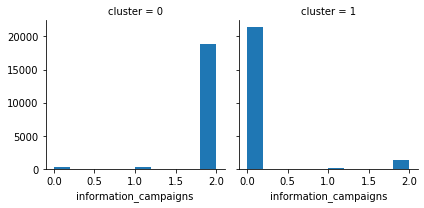

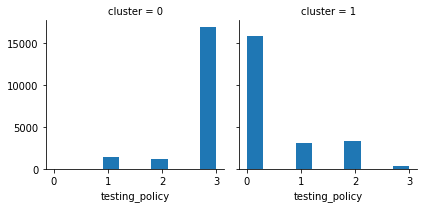

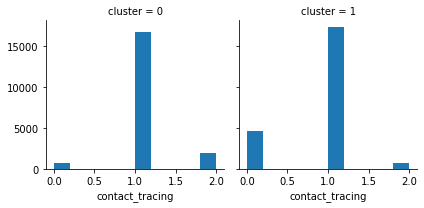

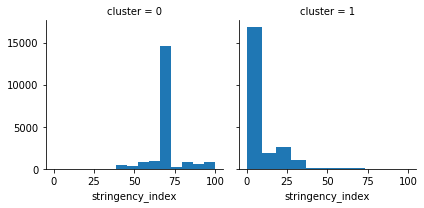

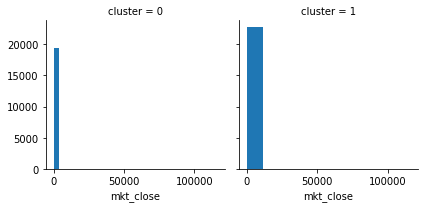

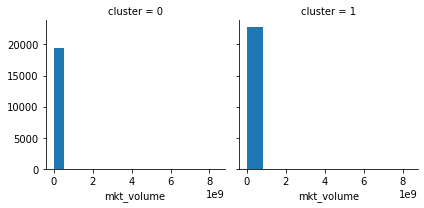

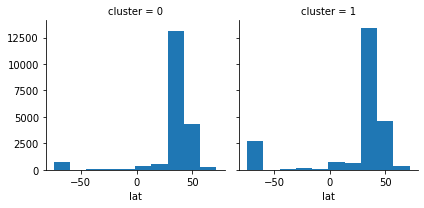

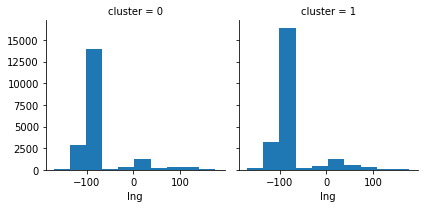

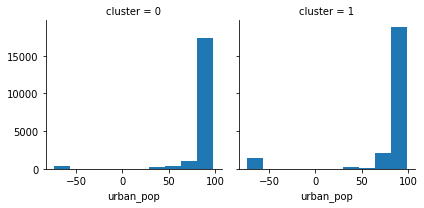

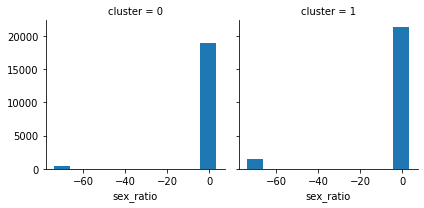

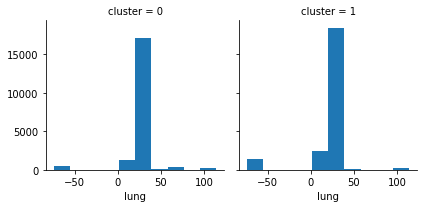

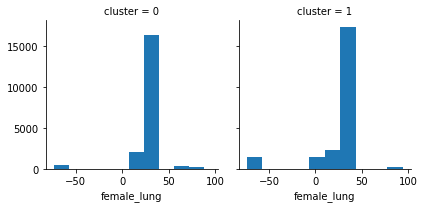

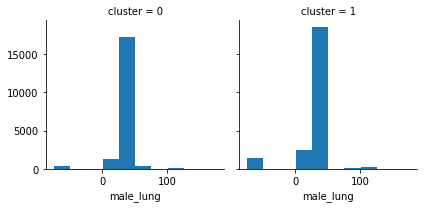

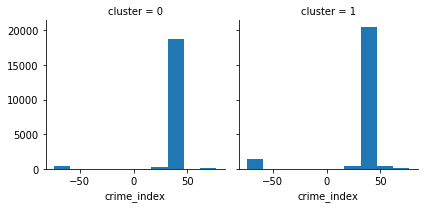

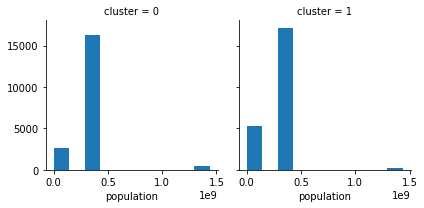

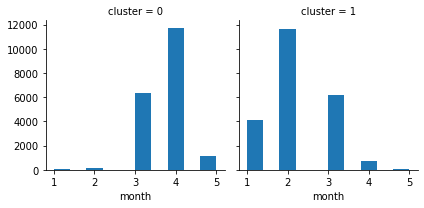

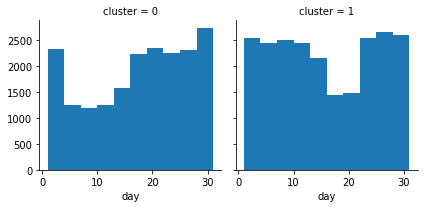

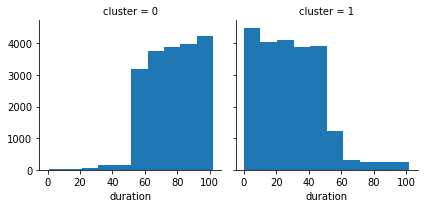

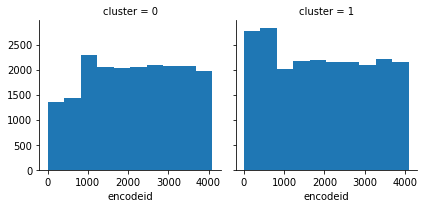

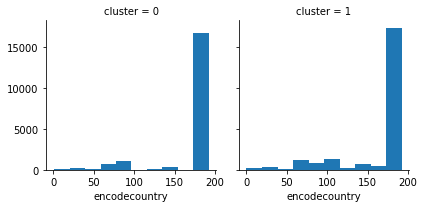

In [151]:
# Clusters Interpretation by using FacetGrid plot:
plt.figure(figsize=(50,25))
for column in df_kmean.drop('cluster',axis=1):
    g = sns.FacetGrid(df_kmean, col='cluster')
    g.map(plt.hist, column)

According to the results:

Cluster 0: This cluster indicates a group with high hospitalized, icu, vent and more restrictions. We can assume that this group is confirmed as they had covid_19. The number of values in this cluster is a bit lower which is good.

Cluster 1: This cluster indicates a group with low hospitalized, icu, vent and less restrictions. We can assume that this group is not confirmed to get covid_19. 

<Figure size 3600x1800 with 0 Axes>

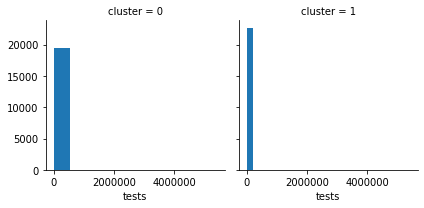

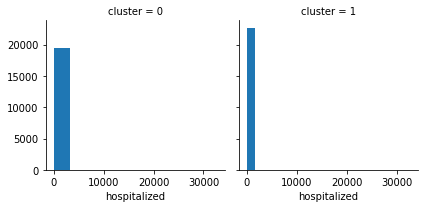

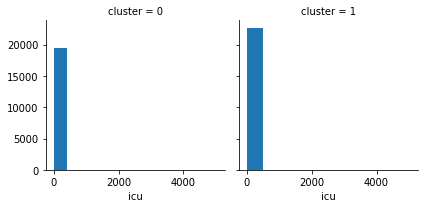

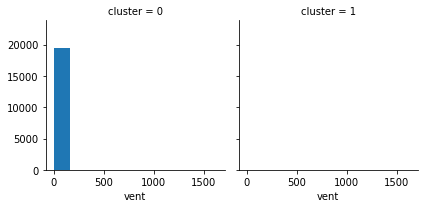

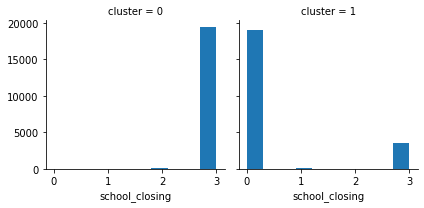

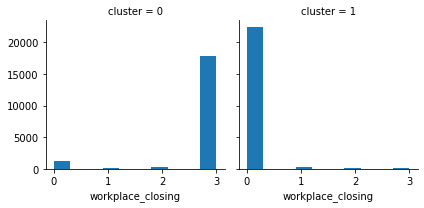

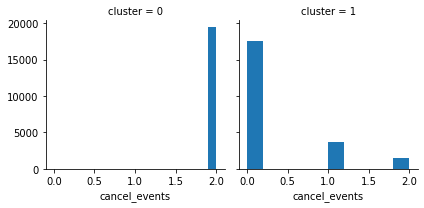

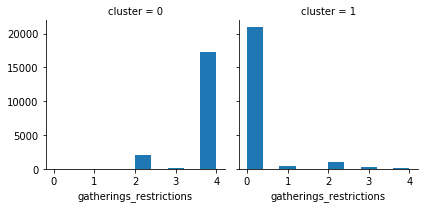

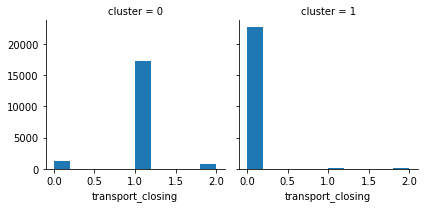

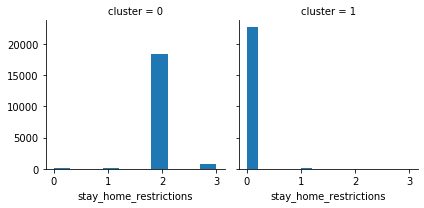

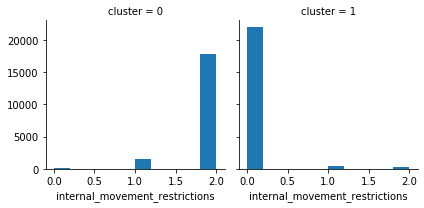

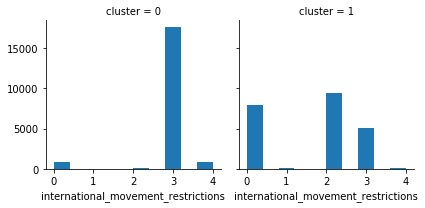

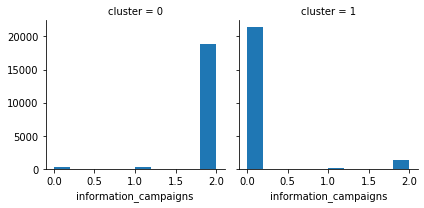

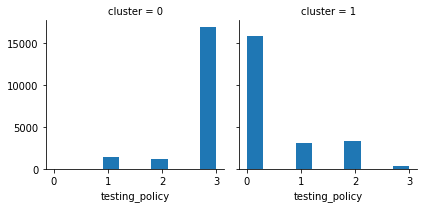

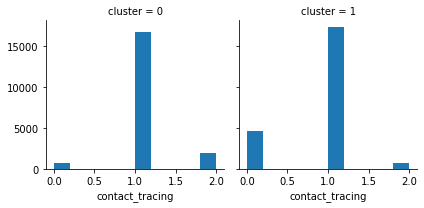

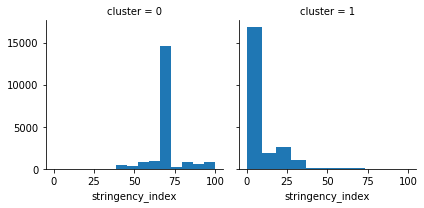

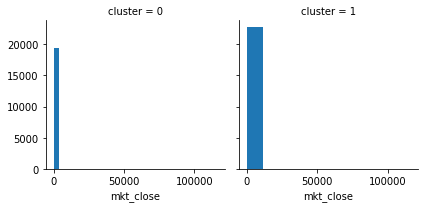

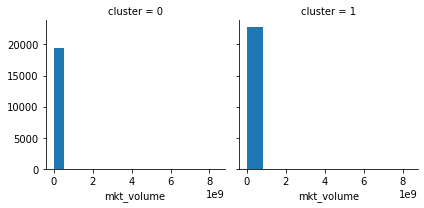

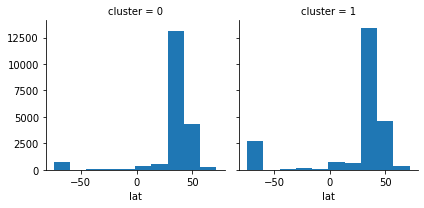

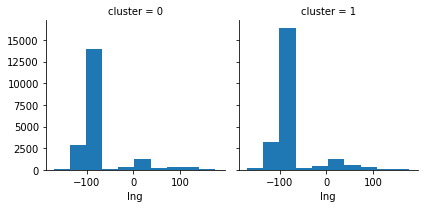

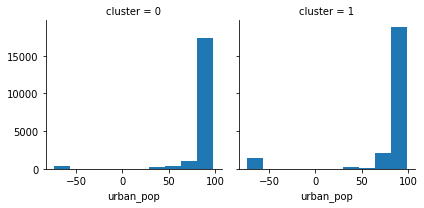

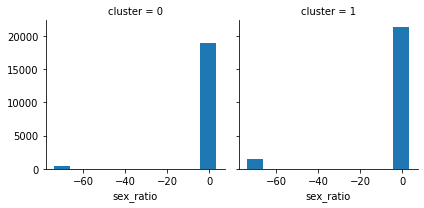

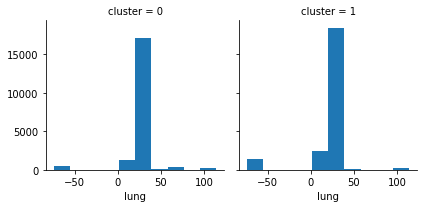

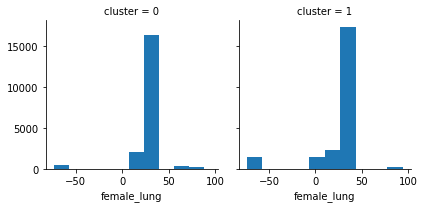

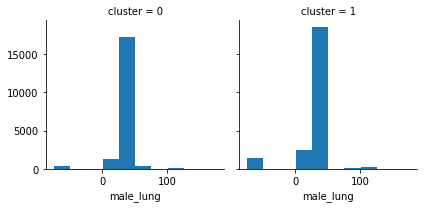

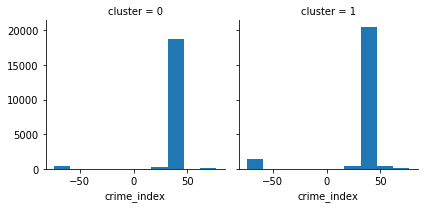

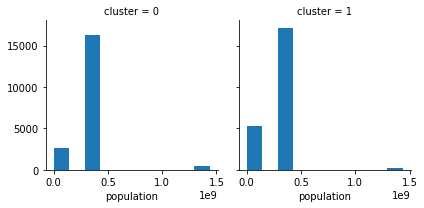

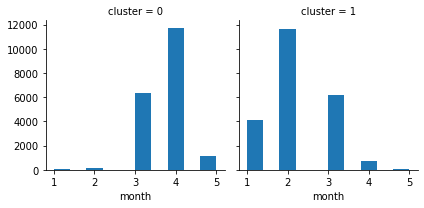

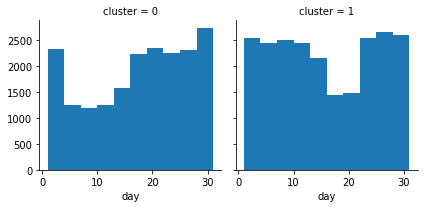

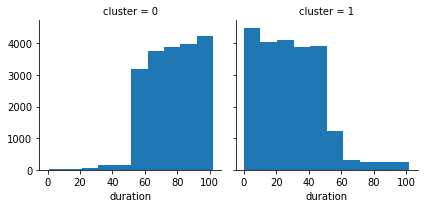

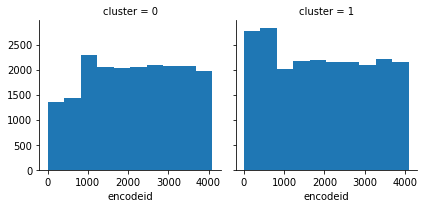

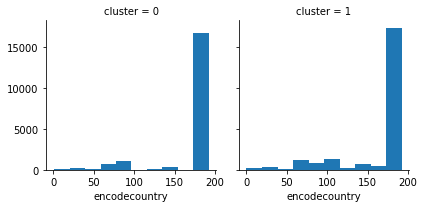

In [152]:
# Clusters Interpretation by using FacetGrid plot:
plt.figure(figsize=(50,25))
for column in df_gmm.drop('cluster',axis=1):
    g = sns.FacetGrid(df_gmm, col='cluster')
    g.map(plt.hist, column)

According to the results:

Cluster 0: This cluster indicates a group with high hospitalized, icu, vent and more restrictions. We can assume that this group is confirmed as they had covid_19. The number of values in this cluster is a bit lower which is good.

Cluster 1: This cluster indicates a group with low hospitalized, icu, vent and less restrictions. We can assume that this group is not confirmed to get covid_19. 

In [121]:
# Calculate the average value of each column in each cluster:
df_kmean.groupby('cluster').mean()

tests  hospitalized       icu      vent  school_closing  \
cluster                                                                  
0        3367.318759     15.819368  2.652295  1.016149        2.993703   
1         768.751011      6.774781  1.846759  0.182610        0.449949   

         workplace_closing  cancel_events  gatherings_restrictions  \
cluster                                                              
0                 2.759902       1.998020                 3.762086   
1                 0.016573       0.272271                 0.131248   

         transport_closing  stay_home_restrictions  ...       lung  \
cluster                                             ...              
0                 0.972476                2.003250  ...  28.530548   
1                 0.001333                0.003688  ...  24.043642   

         female_lung  male_lung  crime_index    population     month  \
cluster                                                                
0          26.240920  31.478997    42.409217  3.169806e+08  3.705007   
1          21.749682  27.180111    38.702889  2.720234e+08  2.150353   

               day   duration     encodeid  encodecountry  
cluster                                                    
0        17.157627  76.975879  2122.381627     166.004977  
1        15.367663  28.426045  1977.723686     160.230595  

[2 rows x 32 columns]

In [153]:
# Calculate the average value of each column in each cluster:
df_gmm.groupby('cluster').mean()

tests  hospitalized       icu     vent  school_closing  \
cluster                                                                 
0        3678.133385     20.192804  3.341866  1.23706        2.993986   
1         529.961089      3.128034  1.265301  0.00233        0.476214   

         workplace_closing  cancel_events  gatherings_restrictions  \
cluster                                                              
0                 2.777744       1.998509                 3.774557   
1                 0.029898       0.289835                 0.158415   

         transport_closing  stay_home_restrictions  ...       lung  \
cluster                                             ...              
0                 0.974505                2.023182  ...  29.423416   
1                 0.009717                0.007474  ...  23.326646   

         female_lung  male_lung  crime_index    population     month  \
cluster                                                                
0          27.129948  32.369851    43.335728  3.213230e+08  3.707376   
1          21.036016  26.462879    37.948981  2.687775e+08  2.164527   

               day   duration     encodeid  encodecountry  
cluster                                                    
0        17.135492  77.027448  2145.405860     166.686199  
1        15.405250  28.887839  1959.536361     159.708055  

[2 rows x 32 columns]

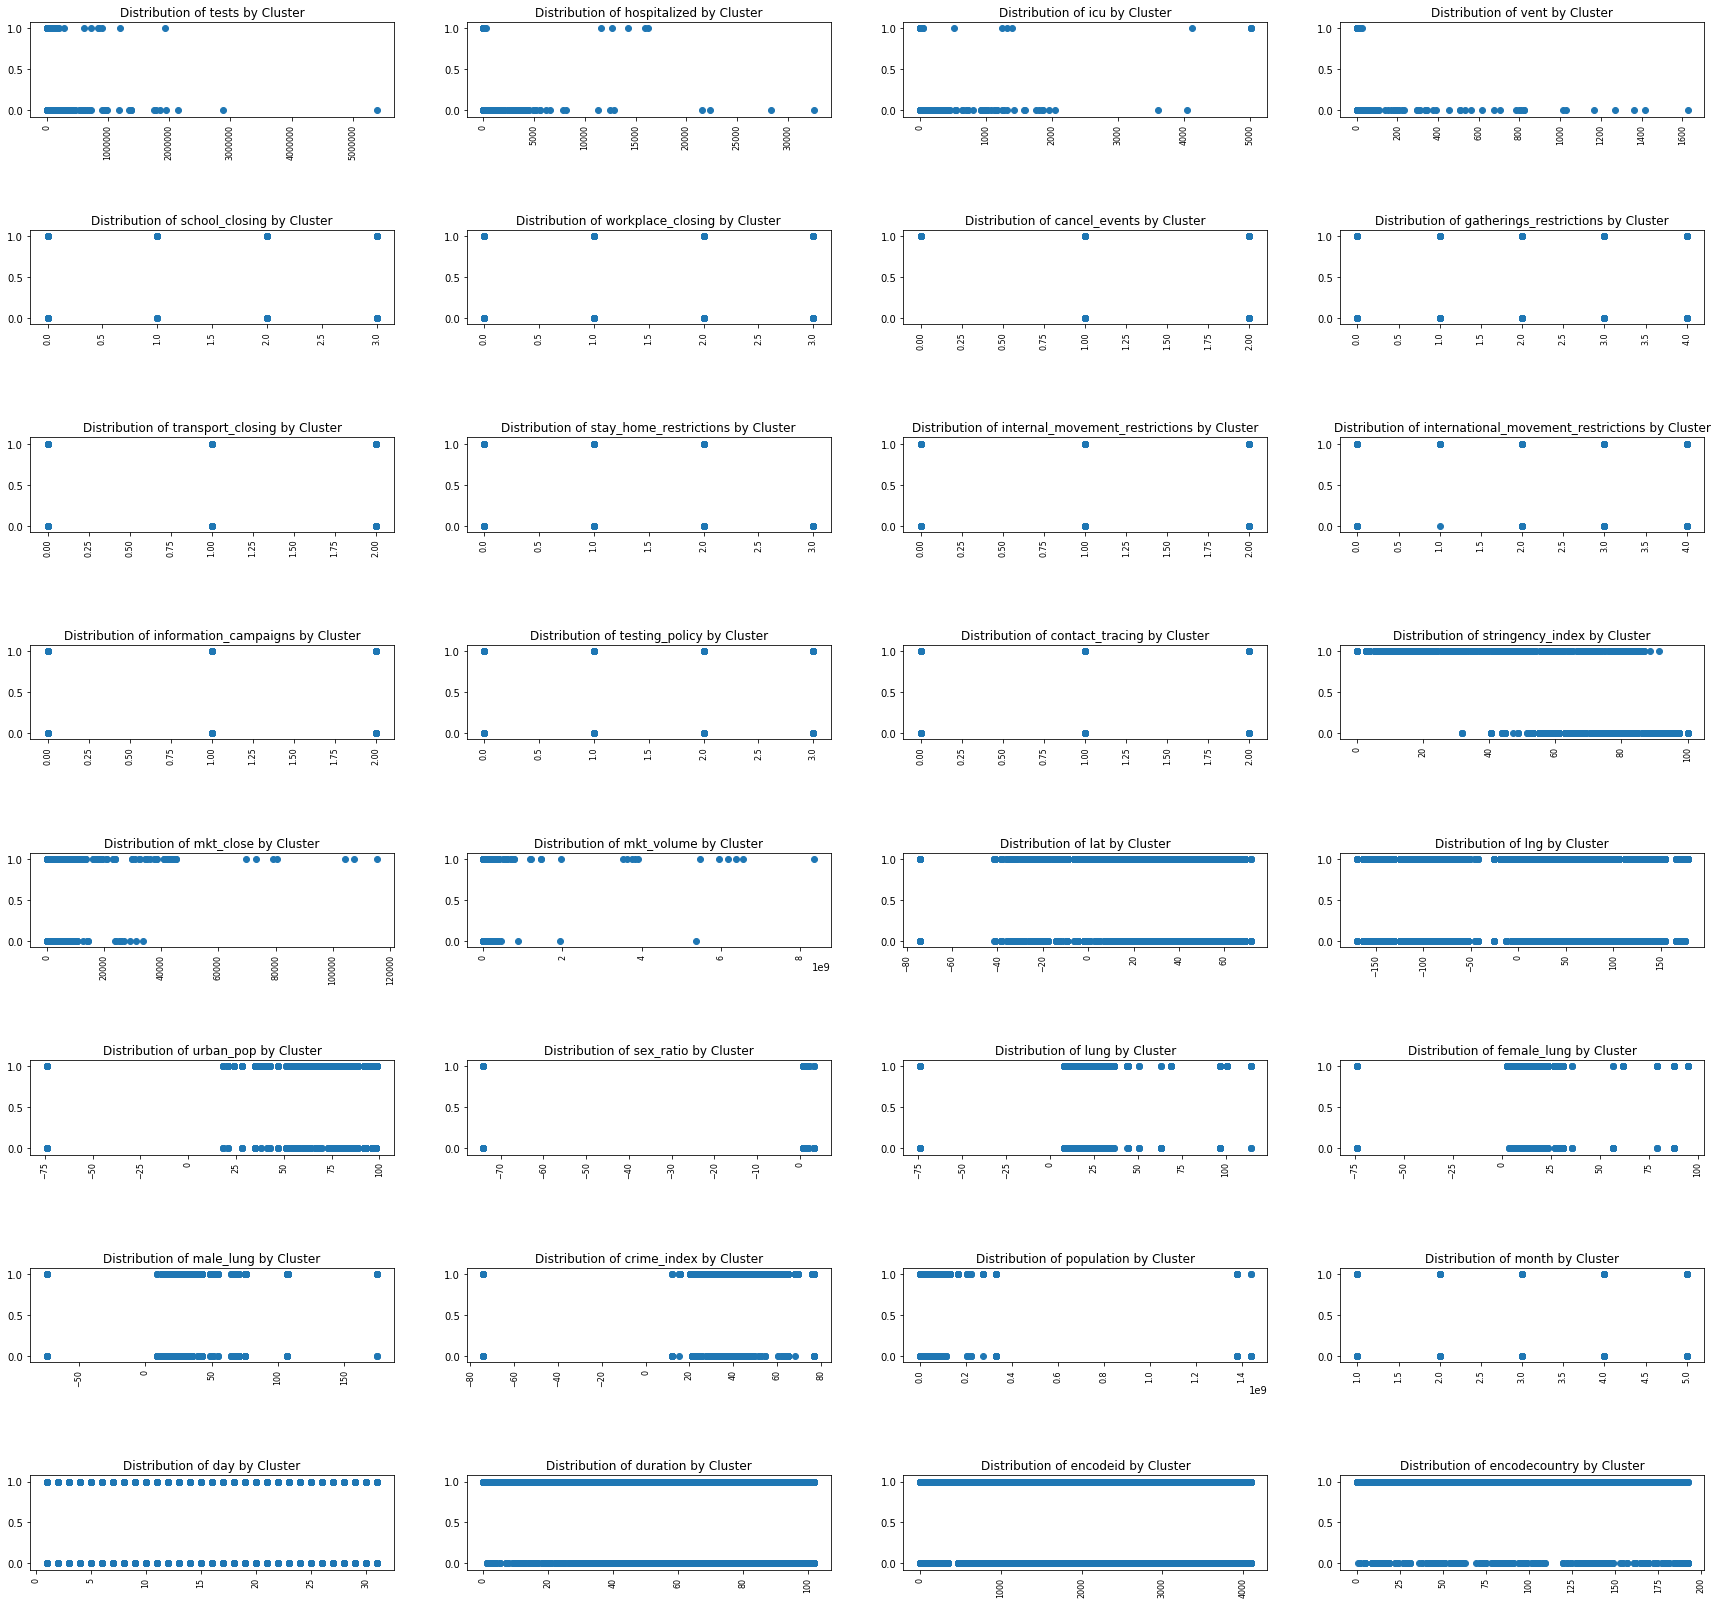

In [155]:
# Bivariate visualization of cluster by columns:

plt.figure(figsize=(30,25))

for i,col in enumerate(df_kmean.drop('cluster',axis=1).columns):
    plt.subplot(9, 4, i+1)
    plt.scatter(x = df_kmean[col], y= df_kmean['cluster'])
    plt.title(f'Distribution of {col} by Cluster')
    plt.xticks(rotation=90, fontsize=8)
plt.subplots_adjust(hspace = 1.2, top = 1.1)
plt.show()

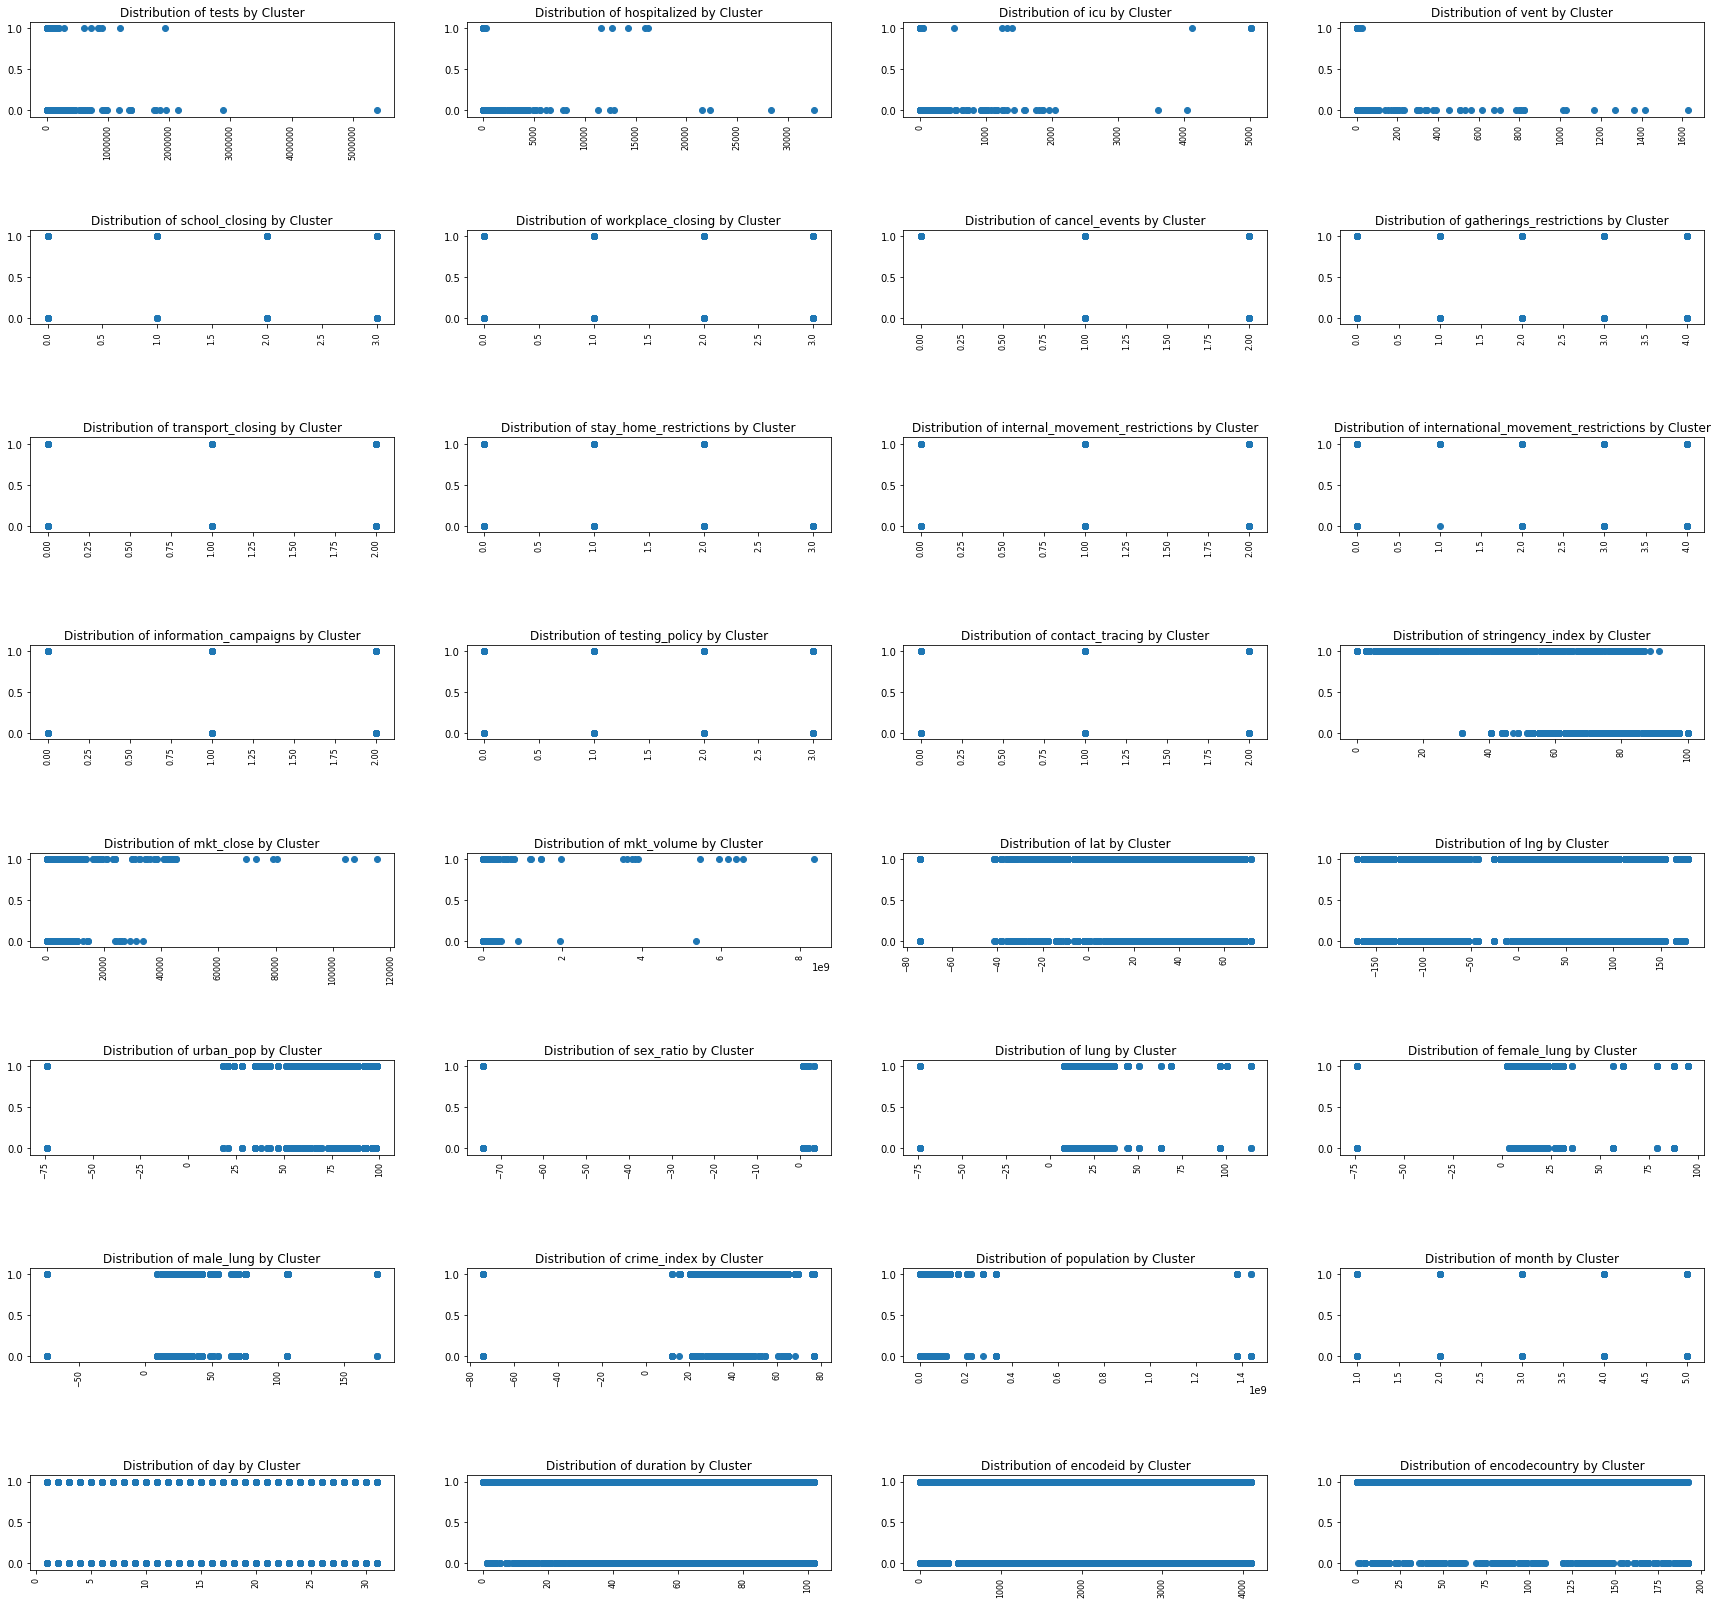

In [156]:
# Bivariate visualization of cluster by columns:

plt.figure(figsize=(30,25))

for i,col in enumerate(df_gmm.drop('cluster',axis=1).columns):
    plt.subplot(9, 4, i+1)
    plt.scatter(x = df_gmm[col], y= df_gmm['cluster'])
    plt.title(f'Distribution of {col} by Cluster')
    plt.xticks(rotation=90, fontsize=8)
plt.subplots_adjust(hspace = 1.2, top = 1.1)
plt.show()

- According to the plot, in both models, the number of values per cluster distribured almost the same without any density in any cluster.
- I think the gmm method in comparison with kmeans seems a bit suitable in terms of time elapsed.

## PYSPARK:

- Using pyspark to apply different machine learning models:

In [17]:
# Import Spark libraries and packages:
import findspark
import pyspark
from pyspark.sql import SQLContext as sc
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression,RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml import Pipeline
from pyspark.sql.functions import isnan, when, count, col
from pyspark.sql import functions as F
import pyspark.ml.clustering
from pyspark.ml.clustering import KMeans, GaussianMixture
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import StandardScaler

In [18]:
# SparkSession used to build DataFrame:
spark = SparkSession.builder.appName("covid").getOrCreate()

In [19]:
# Load dataset:
df_total = spark.read.csv(r'C:\Users\mebra.DESKTOP-L12LJA6\Thinkful Works\PythonThinkful\covid.csv',header=True,inferSchema=True)
dff = spark.read.csv(r'C:\Users\mebra.DESKTOP-L12LJA6\Thinkful Works\PythonThinkful\covid_sample.csv',header=True,inferSchema=True)

In [20]:
# Extract 10% sample dataset:
df_frac = df_total.sample(fraction=0.1)

In [21]:
# Look at the shape of dataset:
dff.toPandas().shape

(42199, 38)

In [22]:
# Look at the dataset:
dff.toPandas().head(5)

id  death  confirmed  tests  recovered  hospitalized  \
0    USA, Florida, Pinellas     12        444      0          0             0   
1  USA, Minnesota, Traverse      0          0      0          0             0   
2            GBR, E08000028      0          0      0          0             0   
3      USA, Georgia, Brooks      0          0      0          0             0   
4        USA, Texas, Zapata      0          1      0          0             0   

   icu  vent  school_closing  workplace_closing  ...  male_lung  crime_index  \
0    0     0               3                  3  ...      34.55        46.73   
1    0     0               3                  3  ...      34.55        46.73   
2    0     0               0                  0  ...      26.84        43.64   
3    0     0               0                  0  ...      34.55        46.73   
4    0     0               3                  3  ...      34.55        46.73   

    population  month  day  duration  encodeid  encodecountry  encodestate  \
0  331002651.0      4   11      80.0      1285            180          400   
1  331002651.0      3   21      59.0      2319            180          415   
2   67886011.0      2   13      22.0       728             61          453   
3  331002651.0      1   29       7.0      1314            180          401   
4  331002651.0      4    6      75.0      3723            180          437   

   encodecity  
0         603  
1        1227  
2          91  
3         625  
4        1952  

[5 rows x 38 columns]

**Preparing dataset:**

In [23]:
# Drop some nonrequired columns:
columns_to_drop = ['id','death','recovered','encodestate','encodecity']
dff = dff.drop(*columns_to_drop)

In [24]:
# Look at the dataset's schema:
dff.printSchema()

root
 |-- confirmed: integer (nullable = true)
 |-- tests: integer (nullable = true)
 |-- hospitalized: integer (nullable = true)
 |-- icu: integer (nullable = true)
 |-- vent: integer (nullable = true)
 |-- school_closing: integer (nullable = true)
 |-- workplace_closing: integer (nullable = true)
 |-- cancel_events: integer (nullable = true)
 |-- gatherings_restrictions: integer (nullable = true)
 |-- transport_closing: integer (nullable = true)
 |-- stay_home_restrictions: integer (nullable = true)
 |-- internal_movement_restrictions: integer (nullable = true)
 |-- international_movement_restrictions: integer (nullable = true)
 |-- information_campaigns: integer (nullable = true)
 |-- testing_policy: integer (nullable = true)
 |-- contact_tracing: integer (nullable = true)
 |-- stringency_index: double (nullable = true)
 |-- mkt_close: double (nullable = true)
 |-- mkt_volume: long (nullable = true)
 |-- lat: double (nullable = true)
 |-- lng: double (nullable = true)
 |-- urban_pop

In [25]:
# Define features columns:
featurescols = dff.drop('confirmed').columns

In [26]:
# Generate feature vector:
dff = VectorAssembler(inputCols=featurescols, outputCol="features").transform(dff)

In [27]:
# Generate a labelIndexer
dff = StringIndexer(inputCol="confirmed", outputCol="label").fit(dff).transform(dff)

In [28]:
# Scaled features:
scaler = StandardScaler(inputCol= 'features', outputCol="scaledfeatures",withStd=True,withMean=False)
scalerModel = scaler.fit(dff)
dff = scalerModel.transform(dff)

In [26]:
# Split dataset:
traindata, testdata = dff.randomSplit([0.7,0.3])

## Applying models:

### 1. Supervised models:

- Logistic Regression
- Random Forest

#### 1.1. Logistic Regression:

In [170]:
# Applying logistic regression:
lr = LogisticRegression(maxIter=7, regParam=0.3)

In [171]:
# fit the logistic regression model:
lr_model = lr.fit(traindata)
training_summary = lr_model.summary
lr_predict_train = lr_model.transform(traindata)
# training_summary.predictions.show()

In [172]:
# Predict the model:
lr_predict_test = lr_model.transform(testdata)
lr_predict_test.select('features','label', 'prediction').show()

+--------------------+-----+----------+
|            features|label|prediction|
+--------------------+-----+----------+
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
+--------------------+-----+----------+
only showing top 20 rows



In [209]:
# Evaluating model performance with accuracy and f1 score:

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
lr_accuracy_train_spark = evaluator.evaluate(lr_predict_train)
print(f"LR Predict Trainset Error = {(1.0 - lr_accuracy_train_spark)}")
print(f"LR Predict Trainset Accuracy = {lr_accuracy_train_spark}")

lr_accuracy_test_spark = evaluator.evaluate(lr_predict_test)
print(f"LR Predict Testset Error = {(1.0 - lr_accuracy_test_spark)}")
print(f"LR Predict Testset Accuracy = {lr_accuracy_test_spark}")

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
lr_f1_accuracy_spark = evaluator.evaluate(lr_predict_test)
print(f"LR Predict Testset F1 Error = {(1.0 - lr_f1_accuracy_spark)}")
print(f"LR predict Testset F1 Score = {lr_f1_accuracy_spark}")

LR Predict Trainset Error = 0.37698546806353495
LR Predict Trainset Accuracy = 0.623014531936465
LR Predict Testset Error = 0.38424934570544844
LR Predict Testset Accuracy = 0.6157506542945516
LR Predict Testset F1 Error = 0.5246952831690705
LR predict Testset F1 Score = 0.4753047168309294


#### 1.2. Random Forest:

In [177]:
# Define random forest:
rfc = RandomForestClassifier(maxDepth=4, numTrees=7)
rfc_model = rfc.fit(traindata)
rfc_predict_train=rfc_model.transform(traindata)

In [178]:
# Predict the model:
rfc_predict_test=rfc_model.transform(testdata)
rfc_predict_test.select('features','label', 'prediction').show()

+--------------------+-----+----------+
|            features|label|prediction|
+--------------------+-----+----------+
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
|(32,[18,19,20,21,...|  0.0|       0.0|
+--------------------+-----+----------+
only showing top 20 rows



In [226]:
# Finding feature importance:
rfc_model.featureImportances

SparseVector(32, {0: 0.1368, 1: 0.0001, 3: 0.0001, 4: 0.0023, 5: 0.0647, 7: 0.2471, 11: 0.006, 12: 0.0531, 13: 0.0774, 14: 0.0023, 15: 0.1241, 17: 0.0014, 18: 0.0005, 19: 0.0065, 20: 0.0001, 21: 0.0041, 22: 0.0048, 24: 0.001, 25: 0.0083, 26: 0.0053, 27: 0.1136, 29: 0.1268, 30: 0.0062, 31: 0.0074})

In [197]:
# Evaluating model performance with accuracy and f1 score:

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
rfc_accuracy_train_spark = evaluator.evaluate(rfc_predict_train)
print(f"RFC Predict Trainset Error = {(1.0 - rfc_accuracy_train_spark)}")
print(f"RFC Predict Trainset Accuracy = {rfc_accuracy_train_spark}")

rfc_accuracy_test_spark = evaluator.evaluate(rfc_predict_test)
print(f"RFC Predict Testset Error = {(1.0 - rfc_accuracy_test_spark)}")
print(f"RFC Predict Testset Accuracy = {rfc_accuracy_test_spark}")

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
rfc_f1_accuracy_spark = evaluator.evaluate(rfc_predict_test)
print(f"RFC Predict Testset F1 Error = {(1.0 - rfc_f1_accuracy_spark)}")
print(f"RFC predict Testset F1 Score = {rfc_f1_accuracy_spark}")

RFC Predict Trainset Error = 0.3768164920581277
RFC Predict Trainset Accuracy = 0.6231835079418723
RFC Predict Testset Error = 0.38393211198350385
RFC Predict Testset Accuracy = 0.6160678880164961
RFC Predict Testset F1 Error = 0.5302693998712071
RFC predict Testset F1 Score = 0.4697306001287929


### Using Pipeline:

In [29]:
# Defining LabelIndexer and VectorIndexer for pipeline:
labelIndexer = StringIndexer(inputCol="confirmed", outputCol="indexedLabel").fit(dff)

# now generate the indexed feature vector
featureIndexer = VectorIndexer(inputCol="scaledfeatures", outputCol="indexedFeatures", maxCategories=4).fit(dff)   


In [182]:
# Split Dara
train, test = dff.randomSplit([0.7, 0.3])

#### 1.1.1. Logistic Regression with PipeLine:

In [183]:
# Define the logistic regression:
lr = LogisticRegression(labelCol="indexedLabel", featuresCol="indexedFeatures")

In [184]:
# Chain indexer and featureIndexer in a Pipeline
pipeline_lr = Pipeline(stages=[labelIndexer, featureIndexer, lr])

# Train model.  This also runs the indexers.
lr_model_pipe = pipeline_lr.fit(train)

lr_pipeline_predict_train = lr_model_pipe.transform(train)

In [185]:
# Make predictions:
lr_pipeline_predict_test = lr_model_pipe.transform(test)
lr_pipeline_predict_test.select('indexedFeatures','indexedLabel','prediction').show()

+--------------------+------------+----------+
|     indexedFeatures|indexedLabel|prediction|
+--------------------+------------+----------+
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,2

In [198]:
# Evaluate performance of the model by accuracy and f1:

evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
lr_pipeline_accuracy_train_spark = evaluator.evaluate(lr_pipeline_predict_train)
print(f"LR Pipline Predict Trainset Error = {(1.0 - lr_pipeline_accuracy_train_spark)}")
print(f"LR Pipeline Predict Trainset Accuracy = {lr_pipeline_accuracy_train_spark}")

lr_pipeline_accuracy_test_spark = evaluator.evaluate(lr_pipeline_predict_test)
print(f"LR Pipline Predict Testset Error = {(1.0 - lr_pipeline_accuracy_test_spark)}")
print(f"LR Pipeline Predict Testset Accuracy = {lr_pipeline_accuracy_test_spark}")

evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="f1")
lr_pipeline_f1_accuracy_spark = evaluator.evaluate(lr_pipeline_predict_test)
print(f"LR Pipeline Predict Testset F1 Error = {(1.0 - lr_pipeline_f1_accuracy_spark)}")
print(f"LR Pipeline Predict Testset F1 Score = {lr_pipeline_f1_accuracy_spark}")

LR Pipline Predict Trainset Error = 0.38093618179344124
LR Pipeline Predict Trainset Accuracy = 0.6190638182065588
LR Pipline Predict Testset Error = 0.37655237053815516
LR Pipeline Predict Testset Accuracy = 0.6234476294618448
LR Pipeline Predict Testset F1 Error = 0.4869720537909765
LR Pipeline Predict Testset F1 Score = 0.5130279462090235


#### 1.2.1. Random Forest with PipeLine:

In [187]:
# Define Random Forest:
rfc = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", maxDepth=4, numTrees=7)

In [188]:
# Chain indexer and featureIndexer in a Pipeline
pipeline_rfc = Pipeline(stages=[labelIndexer, featureIndexer, rfc])

# Train model.  This also runs the indexers.
rfc_model_pipe = pipeline_rfc.fit(train)

rfc_pipeline_predict_train = rfc_model_pipe.transform(train)

In [189]:
# Make predictions.
rfc_pipeline_predict_test = rfc_model_pipe.transform(test)
rfc_pipeline_predict_test.select('indexedFeatures','indexedLabel','prediction').show()

+--------------------+------------+----------+
|     indexedFeatures|indexedLabel|prediction|
+--------------------+------------+----------+
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,2

In [199]:
# Evaluate performance of the model by accuracy and f1:

evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
rfc_pipeline_accuracy_train_spark = evaluator.evaluate(rfc_pipeline_predict_train)
print(f"RFC Pipline Predict Trainset Error = {(1.0 - rfc_pipeline_accuracy_train_spark)}")
print(f"RFC Pipeline Predict Trainset Accuracy = {rfc_pipeline_accuracy_train_spark}")

rfc_pipeline_accuracy_test_spark = evaluator.evaluate(rfc_pipeline_predict_test)
print(f"RFC Pipline Predict Testset Error = {(1.0 - rfc_pipeline_accuracy_test_spark)}")
print(f"RFC Pipeline Predict Testset Accuracy = {rfc_pipeline_accuracy_test_spark}")

evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="f1")
rfc_pipeline_f1_accuracy_spark = evaluator.evaluate(rfc_pipeline_predict_test)
print(f"RFC Pipeline Predict F1 Error = {(1.0 - rfc_pipeline_f1_accuracy_spark)}")
print(f"RFC Pipeline Predict F1 Score = {rfc_pipeline_f1_accuracy_spark}")

RFC Pipline Predict Trainset Error = 0.38100421826098785
RFC Pipeline Predict Trainset Accuracy = 0.6189957817390122
RFC Pipline Predict Testset Error = 0.3742091697258455
RFC Pipeline Predict Testset Accuracy = 0.6257908302741545
RFC Pipeline Predict F1 Error = 0.5182246437824036
RFC Pipeline Predict F1 Score = 0.48177535621759643


### Optimized Models:

#### 1.1.2. Optimized Logistic Regression with PipeLine:

In [191]:
# define Parameters:
lr = LogisticRegression()
lr_paramGrid = ParamGridBuilder() \
              .addGrid(lr.maxIter, [7,10]) \
              .addGrid(lr.regParam, [0.01,0.1]) \
              .build()

In [194]:
# Define Optimized logistic regression with pipeline by cross validator and accuracy metric:

evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
crossval_lr = CrossValidator(estimator=pipeline_lr, estimatorParamMaps=lr_paramGrid, evaluator=evaluator, numFolds=2) 

# Fit the model:
lr_crossval = crossval_lr.fit(train)                  

lr_crossval_predict_train = lr_crossval.transform(train)

In [193]:
# Predict the model:
lr_crossval_predict_test = lr_crossval.transform(test)
lr_crossval_predict_test.select('features','indexedLabel','prediction').show()

+--------------------+------------+----------+
|            features|indexedLabel|prediction|
+--------------------+------------+----------+
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,2

In [195]:
# Define Optimized logistic regression with pipeline by cross validator and f1 metric:

evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="f1")
crossval_lr_f1 = CrossValidator(estimator=pipeline_lr, estimatorParamMaps=lr_paramGrid, evaluator=evaluator, numFolds=2) 
lr_crossval_f1 = crossval_lr_f1.fit(train) 



In [200]:
# Predict the model:
lr_crossval_predict_test_f1 = lr_crossval_f1.transform(test)
lr_crossval_predict_test_f1.select('features','indexedLabel','prediction').show()

+--------------------+------------+----------+
|            features|indexedLabel|prediction|
+--------------------+------------+----------+
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,2

In [201]:
# Evaluate performance of the model by accuracy and f1:
 
lr_crossval_accuracy_train_spark = evaluator.evaluate(lr_crossval_predict_train)
print(f"LR Crossvalidation Predict Trainset Error = {(1.0 - lr_crossval_accuracy_train_spark)}")
print(f"LR Crossvalidation Predict Trainset Accuracy = {lr_crossval_accuracy_train_spark}")

lr_crossval_accuracy_test_spark = evaluator.evaluate(lr_crossval_predict_test)
print(f"LR Crossvalidation Predict Testset Error = {(1.0 - lr_crossval_accuracy_test_spark)}")
print(f"LR Crossvalidation Predict Testset Accuracy = {lr_crossval_accuracy_test_spark}")

lr_crossval_f1_accuracy_spark = evaluator.evaluate(lr_crossval_predict_test_f1)
print(f"LR Crossvalidation Predict F1 Error = {(1.0 - lr_crossval_f1_accuracy_spark)}")
print(f"LR Crossvalidation Predict F1 Score = {lr_crossval_f1_accuracy_spark}")

LR Crossvalidation Predict Trainset Error = 0.49199934769633336
LR Crossvalidation Predict Trainset Accuracy = 0.5080006523036666
LR Crossvalidation Predict Testset Error = 0.4869720537909765
LR Crossvalidation Predict Testset Accuracy = 0.5130279462090235
LR Crossvalidation Predict F1 Error = 0.4869720537909765
LR Crossvalidation Predict F1 Score = 0.5130279462090235


#### 1.2.2. Optimized Random Forest with PipeLine:

In [202]:
# Define Parameters:

rfc = RandomForestClassifier()
rfc_paramGrid = ParamGridBuilder() \
                .addGrid(rfc.maxBins, [20,30]) \
                .addGrid(rfc.maxDepth, [4,6]) \
                .addGrid(rfc.impurity, ["entropy", "gini"]) \
                .build()


In [203]:
# Define Optimized random forest with pipeline by cross validator and accuracy metric:

evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
crossval_rfc = CrossValidator(estimator=pipeline_rfc, estimatorParamMaps=rfc_paramGrid, evaluator=evaluator, numFolds=2)

rfc_crossval = crossval_rfc.fit(train) 
rfc_crossval_predict_train = rfc_crossval.transform(train)


In [204]:
# Predict the model:
rfc_crossval_predict_test = rfc_crossval.transform(test)
rfc_crossval_predict_test.select('features','indexedLabel','prediction').show()

+--------------------+------------+----------+
|            features|indexedLabel|prediction|
+--------------------+------------+----------+
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,2

In [205]:
# Define Optimized random forest with pipeline by cross validator and f1 metric:

evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="f1")
crossval_rfc_f1 = CrossValidator(estimator=pipeline_rfc, estimatorParamMaps=rfc_paramGrid, evaluator=evaluator, numFolds=2)

rfc_crossval_f1 = crossval_rfc_f1.fit(train)  

In [206]:
# Predict the model:                          
rfc_crossval_predict_test_f1 = rfc_crossval_f1.transform(test)
rfc_crossval_predict_test_f1.select('features','indexedLabel','prediction').show()

+--------------------+------------+----------+
|            features|indexedLabel|prediction|
+--------------------+------------+----------+
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,20,21,...|         0.0|       0.0|
|(32,[18,19,2

In [211]:
# Evaluate performance of the model by accuracy and f1:

evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
rfc_crossval_accuracy_train_spark = evaluator.evaluate(rfc_crossval_predict_train)
print(f"RFC Crossvalidation Predict Trainset Error = {(1.0 - rfc_crossval_accuracy_train_spark)}")
print(f"RFC Crossvalidation Predict Trainset Accuracy = {rfc_crossval_accuracy_train_spark}")

rfc_crossval_accuracy_test_spark = evaluator.evaluate(rfc_crossval_predict_test)
print(f"RFC Crossvalidation Predict Testset Error = {(1.0 - rfc_crossval_accuracy_test_spark)}")
print(f"RFC Crossvalidation Predict Testset Accuracy = {rfc_crossval_accuracy_test_spark}")

evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="f1")
rfc_crossval_f1_accuracy_spark = evaluator.evaluate(rfc_crossval_predict_test_f1)
print(f"RFC Crossvalidation Predict Error = {(1.0 - rfc_crossval_f1_accuracy_spark)}")
print(f"RFC Crossvalidation Predict f1 Score = {rfc_crossval_f1_accuracy_spark}")

RFC Crossvalidation Predict Trainset Error = 0.38100421826098785
RFC Crossvalidation Predict Trainset Accuracy = 0.6189957817390122
RFC Crossvalidation Predict Testset Error = 0.3742091697258455
RFC Crossvalidation Predict Testset Accuracy = 0.6257908302741545
RFC Crossvalidation Predict Error = 0.5182246437824036
RFC Crossvalidation Predict f1 Score = 0.48177535621759643


In [213]:
# Accuracy models results with pyspark:
accuracy_dataset={'models':['Logistic Regression_spark', 'Random Forest Classifier_spark', 'Logistic Regression Pipeline_spark', 'Random Forest Classifier Pipeline_spark','Logistic Regression Pipeline Optimized_spark','Random Forest Classifier Pipeline Optimized_spark'], 
                    'Accuracy Score_train':[lr_accuracy_train_spark, rfc_accuracy_train_spark, lr_pipeline_accuracy_train_spark, rfc_pipeline_accuracy_train_spark, lr_crossval_accuracy_train_spark, rfc_crossval_accuracy_train_spark],                    
                    'Accuracy Score_test':[lr_accuracy_test_spark, rfc_accuracy_test_spark, lr_pipeline_accuracy_test_spark, rfc_pipeline_accuracy_test_spark, lr_crossval_accuracy_test_spark, rfc_crossval_accuracy_test_spark],
                    'F1 Score_test':[lr_f1_accuracy_spark, rfc_f1_accuracy_spark, lr_pipeline_f1_accuracy_spark, rfc_pipeline_f1_accuracy_spark, lr_crossval_f1_accuracy_spark, rfc_crossval_f1_accuracy_spark]}

accuracy_dataset = pd.DataFrame(accuracy_dataset)
ddf = spark.createDataFrame(accuracy_dataset)
ddf.show()


+--------------------+--------------------+-------------------+-------------------+
|              models|Accuracy Score_train|Accuracy Score_test|      F1 Score_test|
+--------------------+--------------------+-------------------+-------------------+
|Logistic Regressi...|   0.623014531936465| 0.6157506542945516| 0.4753047168309294|
|Random Forest Cla...|  0.6231835079418723| 0.6160678880164961| 0.4697306001287929|
|Logistic Regressi...|  0.6190638182065588| 0.6234476294618448| 0.5130279462090235|
|Random Forest Cla...|  0.6189957817390122| 0.6257908302741545|0.48177535621759643|
|Logistic Regressi...|  0.5080006523036666| 0.5130279462090235| 0.5130279462090235|
|Random Forest Cla...|  0.6189957817390122| 0.6257908302741545|0.48177535621759643|
+--------------------+--------------------+-------------------+-------------------+



- Logistic Regression and Random Forest Classifier with and without pipeline have almost same in accuracy score, but Logistic Regression is abit higher in f1 score. So, Logistic Regression choose as a best model.
- By applying Pipeline we have to get same result as without using pipeline which is almost got same results.
- By using cross validator to optimize the model, does not seem to improve the models.


## 2. UnSupervised Models:

- KMeans Clustering
- Clustering with Gaussian Mixture Models (GMM)

In [30]:
# Drop label column:
columns_to_drop = ['confirmed','label']

dff = dff.drop(*columns_to_drop)

#### 2.1. KMeans Clustering:

In [31]:
# Define Kmeans model and fit:
kmeans = KMeans().setK(2).setSeed(1)
k_model = kmeans.fit(dff)


In [32]:
# Predict the model:
predictions =k_model.transform(dff)
predictions.select('scaledFeatures','prediction').show()

+--------------------+----------+
|      scaledFeatures|prediction|
+--------------------+----------+
|[0.0,0.0,0.0,0.0,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|(32,[18,19,20,21,...|         0|
|(32,[14,18,19,20,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|(32,[18,19,20,21,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|(32,[6,11,13,14,1...|         0|
|(32,[11,14,15,18,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|(32,[6,11,13,14,1...|         0|
|(32,[18,19,20,21,...|         0|
|(32,[11,14,15,18,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|(32,[4,6,11,13,14...|         0|
|(32,[4,6,11,13,14...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
+--------------------+----------+
only showing top 20 rows



In [33]:
# Shows the result.
print("Cluster Centers: ")
centers = k_model.clusterCenters()
for center in centers:
    print(center)

Cluster Centers: 
[ 1.97818374e+03  1.11870720e+01  2.26140419e+00  5.81541132e-01
  1.62964124e+00  1.28876941e+00  1.07223455e+00  1.80993828e+00
  4.44594464e-01  9.29429067e-01  9.05318739e-01  2.17067702e+00
  9.62484328e-01  1.54735269e+00  9.24221236e-01  3.65845810e+01
  7.64332568e+01  2.44303052e+06  2.79542010e+01 -7.72753387e+01
  7.46238672e+01 -2.47240310e+00  2.51791832e+01  2.29893694e+01
  2.81280443e+01  4.04447708e+01  2.73570769e+08  2.87600058e+00
  1.62097599e+01  5.10933311e+01  2.07595036e+03  1.63467282e+02]
[2.16372199e+03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.05809129e+00 1.75380360e+00 1.38450899e+00 2.72199170e+00
 1.02351314e+00 1.35822960e+00 1.18118949e+00 1.73443983e+00
 1.01244813e+00 1.49930844e+00 1.44398340e+00 4.88332365e+01
 6.10304055e+02 2.47856155e+02 2.78966076e+01 9.54847455e+01
 4.71549101e+01 1.07065007e+00 8.11092669e+01 7.29587828e+01
 8.98871508e+01 3.97246196e+01 1.40773600e+09 2.86583679e+00
 1.58118949e+01 5.04107884e+01 2.8

In [34]:
# Evaluate clustering by computing Silhouette score:
evaluator = ClusteringEvaluator()

kmeans_silhouette = evaluator.evaluate(predictions)
print("Silhouette = " + str(kmeans_silhouette))

Silhouette = 0.9731163123501494


#### 2.1.1. KMeans with PipeLine:

In [35]:
# Define Kmeans with pipeline:
kmeans = KMeans()
pipeline_kmeans = Pipeline(stages=[featureIndexer, kmeans])

# Train model.  This also runs the indexers.
kmeans_model_pipe = pipeline_kmeans.fit(dff)


In [36]:
# Make predictions.
kmeans_pipeline_predict = kmeans_model_pipe.transform(dff)
kmeans_pipeline_predict.select('indexedFeatures','prediction').show()

+--------------------+----------+
|     indexedFeatures|prediction|
+--------------------+----------+
|[0.0,0.0,0.0,0.0,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|(32,[18,19,20,21,...|         0|
|(32,[14,18,19,20,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|(32,[18,19,20,21,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|(32,[6,11,13,14,1...|         0|
|(32,[11,14,15,18,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|(32,[6,11,13,14,1...|         0|
|(32,[18,19,20,21,...|         0|
|(32,[11,14,15,18,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|(32,[4,6,11,13,14...|         0|
|(32,[4,6,11,13,14...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
+--------------------+----------+
only showing top 20 rows



In [37]:
# Evaluate clustering by computing Silhouette score:
evaluator = ClusteringEvaluator()

kmeans_pipeline_silhouette = evaluator.evaluate(kmeans_pipeline_predict)
print("Silhouette = " + str(kmeans_pipeline_silhouette))

Silhouette = 0.9731163123501494


#### 2.1.2. Optimized Kmeans With PipeLine:

In [40]:
# Define Parameters:
kmeans = KMeans()
kmeans_paramGrid = ParamGridBuilder() \
                   .addGrid(kmeans.k, [2,4,8,10,14]) \
                   .build()

In [41]:
# Define Optimized  Kmeans with pipeline by cross validator:

crossval_kmeans = CrossValidator(estimator=kmeans, estimatorParamMaps=kmeans_paramGrid, evaluator=evaluator, numFolds=5)

kmeans_crossval = crossval_kmeans.fit(dff)  

kmeans_crossval_predict = kmeans_crossval.transform(dff)

kmeans_pipeline_predict.select('scaledFeatures','prediction').show()

+--------------------+----------+
|      scaledFeatures|prediction|
+--------------------+----------+
|[0.0,0.0,0.0,0.0,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|(32,[18,19,20,21,...|         0|
|(32,[14,18,19,20,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|(32,[18,19,20,21,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|(32,[6,11,13,14,1...|         0|
|(32,[11,14,15,18,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|(32,[6,11,13,14,1...|         0|
|(32,[18,19,20,21,...|         0|
|(32,[11,14,15,18,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|(32,[4,6,11,13,14...|         0|
|(32,[4,6,11,13,14...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
+--------------------+----------+
only showing top 20 rows



In [42]:

crossval_kmeans = CrossValidator(estimator=kmeans, estimatorParamMaps=kmeans_paramGrid, evaluator=evaluator, numFolds=5)

kmeans_crossval = crossval_kmeans.fit(dff)  

kmeans_crossval_predict = kmeans_crossval.transform(dff)

kmeans_pipeline_predict.select('scaledFeatures','prediction').show()

+--------------------+----------+
|      scaledFeatures|prediction|
+--------------------+----------+
|[0.0,0.0,0.0,0.0,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|(32,[18,19,20,21,...|         0|
|(32,[14,18,19,20,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|(32,[18,19,20,21,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|(32,[6,11,13,14,1...|         0|
|(32,[11,14,15,18,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|(32,[6,11,13,14,1...|         0|
|(32,[18,19,20,21,...|         0|
|(32,[11,14,15,18,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|(32,[4,6,11,13,14...|         0|
|(32,[4,6,11,13,14...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
+--------------------+----------+
only showing top 20 rows



In [43]:
# Evaluate clustering by computing Silhouette score:

silhouette_kmeans_crossval_predict = evaluator.evaluate(kmeans_crossval_predict)

print(f"silhouette kmeans Crossvalidation Predict = {(silhouette_kmeans_crossval_predict)}")


silhouette kmeans Crossvalidation Predict = 0.9873458996142936


#### 2.2. GMM Clustering:

In [71]:
# Define Gmm Model:
gmm = GaussianMixture().setK(2)
gmm_model = gmm.fit(dff)

gmm_predict = gmm_model.transform(dff)
gmm_predict.select('scaledFeatures','prediction').show()

+--------------------+----------+
|      scaledFeatures|prediction|
+--------------------+----------+
|[0.0,0.0,0.0,0.0,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|(32,[18,19,20,21,...|         0|
|(32,[14,18,19,20,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|(32,[18,19,20,21,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|(32,[6,11,13,14,1...|         0|
|(32,[11,14,15,18,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|(32,[6,11,13,14,1...|         0|
|(32,[18,19,20,21,...|         0|
|(32,[11,14,15,18,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|(32,[4,6,11,13,14...|         0|
|(32,[4,6,11,13,14...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
|[0.0,0.0,0.0,0.0,...|         0|
+--------------------+----------+
only showing top 20 rows



## Conclusion:

### Supervised Results:

In [52]:
# Compare all supervised learning methods:
accuracy_models_results = pd.DataFrame({'models_methods':['Logistic Regression', 'Random Forest Classifier', 'SVC','PCA Logistic Regression', 'PCA Random Forest Classifier', 'PCA SVC','Optimized Logistic Regression', 'Optimized Random Forest Classifier', 'Optimized SVC', 'Logistic Regression_spark', 'Random Forest Classifier_spark', 'Logistic Regression Pipeline_spark', 'Random Forest Classifier Pipeline_spark','Logistic Regression Pipeline Optimized_spark','Random Forest Classifier Pipeline Optimized_spark'],
                                       'Accuracy Score_train':[lr_accuracy_train, rfc_accuracy_train, svc_accuracy_train,lr_pca_accuracy_train, rfc_pca_accuracy_train, svc_pca_accuracy_train,lr_optimize_accuracy_train, rfc_optimize_accuracy_train, svc_optimize_accuracy_train,lr_accuracy_train_spark, rfc_accuracy_train_spark, lr_pipeline_accuracy_train_spark, rfc_pipeline_accuracy_train_spark, lr_crossval_accuracy_train_spark, rfc_crossval_accuracy_train_spark],
                                       'Accuracy Score_test':[lr_accuracy_test, rfc_accuracy_test, svc_accuracy_test,lr_pca_accuracy_test, rfc_pca_accuracy_test, svc_pca_accuracy_test,lr_optimize_accuracy_test, rfc_optimize_accuracy_test, svc_optimize_accuracy_test,lr_accuracy_test_spark, rfc_accuracy_test_spark, lr_pipeline_accuracy_test_spark, rfc_pipeline_accuracy_test_spark, lr_crossval_accuracy_test_spark, rfc_crossval_accuracy_test_spark],
                                       'f1 Score_test':[lr_f1_test, rfc_f1_test, svc_f1_test,lr_pca_f1_test, rfc_pca_f1_test, svc_pca_f1_test,lr_optimize_f1_test, rfc_optimize_f1_test, svc_optimize_f1_test,lr_f1_accuracy_spark, rfc_f1_accuracy_spark, lr_pipeline_f1_accuracy_spark, rfc_pipeline_f1_accuracy_spark, lr_crossval_f1_accuracy_spark, rfc_crossval_accuracy_spark]})






models_methods  Accuracy Score_train  \
0                                 Logistic Regression              0.625478   
1                            Random Forest Classifier              0.987068   
2                                                 SVC              0.627239   
3                             PCA Logistic Regression              0.452927   
4                        PCA Random Forest Classifier              0.966350   
5                                             PCA SVC              0.453705   
6                       Optimized Logistic Regression              0.627983   
7                  Optimized Random Forest Classifier              0.634889   
8                                       Optimized SVC              0.643759   
9                           Logistic Regression_spark              0.623015   
10                     Random Forest Classifier_spark              0.623184   
11                 Logistic Regression Pipeline_spark              0.619064   
12            Random Forest Classifier Pipeline_spark              0.618996   
13       Logistic Regression Pipeline Optimized_spark              0.508001   
14  Random Forest Classifier Pipeline Optimized_spark              0.618996   

    Accuracy Score_test  f1 Score_tes  
0              0.622038      0.504961  
1              0.617457      0.595172  
2              0.624329      0.492639  
3              0.458689      0.288522  
4              0.361690      0.267289  
5              0.458768      0.288556  
6              0.621959      0.504249  
7              0.625908      0.496866  
8              0.624803      0.505302  
9              0.615751      0.475305  
10             0.616068      0.469731  
11             0.623448      0.513028  
12             0.625791      0.481775  
13             0.513028      0.513028  
14             0.625791      0.481775

- According to the summary result, we got the best results after applying randomized search as follow:

    - All results have almost the same cross validation score in train and test set, which means fitting models are same.
    - All results have almost the same accuracy for train and test set. So, all models don't have overfitting.
    - The accuracy score of Optimized Random Forest model in test set is the highest .
    - The f1 score of Optimized SVC model in test set is the highest, So I choose This model as the best one.
    - By applying Spark, we got almost same result.

### UnSupervised REsults:

In [64]:
# Comparing results of methods:
silhouette_scores_methods = [['KMeans', kmeans_optimized_score, kmeans_optimized_time],
                                ['Agglomerative',agg_optimized_score, agg_optimized_time],
                                ['DBSCAN', dbscan_optimized_score, dbscan_optimized_time],
                                ['GMM', gmm_optimized_score, gmm_optimized_time],
                                ['Kmeans',kmeans_silhouette],
                                ['Kmeans_pipeline',kmeans_pipeline_silhouette],
                                ['kmeans_Optimized',silhouette_kmeans_crossval_predict]]

silhouette_scores_methods  = pd.DataFrame(silhouette_scores_methods, columns=['Clustering Method', 'Silhouette Score', 'Time Elapsed']) 
silhouette_scores_methods.sort_values(by='Silhouette Score', ascending= False)


Clustering Method  Number of Clusters  Silhouette Score  \
0            DBSCAN                   2          0.873952   
1            KMeans                   2          0.496652   
2               GMM                   2          0.495499   
3     Agglomerative                   2          0.488969   
4            Kmeans                   2          0.973116   
5   Kmeans_pipeline                   2          0.973116   
6  kmeans_Optimized                   2          0.990158   

                                       Time Elapsed  
0     43 s ± 246 ms per loop (mean ± std. dev. of 7  
1   1.16 s ± 93.8 ms per loop (mean ± std. dev. of.  
2    766 ms ± 34.4 ms per loop (mean ± std. dev. of  
3  43.3 s ± 1.25 s per loop (mean ± std. dev. of ..  
4                                               NaN  
5                                               NaN  
6                                               NaN

- The best number of cluster is 2.
- The number of values per cluster distribured almost the same without any density in any cluster.
- I think the gmm method in comparison with kmeans seems more suitable in terms of time elapsed.
- Kmeans has better score by using spark.

### Key Takeaways 
•	The purpose of this analysis was to use the available COVID-19 pandemic world data. Recommendations are based on analysis results and my personal interpretations:
•	United States has the highest number of tests, deaths, confirmed cases, cases in ICUs and on Ventilators. 
•	Italy ranks second in confirmed cases and deaths.
•	Italy has the highest number of the hospitalized cases and then the United States.
•	China has the highest number of the recovered cases and then the United States.
•	Most countries are not enforcing a general quarantine and restriction on social activities such as social distancing, closing schools/workplaces/public areas. The ban has been mostly applied to high-risk regions only.
- In general, the trend is towards rapid increase of confirmed cases with recovered cases having a lower rate. 
- Considering the above, more stringent measures seem to be necessary to control the spread of the Corona virus. 
 


### Future Works:

- Given my limitations, I usess only 10% of the dataset for machine learning model. It will obviously be good to be able to analyze the entire dataset.
- Quality of the dataset could have been improved as well, for example most of the information is about United States, more data for other countries could be added to draw better conclusions.
- I used dataset from 05.05.2020, more tuning, improvement and up-to-date data will be needed for future analysis and iteration and results in better conclusions.
- Analysis of the dataset can be enriched by analyzing risk factores deeper and adding extra risk factores.
